Customer churn is a big problem faced by companies across indsutries. It is crucial for businesses to understand and address this problem and identify which customer is likely to churn. The goal of this project is to develop a predictive model that can help us accurately predict whether a particular customer will churn based on historical data.  
  
The first step will be to perform some exploratory data analysis that helps us understand the data better. After that, comes the preprocessing and cleaning part of the data. After that, we perform classification algorithms on the preprocessed data. In the end, we compare all the models to find out which model performs the best to classify customer churn.  

In today's market, predicting churn helps businesses retain their customers by helping them identify customers that will potentially churn and therefore help them in implementing effective retention strategies and enhance customer satisfaction.

## Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB

In [2]:
#importing the data
data = pd.read_excel("ECommerceDataset.xlsx", sheet_name='E Comm')

In [3]:
#checking what the data looks like
data.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [4]:
#understanding the features and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
data.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

## Data Preprocessing

In [6]:
data.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

##### <b>Looking at the distribution of columns containing N/A values to decide whether to use mean or median for imputing the N/A values.</b>  
  

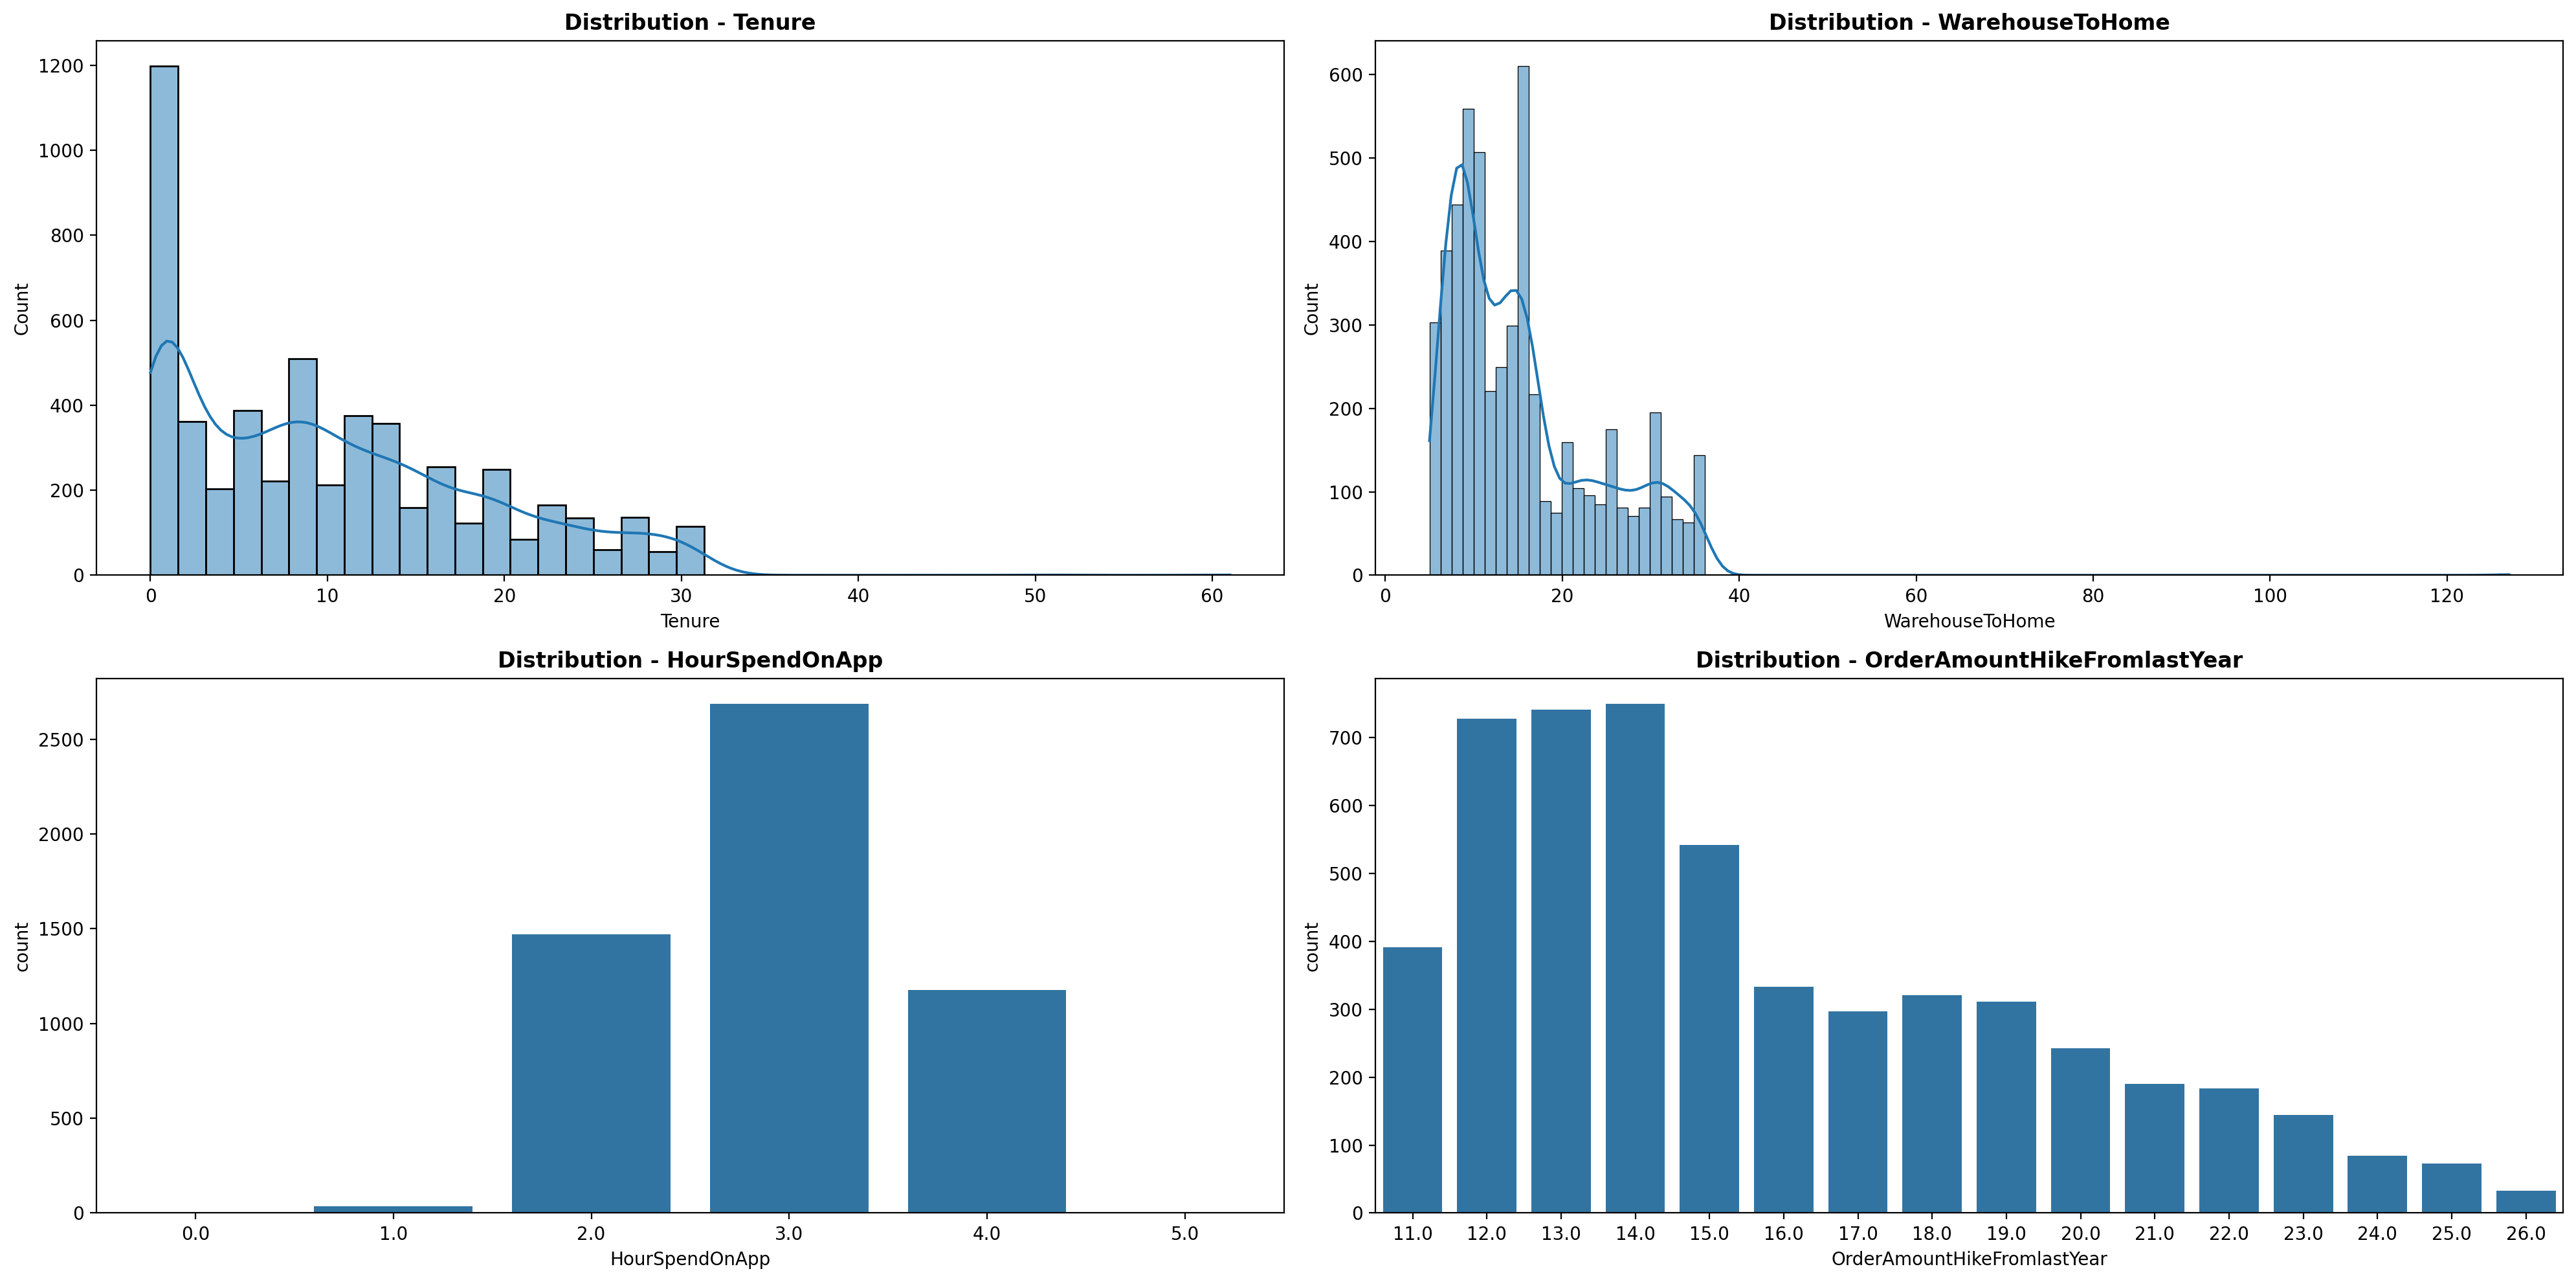

In [7]:
plt.figure(figsize = (20,10), dpi=200)

plt.subplot(2,2,1)
sns.histplot(data=data['Tenure'], kde=True)
plt.title('Distribution - Tenure', fontweight='bold')

plt.subplot(2,2,2)
sns.histplot(data=data['WarehouseToHome'], kde=True)
plt.title('Distribution - WarehouseToHome', fontweight='bold')

plt.subplot(2,2,3)
sns.countplot(x=data['HourSpendOnApp'])
plt.title('Distribution - HourSpendOnApp', fontweight='bold')

plt.subplot(2,2,4)
sns.countplot(x=data['OrderAmountHikeFromlastYear'])
plt.title('Distribution - OrderAmountHikeFromlastYear', fontweight='bold')

plt.subplots_adjust(hspace=0.3)
plt.tight_layout();

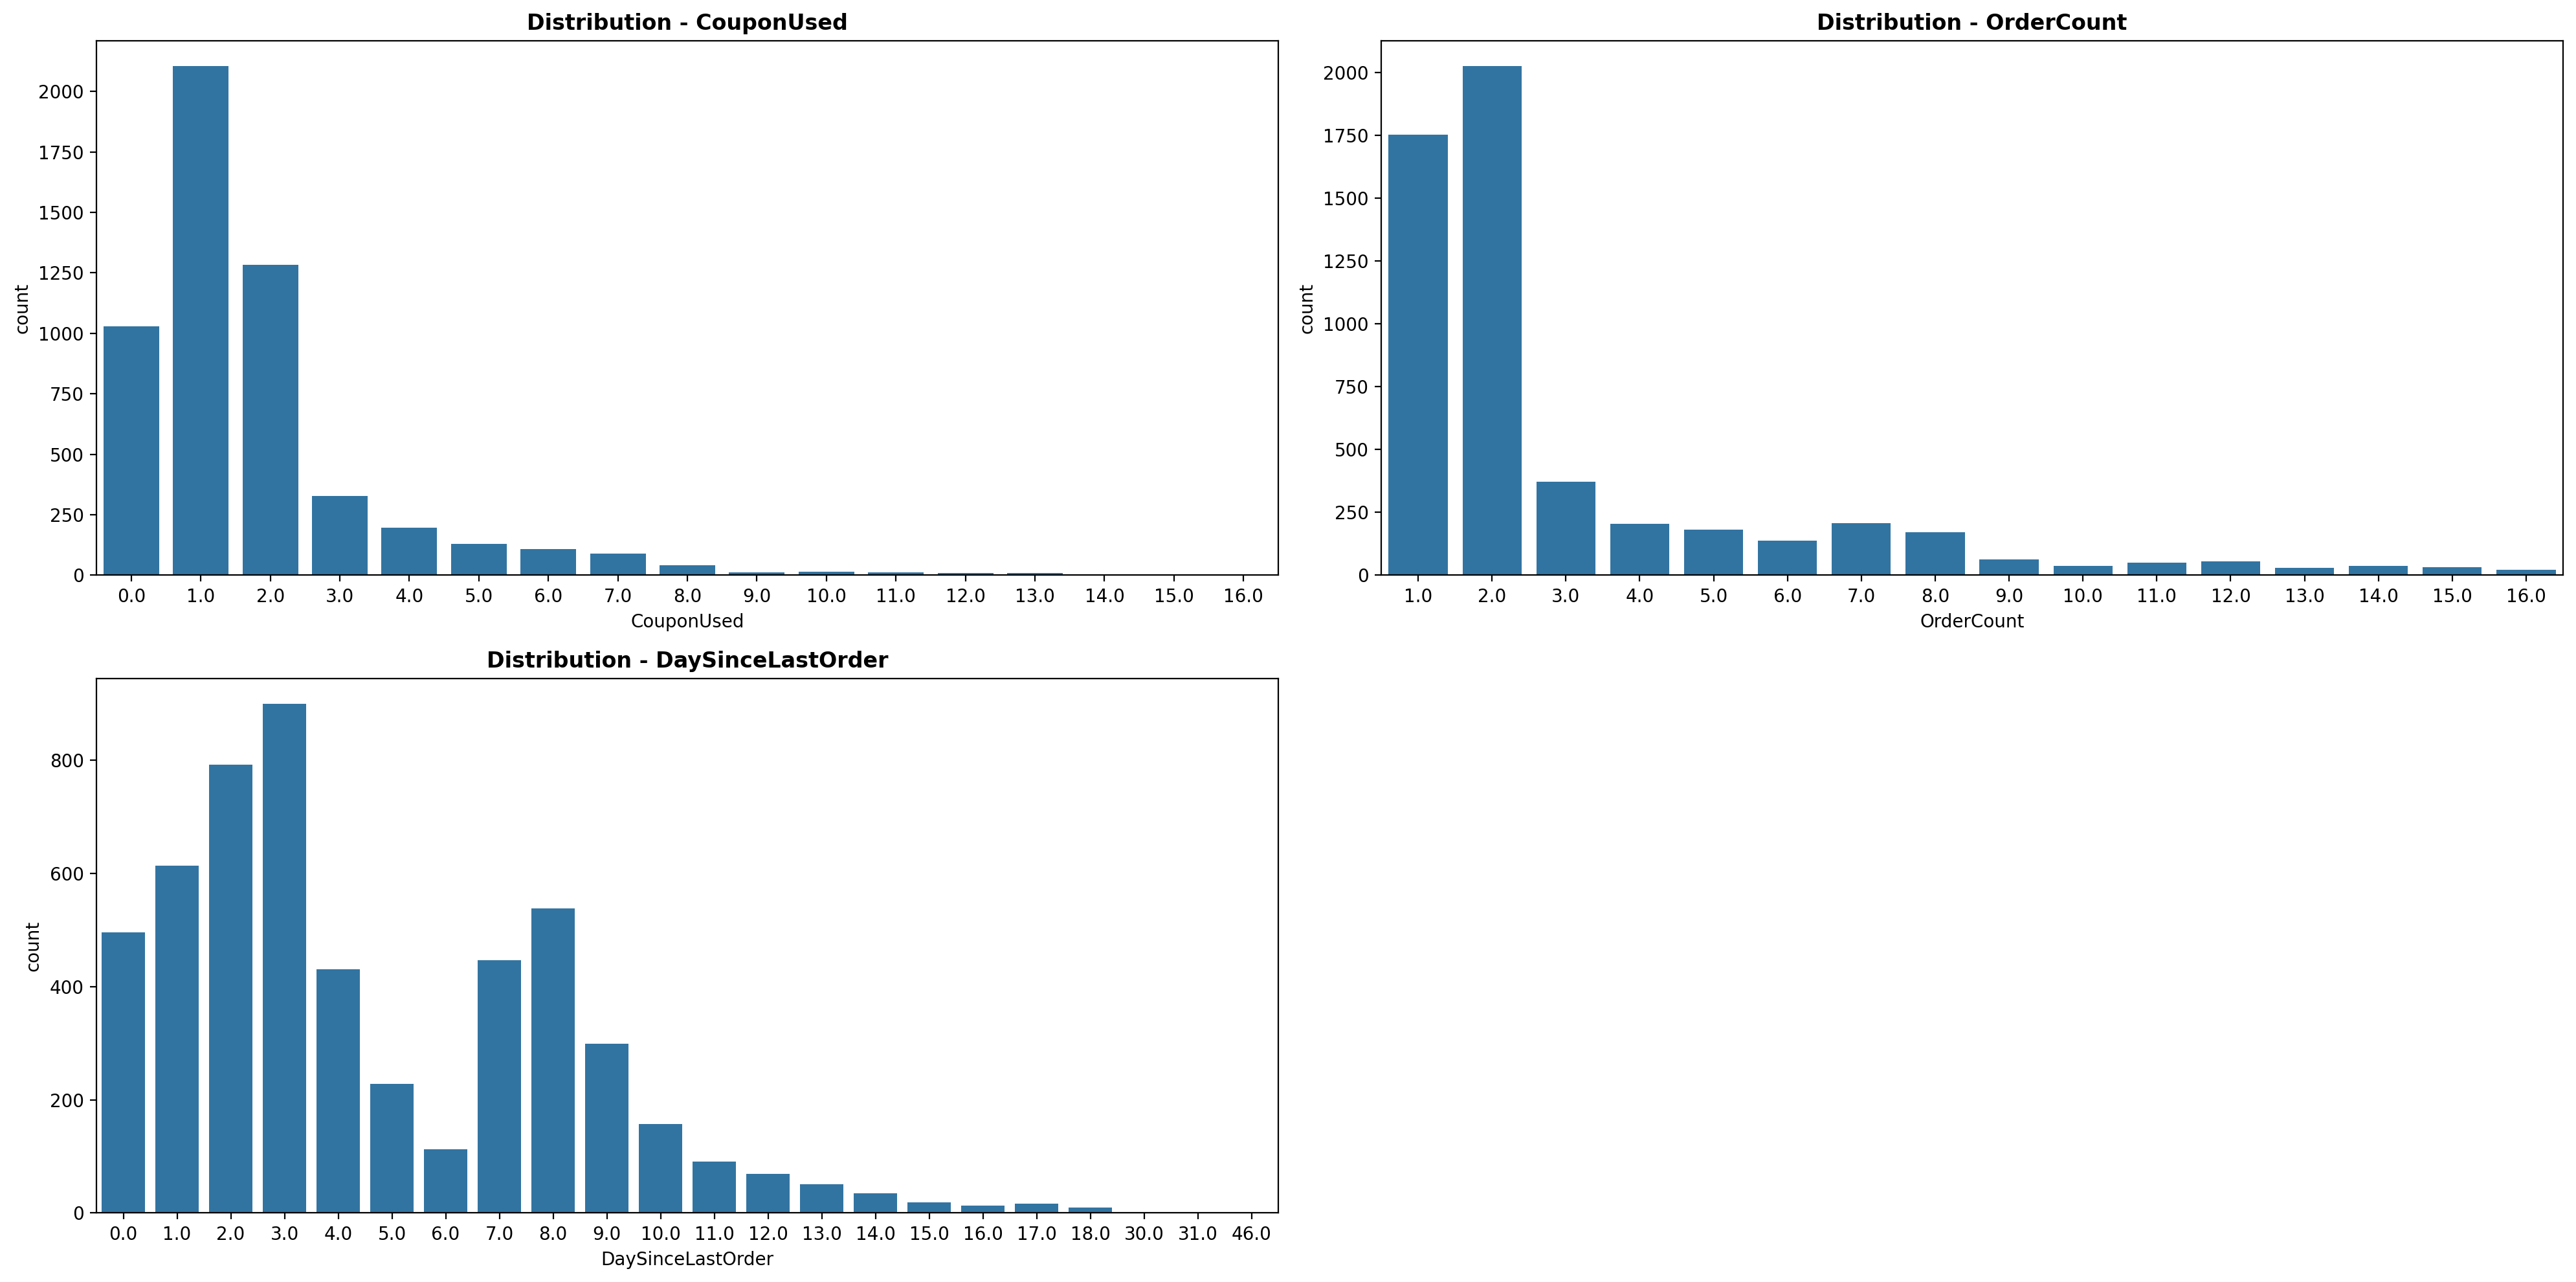

In [8]:
plt.figure(figsize = (20,10), dpi=200)


plt.subplot(2,2,1)
sns.countplot(x=data['CouponUsed'])
plt.title('Distribution - CouponUsed', fontweight='bold')

plt.subplot(2,2,2)
sns.countplot(x=data['OrderCount'])
plt.title('Distribution - OrderCount', fontweight='bold')

plt.subplot(2,2,3)
sns.countplot(x=data['DaySinceLastOrder'])
plt.title('Distribution - DaySinceLastOrder', fontweight='bold')

plt.subplots_adjust(hspace=0.3)
plt.tight_layout();

When data is skewed, we should use the median value to impute null values. This is because the mean can be heavily influenced by extreme values and outliers. Median is the middle value and is less affected by these.
For example, in the feature OrderCount, most of the values (i.e., the number of orders placed by an individual customer) are 1s and 2s. In this case, the mean will not be representative of the general/typical value of OrderCount. Therefore we use median for such cases.

Therefore, we use median to impute null values in the features: 'Tenure', 'WarehouseToHome', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount' and 'DaySinceLastOrder'. Whereas, we use mean to impute null values in the feature 'HourSpendOnApp' as it is normally distributed.

#### Imputing Null Values

In [9]:
data['Tenure'] = data['Tenure'].fillna(value = data['Tenure'].median())
data['WarehouseToHome'] = data['WarehouseToHome'].fillna(value = data['WarehouseToHome'].median())
data['HourSpendOnApp'] = data['HourSpendOnApp'].fillna(value = data['HourSpendOnApp'].mean())
data['OrderAmountHikeFromlastYear'] = data['OrderAmountHikeFromlastYear'].fillna(value = data['OrderAmountHikeFromlastYear'].median())
data['CouponUsed'] = data['CouponUsed'].fillna(value = data['CouponUsed'].median())
data['OrderCount'] = data['OrderCount'].fillna(value = data['OrderCount'].median())
data['DaySinceLastOrder'] = data['DaySinceLastOrder'].fillna(value = data['DaySinceLastOrder'].median())

In [10]:
#let's check if there are any null values left now

data.isna().sum().sum()

0

In [11]:
#Since the column 'CustomerID' does not provide any predictive value towards predicting 'Churn', and
#is simply an identifier feature that can lead to overfitting and noise in the data, we delete it.

del data['CustomerID']

#### Encoding Categorical Columns

In [12]:
#Checking number of unique values and their counts in the 'PreferredLoginDevice' feature.

data['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

In [13]:
#Since there are only 3 classes, we will create and use dummy variables for this feature.

preferred = pd.get_dummies(data['PreferredLoginDevice'])
preferred

Computer  Mobile Phone  Phone
0        False          True  False
1        False         False   True
2        False         False   True
3        False         False   True
4        False         False   True
...        ...           ...    ...
5625      True         False  False
5626     False          True  False
5627     False          True  False
5628      True         False  False
5629     False          True  False

[5630 rows x 3 columns]

In [14]:
#Concatenating this data to original dataframe and deleting the original column 'PreferredloginDevice'

data = pd.concat([data, preferred], axis=1)
del data['PreferredLoginDevice']

In [15]:
#Checking number of unique values and their counts in the 'PreferredPaymentMode' feature.

data['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

 
 
Since there are many classes (7), it would be impractical to use dummy variables as it would lead to increased dimensionality and would require more computation. And since, in this feature, 2 of the classes ('Debit Card' and 'Credit Card') account for the majority of instances, it would be more practical to use frequency encoding that encodes each class with its frequency. This ensures that there is no increase in dimensionality and also preserves information about category prevalence as well.

In [16]:
payment = data['PreferredPaymentMode'].value_counts().to_dict()
data['PreferredPayment'] = data['PreferredPaymentMode'].map(payment)

In [17]:
#Since the 'PreferredPaymentMode' feature is now obsolete, we delete it.
del data['PreferredPaymentMode']

In [18]:
#Creating a new feature 'Male' from the feature 'Gender' whose value is 0 is gender is female and 
#1 if gender is male, and then deleting the original 'Gender' feature.

data['Male'] = data['Gender'].map({'Female':0, 'Male':1})

In [19]:
del data['Gender']

In [20]:
#Checking number of unique values and their counts in the 'PreferredOrderCat' feature.
data['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

In [21]:
#Similar to the feature 'PreferredPaymentMode', we use frequency encoding to encode the instances in
#this feature as well.

ordercat = data['PreferedOrderCat'].value_counts().to_dict()
data['PreferredCat'] = data['PreferedOrderCat'].map(ordercat)

In [22]:
#deleting the original feature 'PreferredOrderCat' as it is now obsolete.
del data['PreferedOrderCat']

In [23]:
#Checking number of unique values and their counts in the 'MaritalStatus' feature.

data['MaritalStatus'].value_counts()

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64

In [24]:
#Creating dummy variables for this feature, concatenating them to the original dataframe and then 
#deleting the original feature.

marital = pd.get_dummies(data['MaritalStatus'])

data = pd.concat([data, marital], axis=1)
del data['MaritalStatus']

In [25]:
#Checking the datatypes of each column in the data.

data.dtypes

Churn                            int64
Tenure                         float64
CityTier                         int64
WarehouseToHome                float64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
SatisfactionScore                int64
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
Computer                          bool
Mobile Phone                      bool
Phone                             bool
PreferredPayment                 int64
Male                             int64
PreferredCat                     int64
Divorced                          bool
Married                           bool
Single                            bool
dtype: object

We still have six columns to process which are Boolean type. So we convert the values in these as follows:
0 if the value is False, and
1 if the value is True

In [26]:
data['Computer'] = data['Computer'].astype(int)
data['Mobile Phone'] = data['Mobile Phone'].astype(int)
data['Phone'] = data['Phone'].astype(int)
data['Divorced'] = data['Divorced'].astype(int)
data['Married'] = data['Married'].astype(int)
data['Single'] = data['Single'].astype(int)

In [27]:
data.head()

Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0      1     4.0         3              6.0        3.000000   
1      1     9.0         1              8.0        3.000000   
2      1     9.0         1             30.0        2.000000   
3      1     0.0         3             15.0        2.000000   
4      1     0.0         1             12.0        2.931535   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                         3                  2                9         1   
1                         4                  3                7         1   
2                         4                  3                6         1   
3                         4                  5                8         0   
4                         3                  5                3         0   

   OrderAmountHikeFromlastYear  ...  CashbackAmount  Computer  Mobile Phone  \
0                         11.0  ...          159.93         0             1   
1                         15.0  ...          120.90         0             0   
2                         14.0  ...          120.28         0             0   
3                         23.0  ...          134.07         0             0   
4                         11.0  ...          129.60         0             0   

   Phone  PreferredPayment  Male  PreferredCat  Divorced  Married  Single  
0      0              2314     0          2050         0        0       1  
1      1               414     1           809         0        0       1  
2      1              2314     1           809         0        0       1  
3      1              2314     1          2050         0        0       1  
4      1               273     1           809         0        0       1  

[5 rows x 23 columns]

## Correlation Matrix and Heatmap

In [28]:
#creating a correlation matrix

corr = data.corr()
corr

Churn    Tenure  CityTier  WarehouseToHome  \
Churn                        1.000000 -0.337831  0.084703         0.069544   
Tenure                      -0.337831  1.000000 -0.057895        -0.012191   
CityTier                     0.084703 -0.057895  1.000000         0.013576   
WarehouseToHome              0.069544 -0.012191  0.013576         1.000000   
HourSpendOnApp               0.018126 -0.015035 -0.008982         0.064585   
NumberOfDeviceRegistered     0.107939 -0.020657  0.027934         0.023020   
SatisfactionScore            0.105481 -0.014452 -0.011554         0.007524   
NumberOfAddress              0.043931  0.235076 -0.029440        -0.008305   
Complain                     0.250188 -0.020535  0.003375         0.026825   
OrderAmountHikeFromlastYear -0.007075 -0.005542 -0.028890         0.038311   
CouponUsed                  -0.001430  0.101535  0.022629         0.002675   
OrderCount                  -0.024038  0.165339  0.033551         0.000354   
DaySinceLastOrder           -0.155871  0.174378  0.010214         0.020253   
CashbackAmount              -0.154118  0.467986  0.055746         0.000415   
Computer                     0.051099 -0.040605 -0.002476         0.023066   
Mobile Phone                -0.111639  0.192596  0.109750         0.006294   
Phone                        0.078916 -0.188356 -0.130023        -0.032941   
PreferredPayment            -0.073599  0.051956 -0.174625        -0.009986   
Male                         0.029264 -0.046389 -0.025176        -0.001261   
PreferredCat                -0.055589 -0.231936  0.168427         0.046196   
Divorced                    -0.024934  0.039472  0.014545        -0.006881   
Married                     -0.151024  0.082896 -0.029922         0.028811   
Single                       0.180847 -0.119053  0.020878        -0.025570   

                             HourSpendOnApp  NumberOfDeviceRegistered  \
Churn                              0.018126                  0.107939   
Tenure                            -0.015035                 -0.020657   
CityTier                          -0.008982                  0.027934   
WarehouseToHome                    0.064585                  0.023020   
HourSpendOnApp                     1.000000                  0.307749   
NumberOfDeviceRegistered           0.307749                  1.000000   
SatisfactionScore                  0.031156                 -0.017228   
NumberOfAddress                    0.141736                  0.084997   
Complain                           0.006824                  0.003407   
OrderAmountHikeFromlastYear        0.099662                  0.065714   
CouponUsed                         0.188975                  0.152065   
OrderCount                         0.103675                  0.099790   
DaySinceLastOrder                  0.063337                  0.007350   
CashbackAmount                     0.118648                  0.137183   
Computer                          -0.019566                  0.021096   
Mobile Phone                       0.143719                  0.106858   
Phone                             -0.152343                 -0.152409   
PreferredPayment                   0.058628                  0.021043   
Male                              -0.018349                 -0.021799   
PreferredCat                       0.052635                  0.049064   
Divorced                           0.013091                 -0.005947   
Married                            0.034134                 -0.036259   
Single                            -0.046595                  0.043389   

                             SatisfactionScore  NumberOfAddress  Complain  \
Churn                                 0.105481         0.043931  0.250188   
Tenure                               -0.014452         0.235076 -0.020535   
CityTier                             -0.011554        -0.029440  0.003375   
WarehouseToHome                       0.007524        -0.008305  0.026825   
HourSpendOnApp       

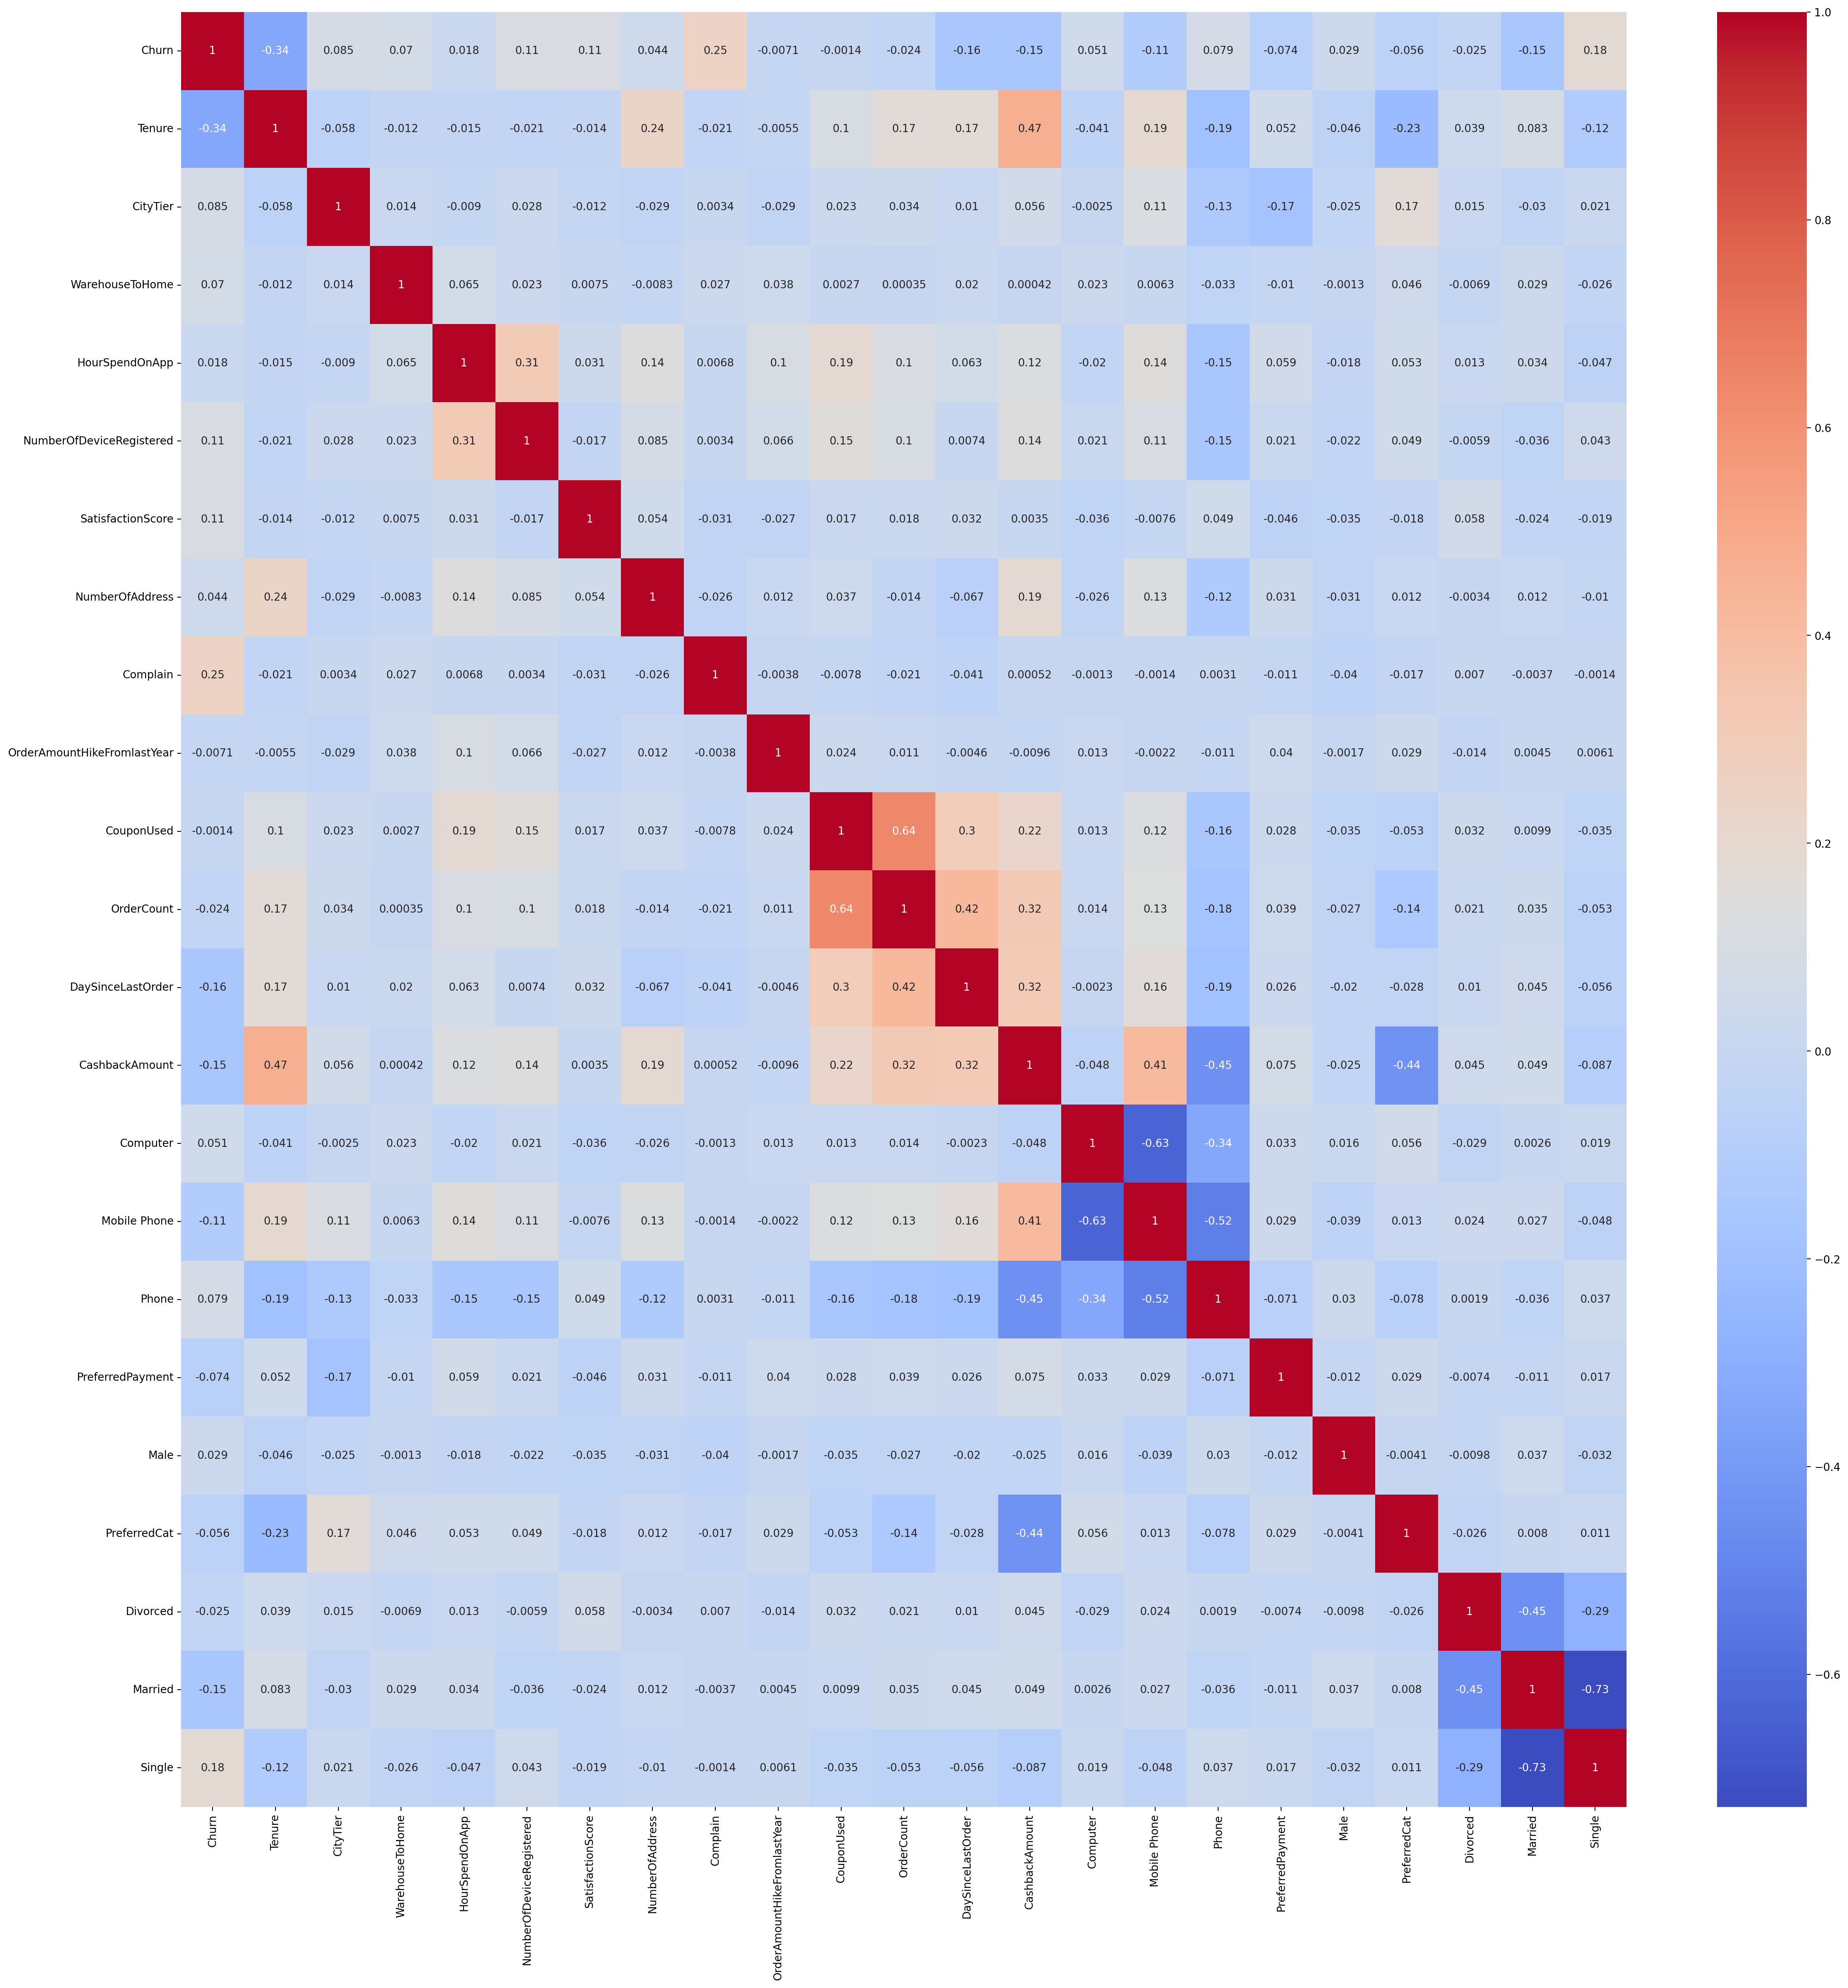

In [29]:
#Plotting a heatmap to analyse the correlation matrix

plt.figure(figsize=(30,30), dpi=200)

sns.heatmap(corr, annot=True, cmap='coolwarm');

## Scaling the Data

First, we divide the data columns into two groups: one with features having 2 classes (binary features) and the other having numerical continuous values, that need scaling to the same scale.

In [30]:
binaries = [col for col in data.columns if data[col].nunique() == 2]
numericals = [col for col in data.columns if col not in binaries]

In [31]:
binaries

['Churn',
 'Complain',
 'Computer',
 'Mobile Phone',
 'Phone',
 'Male',
 'Divorced',
 'Married',
 'Single']

In [32]:
numericals

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'PreferredPayment',
 'PreferredCat']

In [33]:
#taking all the numerical columns that need to be scaled
numerical_df = data[numericals]

In [34]:
#scaling the data

scaler = StandardScaler()

scaled_num = scaler.fit_transform(numerical_df)
scaled_num

array([[-0.73398944,  1.46977096, -1.14637901, ..., -0.35146531,
         1.02313534,  1.19476895],
       [-0.13570356, -0.71528595, -0.90672086, ..., -1.14471501,
        -1.33463526, -0.81719429],
       [-0.13570356, -0.71528595,  1.72951879, ..., -1.15731595,
         1.02313534, -0.81719429],
       ...,
       [-1.09296096, -0.71528595, -0.54723363, ...,  0.18692015,
         1.02313534,  1.19476895],
       [ 1.53949688,  1.46977096, -0.78689178, ...,  0.03408291,
         0.01425771,  1.19476895],
       [-0.25536074, -0.71528595, -0.06791733, ..., -0.16631274,
         0.01425771,  1.19476895]])

In [35]:
#creating a dataframe for the scaled features.

scaled_num = pd.DataFrame(scaled_num, columns=numericals)
scaled_num

Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0    -0.733989  1.469771        -1.146379        0.097069   
1    -0.135704 -0.715286        -0.906721        0.097069   
2    -0.135704 -0.715286         1.729519       -1.320723   
3    -1.212618  1.469771        -0.067917       -1.320723   
4    -1.212618 -0.715286        -0.427405        0.000000   
...        ...       ...              ...             ...   
5625 -0.016046 -0.715286         1.729519        0.097069   
5626  0.342925 -0.715286        -0.307575        0.097069   
5627 -1.092961 -0.715286        -0.547234        0.097069   
5628  1.539497  1.469771        -0.786892        1.514862   
5629 -0.255361 -0.715286        -0.067917        0.097069   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
0                    -0.672900          -0.772992         1.852616   
1                     0.303750          -0.048392         1.078430   
2                     0.303750          -0.048392         0.691336   
3                     0.303750           1.400807         1.465523   
4                    -0.672900           1.400807        -0.469944   
...                        ...                ...              ...   
5625                 -1.649551          -1.497592         0.691336   
5626                  1.280401           1.400807         0.691336   
5627                 -1.649551           0.676207        -0.469944   
5628                  1.280401           0.676207        -0.082850   
5629                 -1.649551          -0.048392        -0.082850   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                       -1.301849   -0.385940   -0.681423           0.151436   
1                       -0.187872   -0.924305   -0.681423          -1.249003   
2                       -0.466367   -0.924305   -0.681423          -0.408739   
3                        2.040082   -0.924305   -0.681423          -0.408739   
4                       -1.301849   -0.385940   -0.681423          -0.408739   
...                           ...         ...         ...                ...   
5625                     0.647610   -0.385940   -0.334079          -0.128651   
5626                     0.090622   -0.385940   -0.334079          -0.408739   
5627                     1.483093   -0.385940   -0.334079          -0.128651   
5628                    -0.187872    0.152425   -0.334079           1.271788   
5629                    -0.744861    0.152425   -0.334079          -0.408739   

      CashbackAmount  PreferredPayment  PreferredCat  
0          -0.351465          1.023135      1.194769  
1          -1.144715         -1.334635     -0.817194  
2          -1.157316          1.023135     -0.817194  
3          -0.877047          1.023135      1.194769  
4          -0.967895         -1.509607     -0.817194  
...              ...               ...           ...  
5625       -0.538854          0.014258      1.194769  
5626        0.969195          0.014258     -0.789633  
5627        0.186920          1.023135      1.194769  
5628        0.034083          0.014258      1.194769  
5629       -0.166313          0.014258      1.194769  

[5630 rows x 14 columns]

In [36]:
#Creating a new dataframe concatenating these scaled features and the original binary features.

new = pd.concat([scaled_num, data[binaries]], axis=1)

In [37]:
new.head()

Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0 -0.733989  1.469771        -1.146379        0.097069   
1 -0.135704 -0.715286        -0.906721        0.097069   
2 -0.135704 -0.715286         1.729519       -1.320723   
3 -1.212618  1.469771        -0.067917       -1.320723   
4 -1.212618 -0.715286        -0.427405        0.000000   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
0                  -0.67290          -0.772992         1.852616   
1                   0.30375          -0.048392         1.078430   
2                   0.30375          -0.048392         0.691336   
3                   0.30375           1.400807         1.465523   
4                  -0.67290           1.400807        -0.469944   

   OrderAmountHikeFromlastYear  CouponUsed  OrderCount  ...  PreferredCat  \
0                    -1.301849   -0.385940   -0.681423  ...      1.194769   
1                    -0.187872   -0.924305   -0.681423  ...     -0.817194   
2                    -0.466367   -0.924305   -0.681423  ...     -0.817194   
3                     2.040082   -0.924305   -0.681423  ...      1.194769   
4                    -1.301849   -0.385940   -0.681423  ...     -0.817194   

   Churn  Complain  Computer  Mobile Phone  Phone  Male  Divorced  Married  \
0      1         1         0             1      0     0         0        0   
1      1         1         0             0      1     1         0        0   
2      1         1         0             0      1     1         0        0   
3      1         0         0             0      1     1         0        0   
4      1         0         0             0      1     1         0        0   

   Single  
0       1  
1       1  
2       1  
3       1  
4       1  

[5 rows x 23 columns]

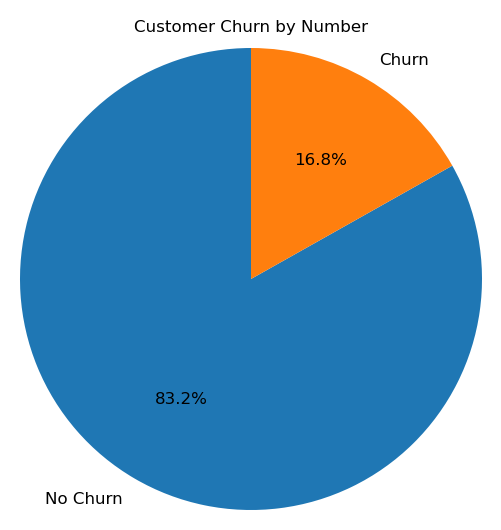

In [38]:
#Plotting customer churn by number.
churn_counts = data['Churn'].value_counts()

plt.figure(figsize=(3, 3), dpi=200)

plt.pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=90, radius=1.25,  textprops={'fontsize': 6})
plt.title('Customer Churn by Number', fontsize=6);

The number of instances with Churn = 0 is almost 5 times the number of instances with Churn = 1.  
Churn = 0 implies that the customer is not going to churn.  
Whereas, Churn = 1 implies that the customer is going to churn.

## Plotting Customer Churn Against the 3 Features having the Highest Feature Coeffecients

(We find out the most important features later in the analysis process.)

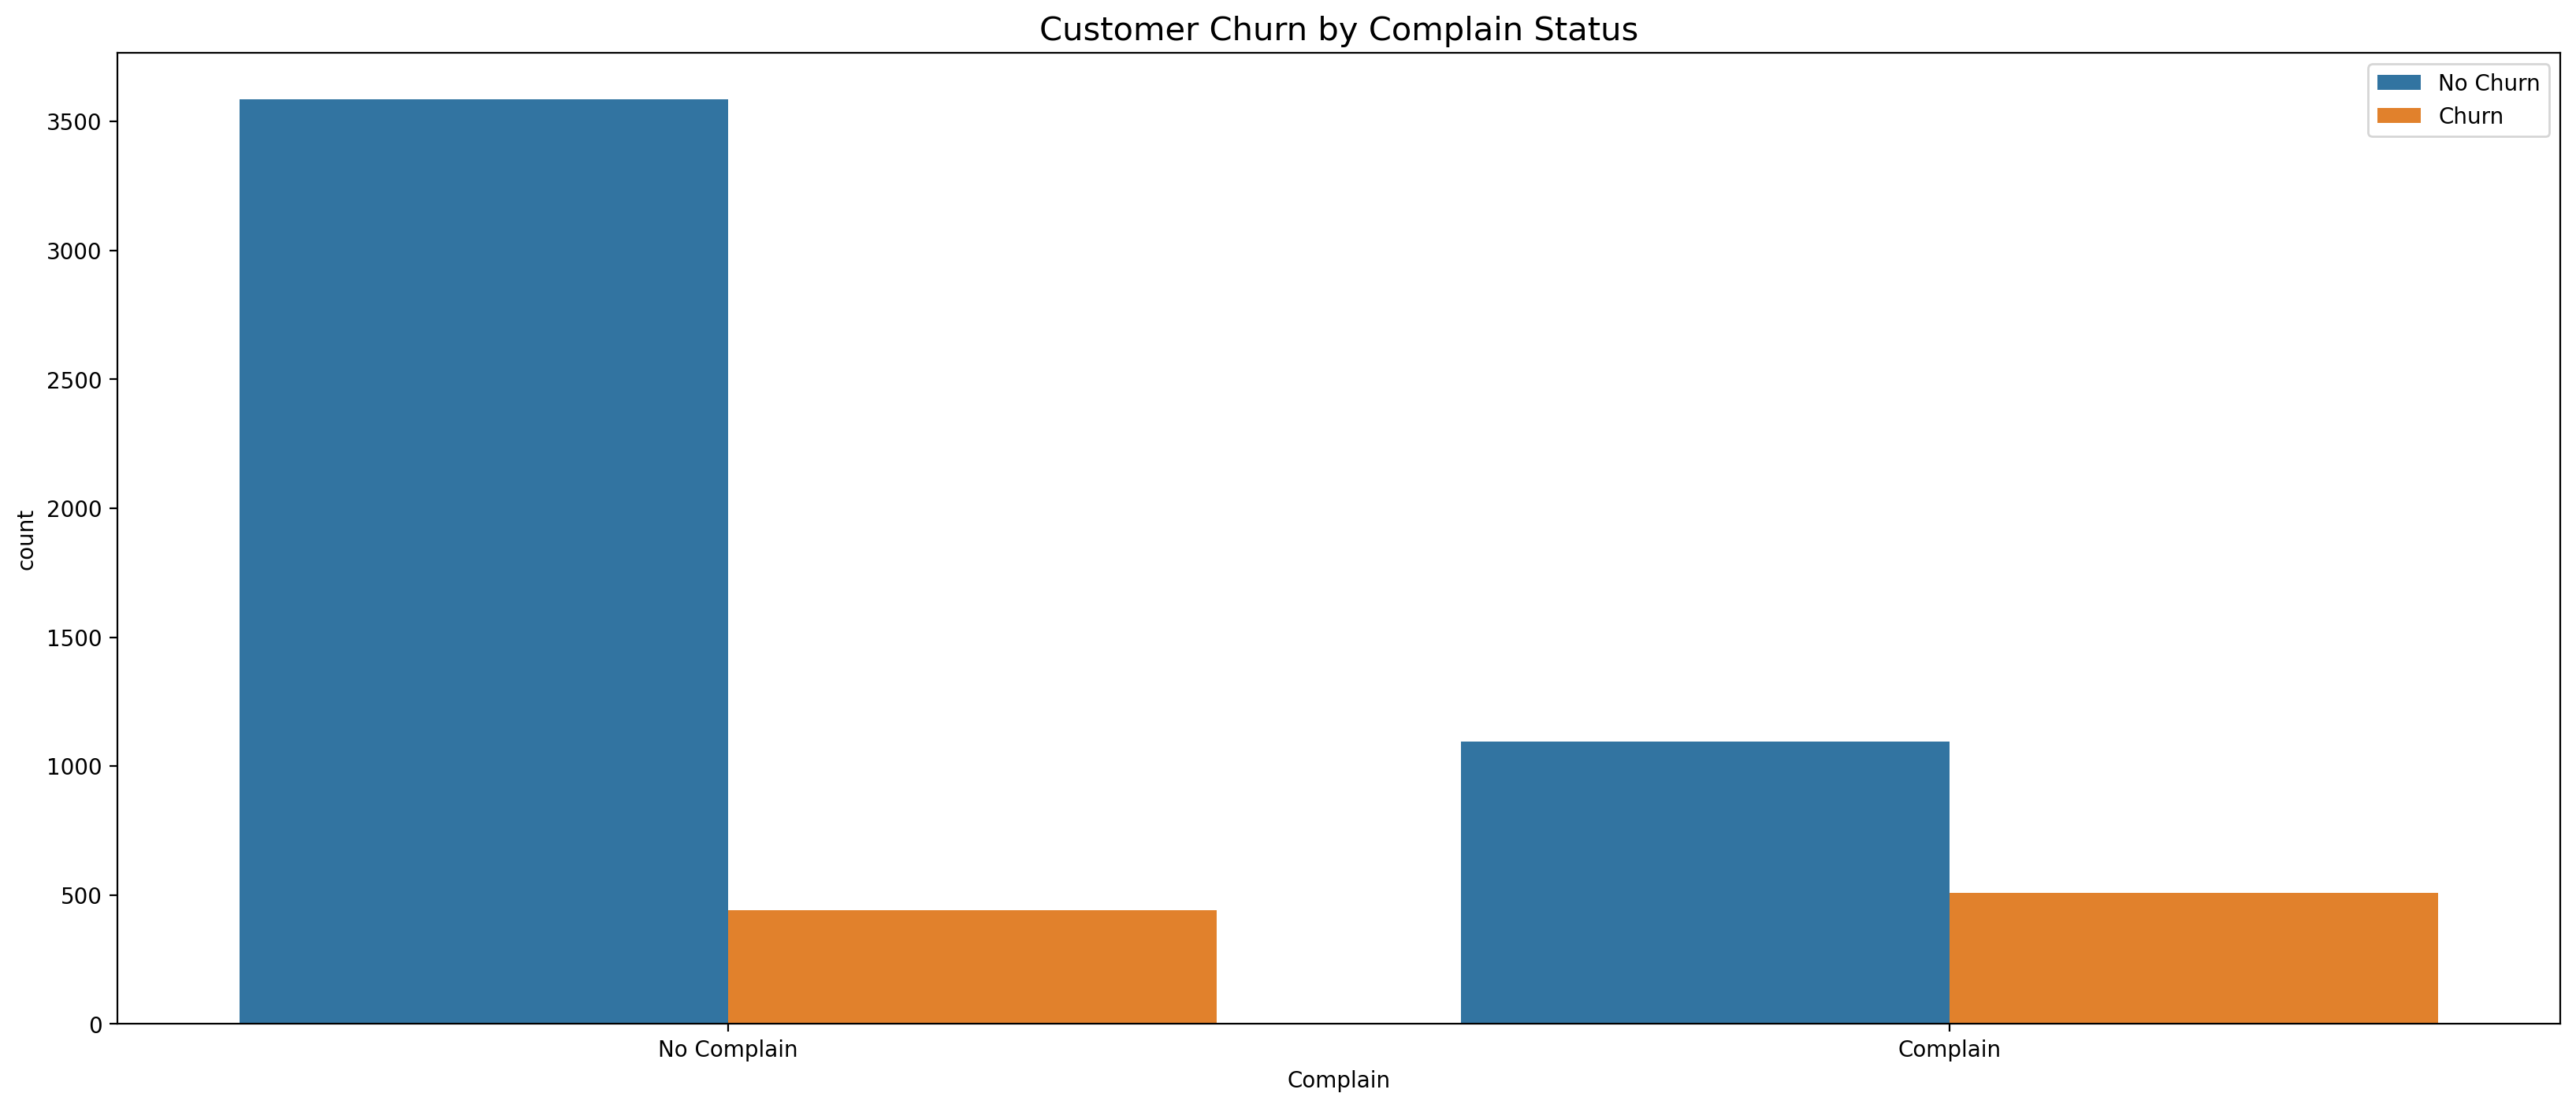

In [39]:
plt.figure(figsize=(20,8), dpi=200)

ax = sns.countplot(x='Complain', hue='Churn', data=new)

legend_labels = ['No Churn', 'Churn']
plt.legend(legend_labels)

ax.set_xticks([0,1])
ax.set_xticklabels(['No Complain', 'Complain'])
plt.title('Customer Churn by Complain Status', fontsize=15);

In [40]:
#Creating Bins and Labels for the 'Tenure' feature.

bins = [0,6,11,16,21,26,31,62]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '30+']

In [41]:
data['TenureGrp'] = pd.cut(data['Tenure'], bins=bins, labels=labels, right=False)

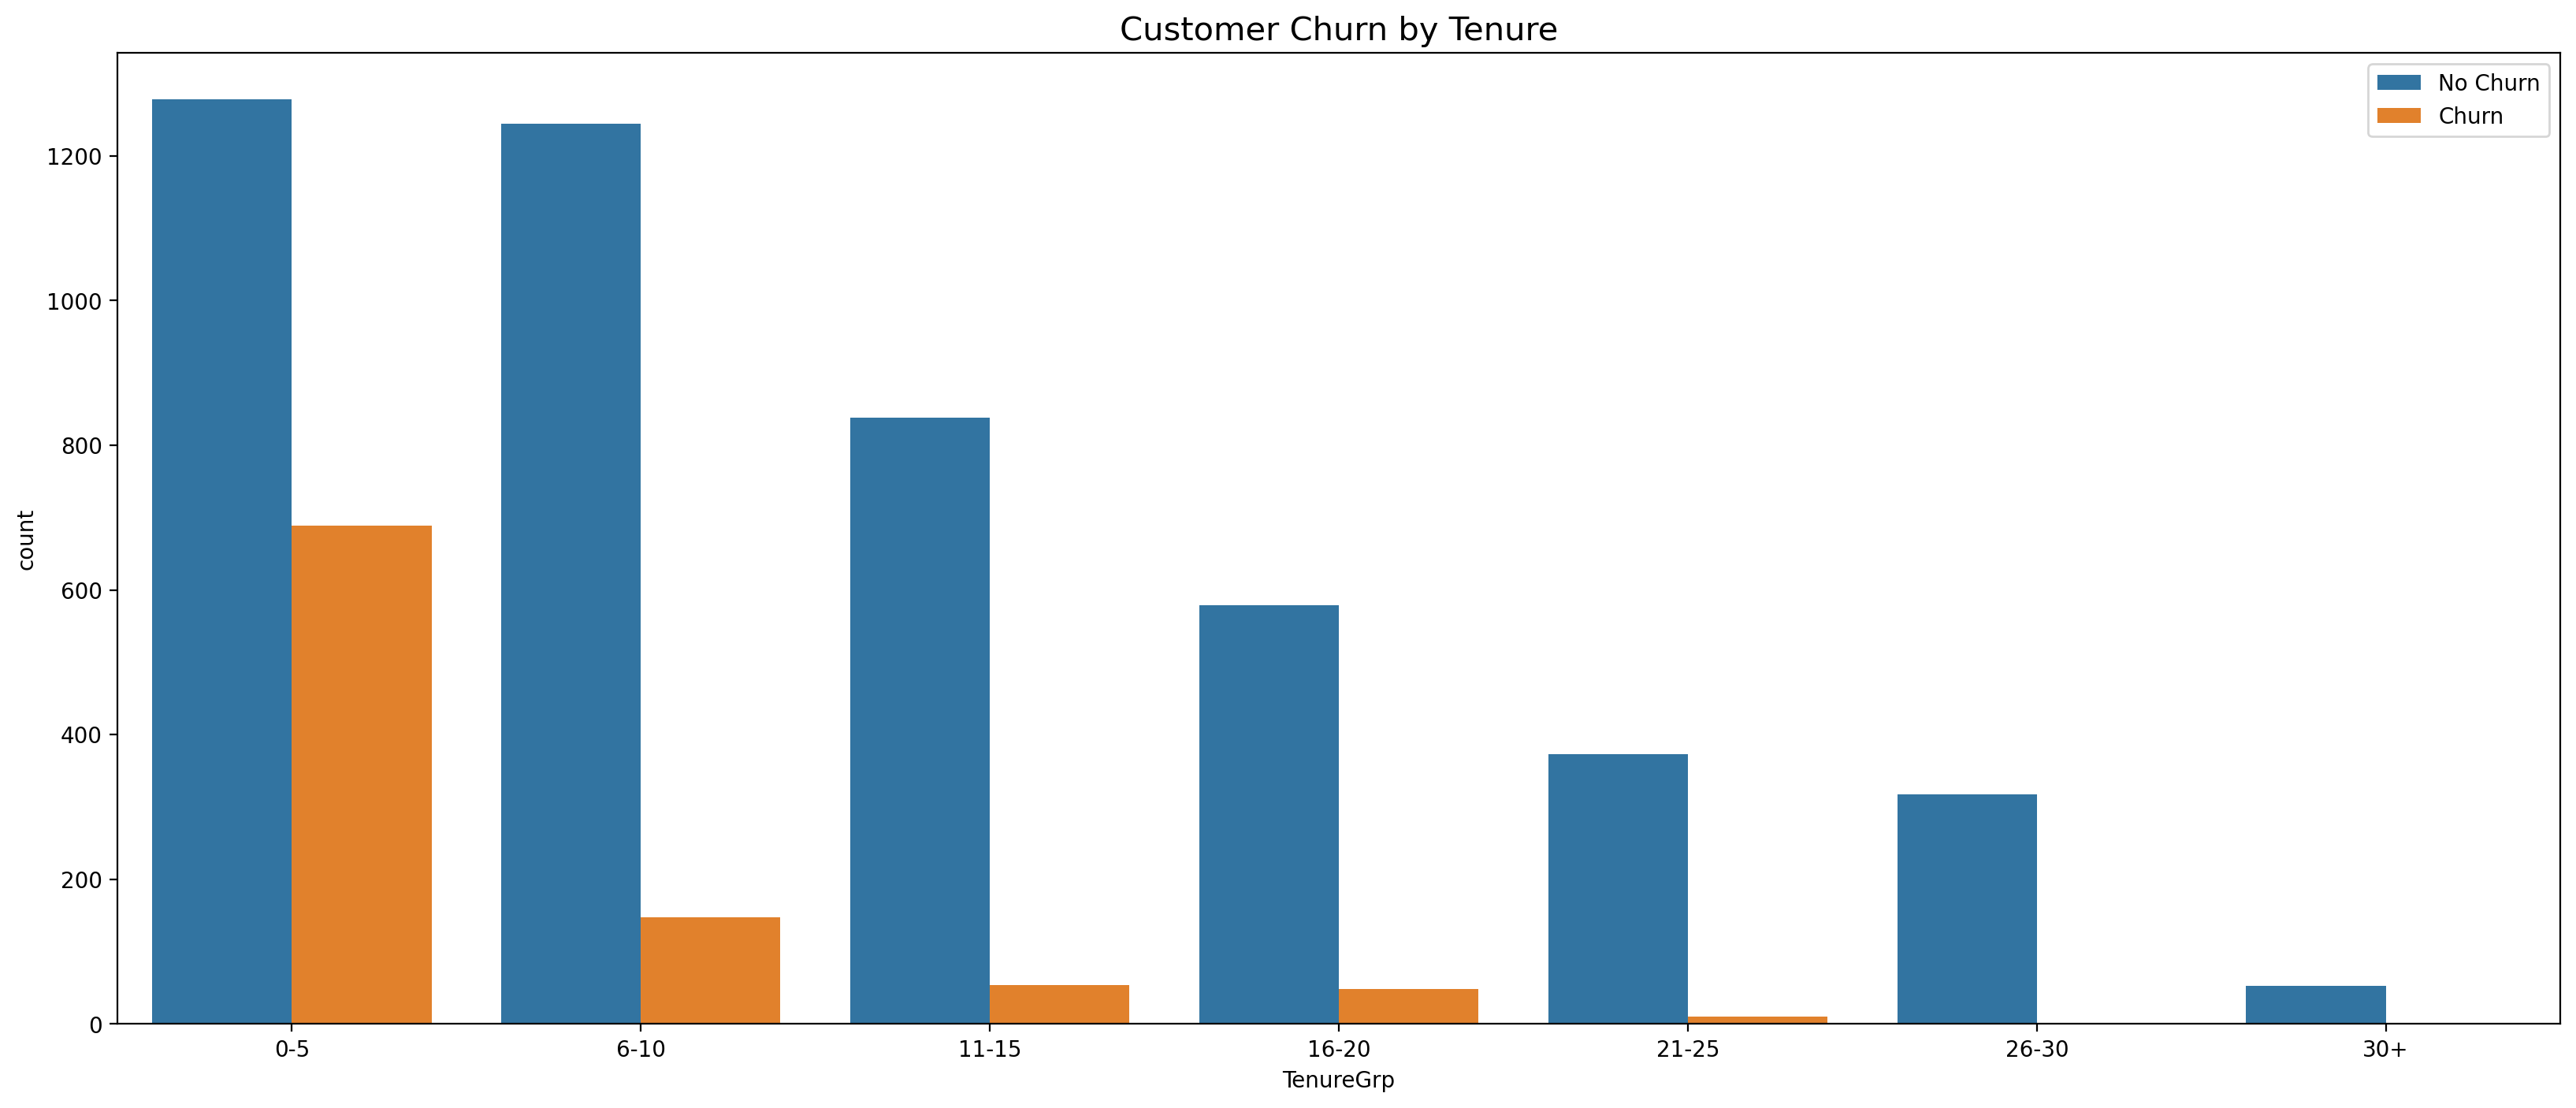

In [42]:
plt.figure(figsize=(20,8), dpi=200)

sns.countplot(x='TenureGrp', hue='Churn', data=data);
legend_labels = ['No Churn', 'Churn']
plt.legend(legend_labels)

plt.title('Customer Churn by Tenure', fontsize=15);

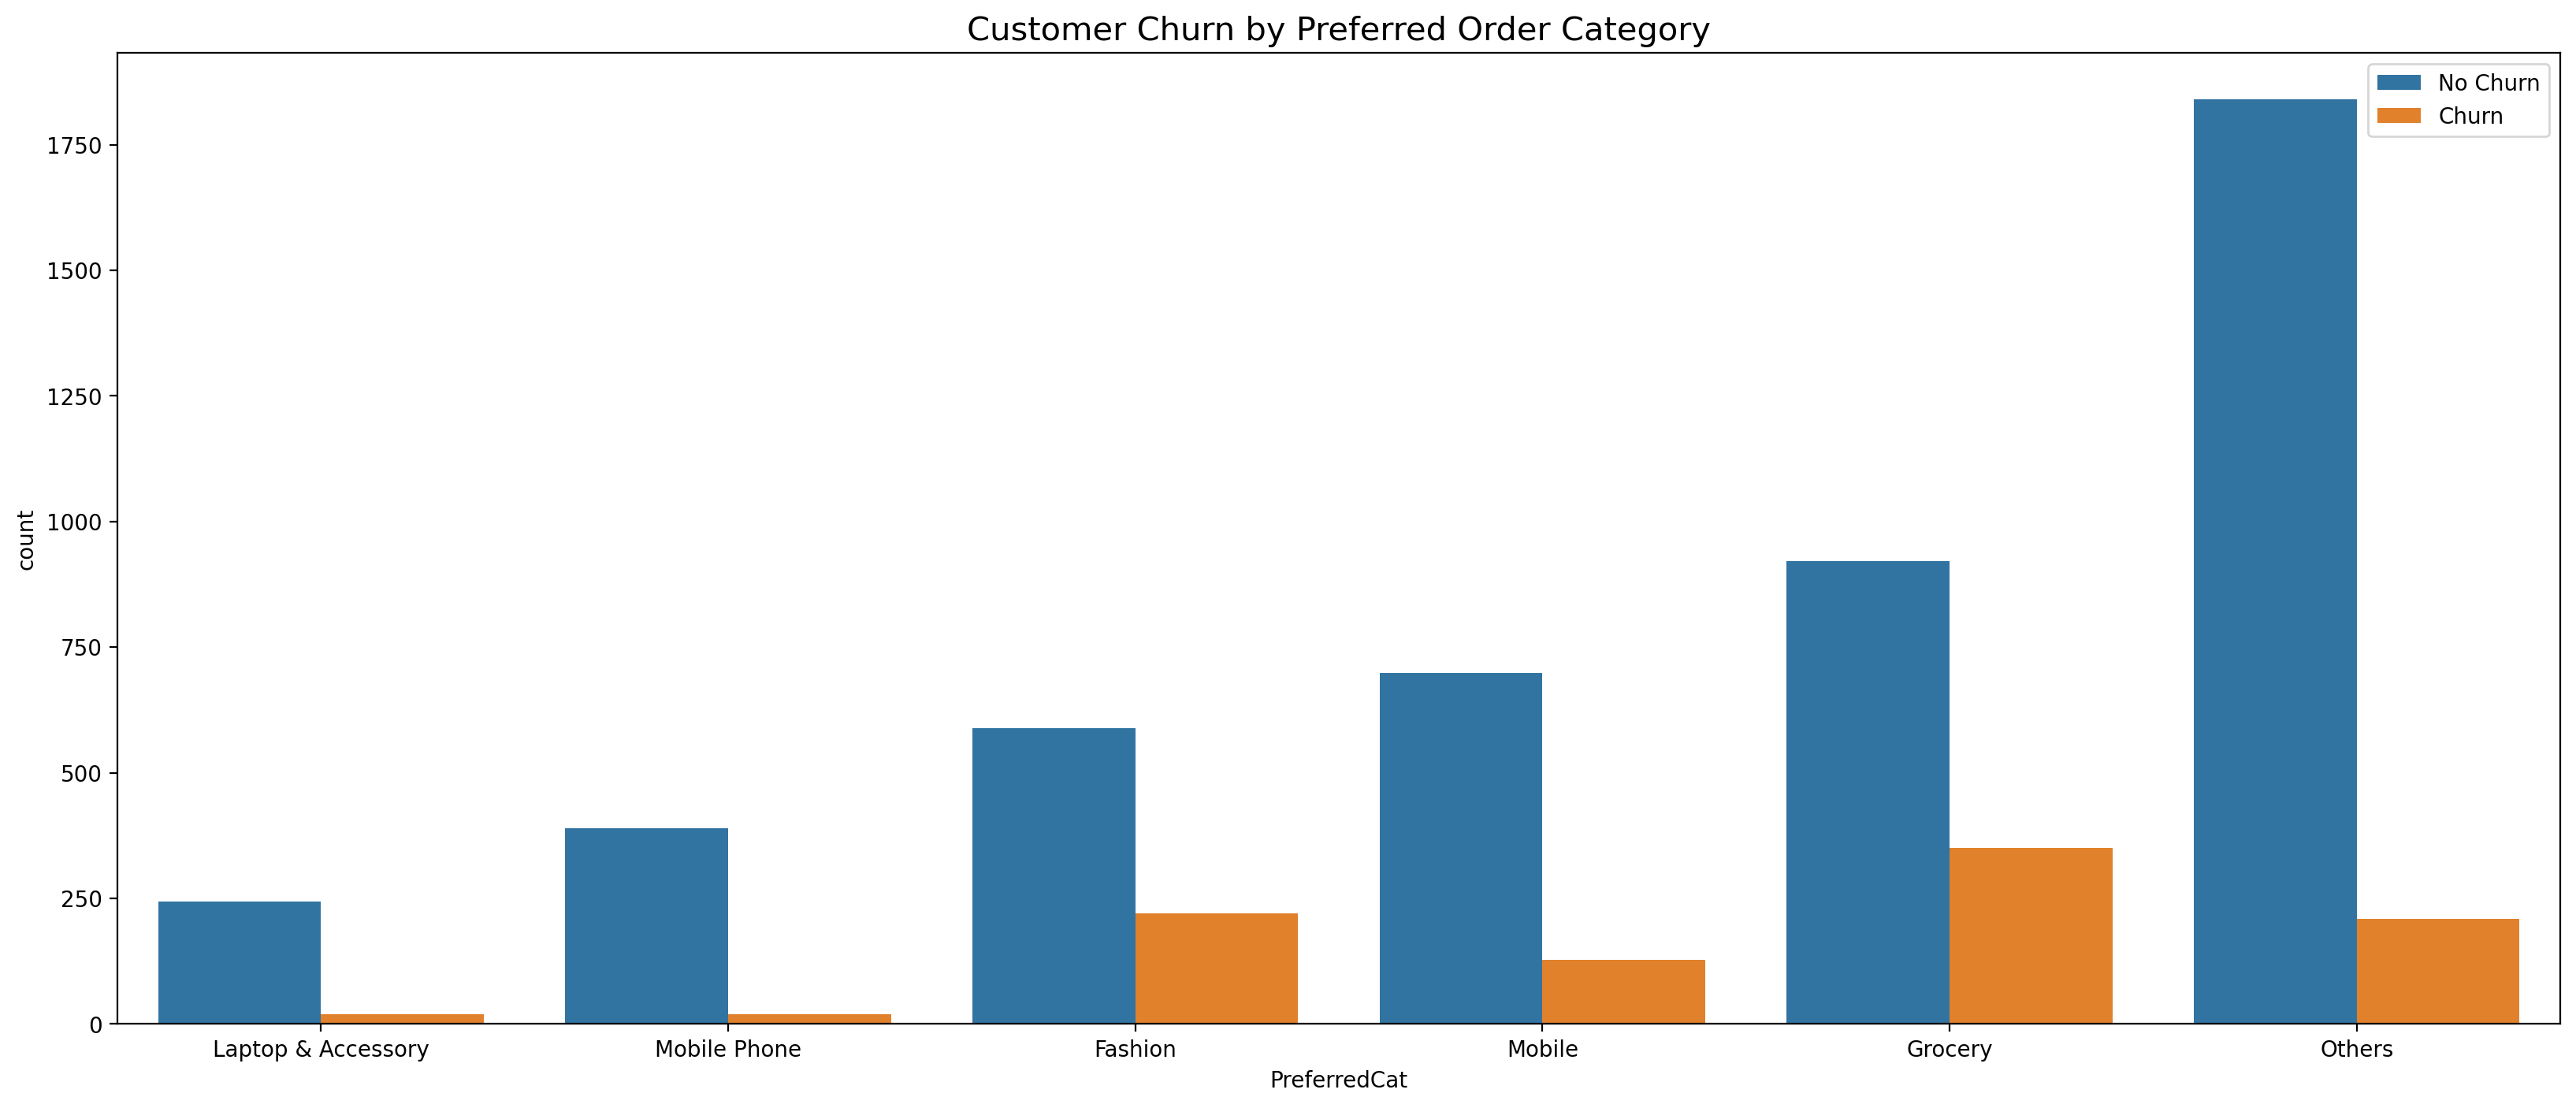

In [43]:
plt.figure(figsize=(20,8), dpi=200)

ax = sns.countplot(x='PreferredCat', hue='Churn', data=data)
legend_labels = ['No Churn', 'Churn']
plt.legend(legend_labels)

ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(['Laptop & Accessory', 'Mobile Phone', 'Fashion', 'Mobile', 'Grocery', 'Others'])

plt.title('Customer Churn by Preferred Order Category', fontsize=15);

## Splitting the Data into Train and Test Sets

In [44]:
#Defining X as all the features that will be used in the prediction of Churn and y as Churn.

X = new.drop(['Churn'], axis=1)
y = new['Churn']

In [45]:
#Splitting the Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Logistic Regression

In [46]:
logreg = LogisticRegression()

In [47]:
logreg.fit(X_train, y_train)
log_pred = logreg.predict(X_test)

In [48]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1176
           1       0.74      0.50      0.59       232

    accuracy                           0.89      1408
   macro avg       0.82      0.73      0.76      1408
weighted avg       0.88      0.89      0.88      1408



In [49]:
print(f'Testing Score: {round(logreg.score(X_test, y_test)*100,2)}%')
print(f'Training Score: {round(logreg.score(X_train, y_train)*100,2)}%')

Testing Score: 88.85%
Training Score: 89.29%


In [50]:
print(f'Coefficients:\n\n{logreg.coef_}\n')
print(f'Intercept: {logreg.intercept_}')

Coefficients:

[[-1.71544299  0.33834538  0.30117873 -0.08798461  0.44769932  0.36702296
   0.54617179 -0.05425692  0.10058555  0.35488965 -0.31758522 -0.51191214
  -0.06203623 -0.83034608  1.68840636  0.28263053 -0.00696799 -0.27594005
   0.27566959 -0.02926196 -0.49033625  0.51932071]]

Intercept: [-3.34564299]


## Implementing GridSearchCV in Logistic Regression for Parameter Tuning

In [51]:
log_param_grid = {'C':[0.0001, 0.001, 0.1, 1, 10, 100, 1000],
                 'solver':['liblinear', 'saga'],
                 'penalty':['l1','l2']}
log_grid = GridSearchCV(estimator=logreg, param_grid=log_param_grid, cv=10, scoring='accuracy', n_jobs=-1)

log_grid.fit(X_train, y_train)

best_params = log_grid.best_params_
best_score = log_grid.best_score_

In [52]:
#Getting the best parameters and the best score from the GridSearchCV

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score:.2f}')

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.89


In [53]:
#Using the model/estimator with the best parameters

logreg_best = log_grid.best_estimator_

In [54]:
print('For the Best Model:\n')
print(f'Testing Score: {round(logreg_best.score(X_test, y_test)*100,2)}%')
print(f'Training Score: {round(logreg_best.score(X_train, y_train)*100,2)}%')

For the Best Model:

Testing Score: 88.92%
Training Score: 89.27%


There is a very little improvement in the testing and the training scores when we use GridSearchCV in Logistic Regression

In [55]:
#Making predictions for the test data using this best model from GridSearchCV and from the base model

logreg_pred = logreg.predict(X_test)
logreg_best_pred = logreg_best.predict(X_test)

In [56]:
#Creating the confusion matrix for the best model

log_cm = confusion_matrix(y_test, logreg_best_pred)
print(log_cm)

[[1143   33]
 [ 123  109]]


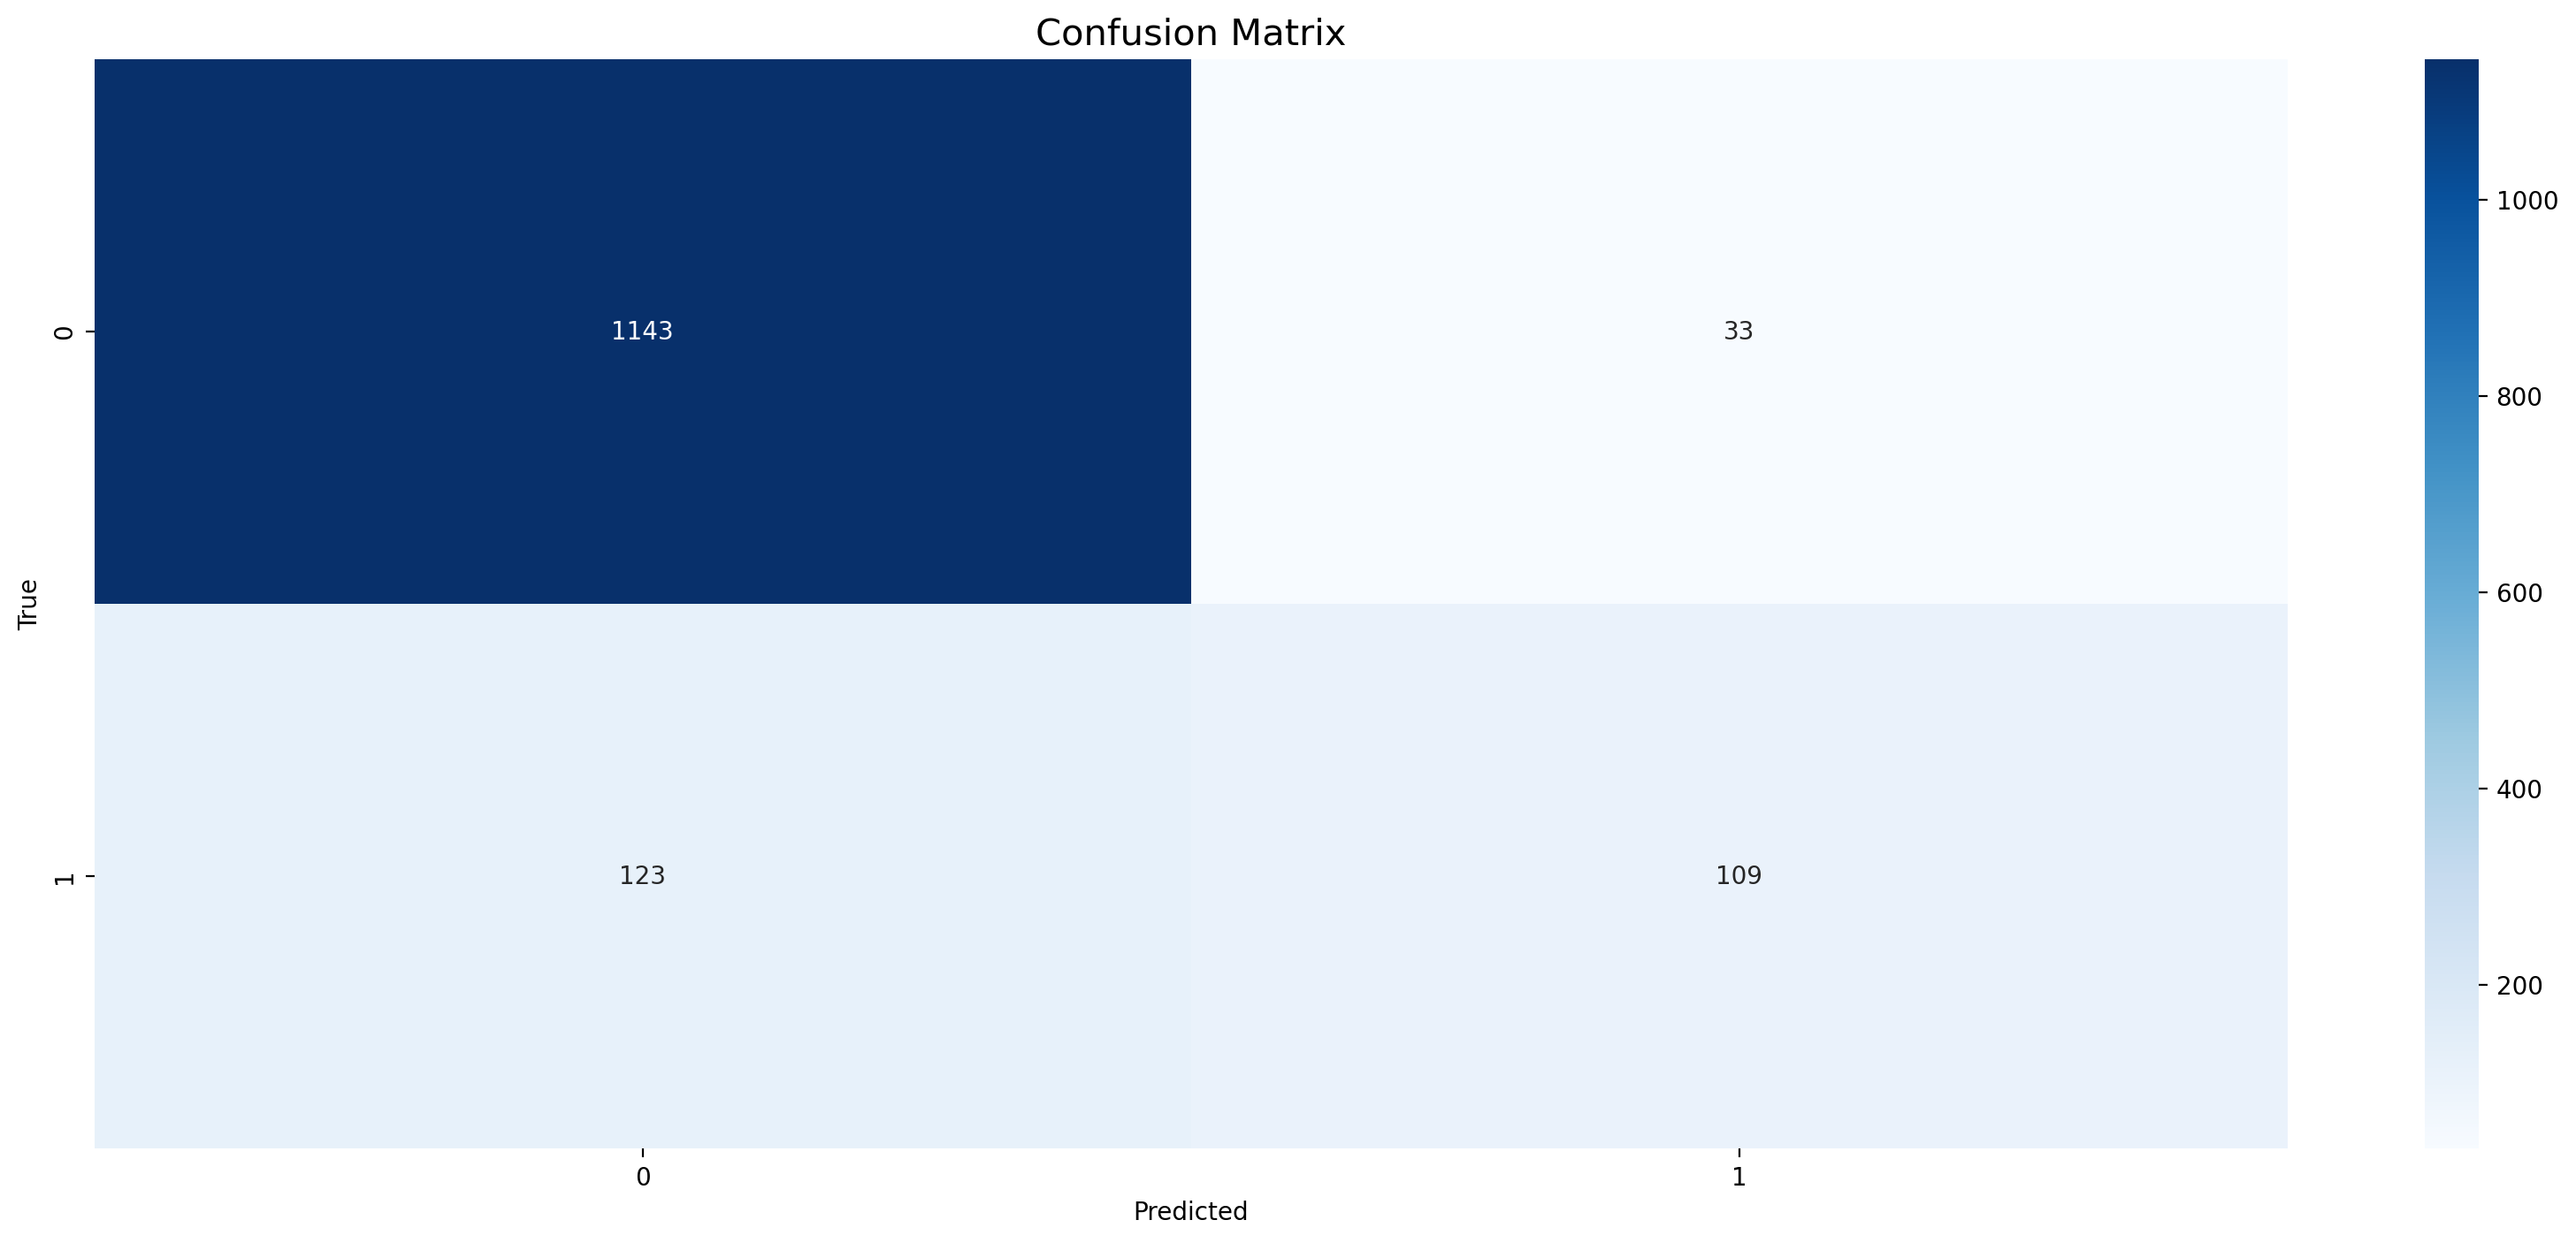

In [57]:
#Plotting the confusion matrix as a heatmap

plt.figure(figsize=(20,8), dpi=200)

sns.heatmap(data = log_cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize=15);

In [58]:
logreg_prob = logreg.predict_proba(X_test)[:, 1]
logbest_prob = logreg_best.predict_proba(X_test)[:, 1]

In [59]:
#Calculating False Positive Rate (fpr), True Positive Rate (tpr) and Area Under Curve for the Receiver
#Operating Characteristic Curve (auc)

log_fpr, log_tpr, _ = roc_curve(y_test, logreg_prob)
log_roc_auc = auc(log_fpr, log_tpr)

logbest_fpr, logbest_tpr, _ = roc_curve(y_test, logbest_prob)
logbest_roc_auc = auc(logbest_fpr, logbest_tpr)

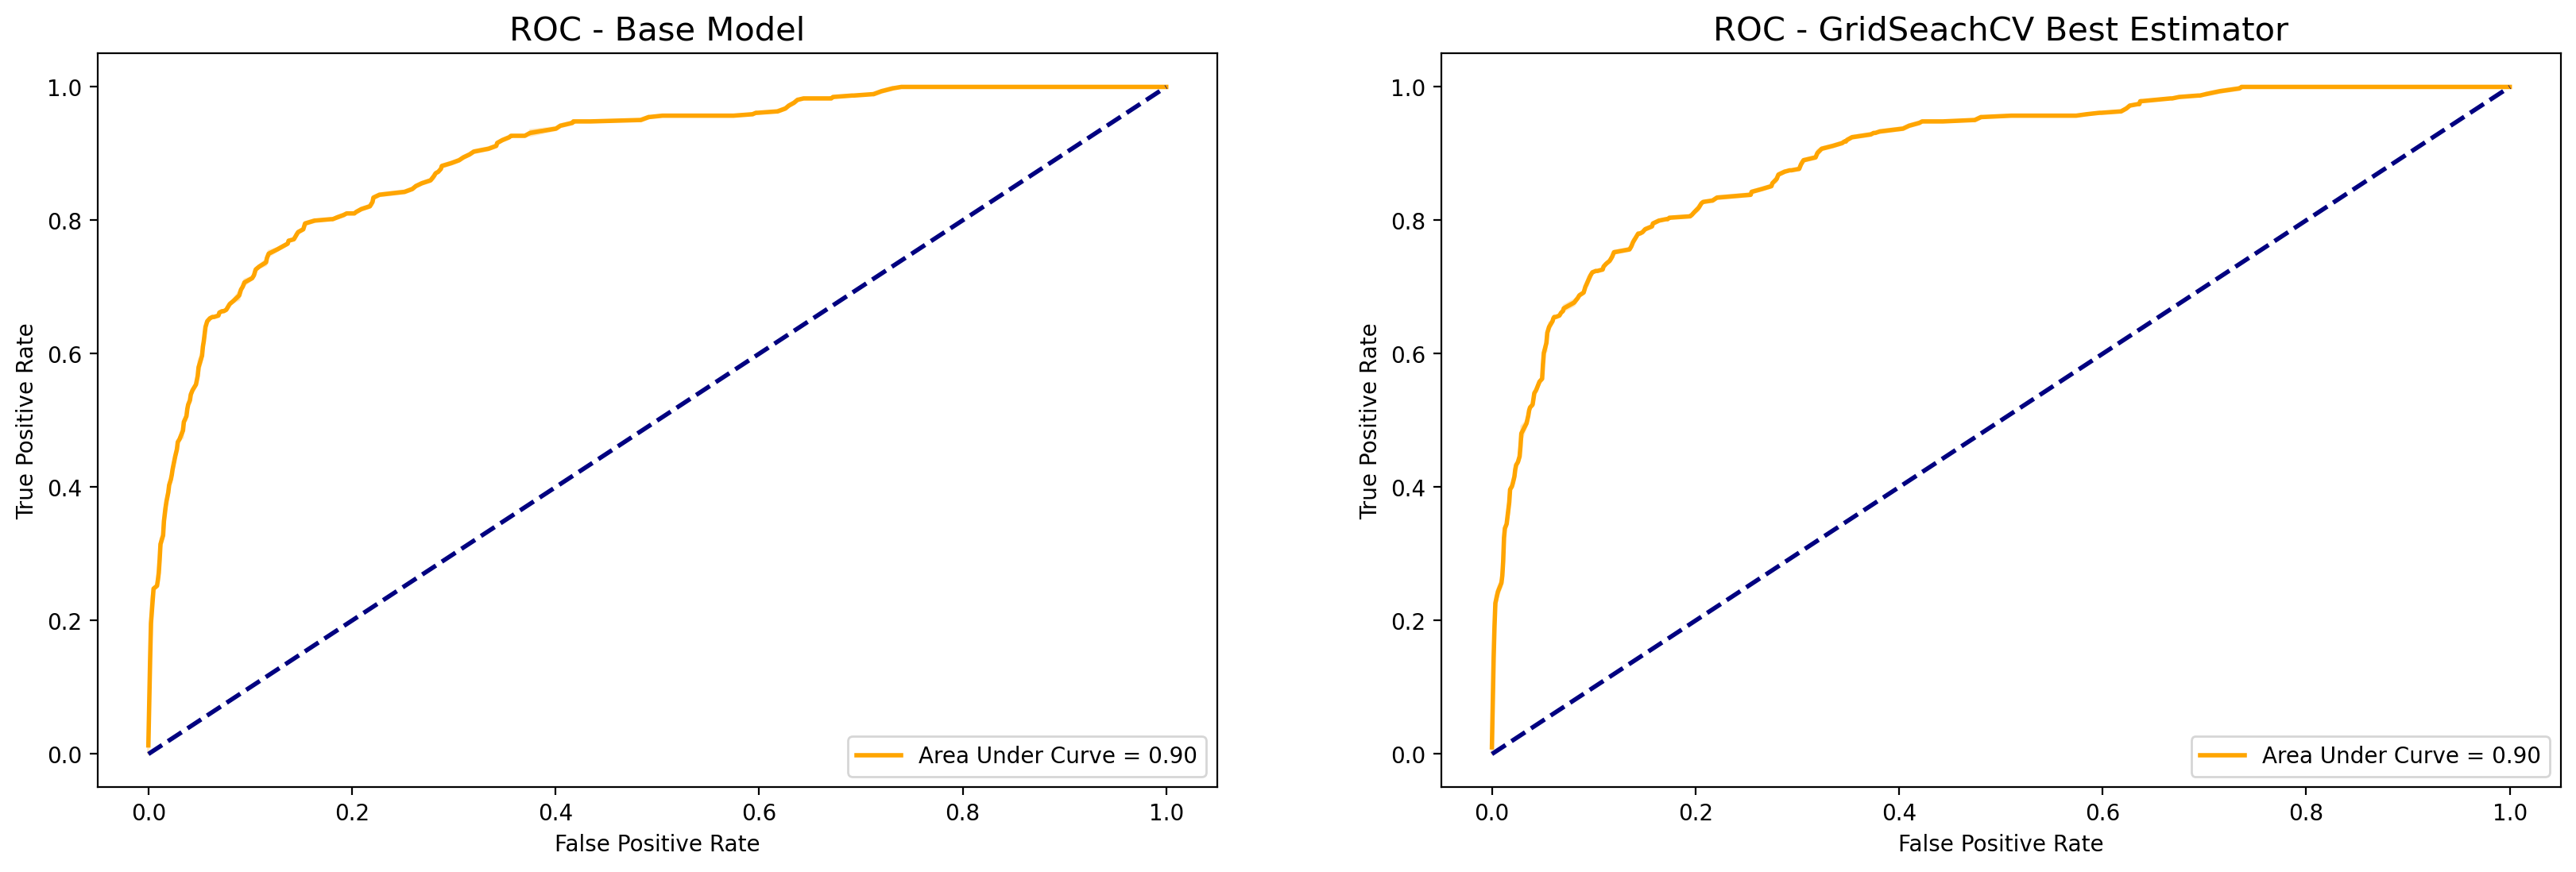

In [60]:
#Plotting the ROC Curve

plt.figure(figsize=(20,6), dpi=200)

plt.subplot(1,2,1)
sns.lineplot(x=log_fpr, y=log_tpr, label=f'Area Under Curve = {log_roc_auc:.2f}', color = 'orange', lw=2)
sns.lineplot(x=[0,1], y=[0,1], color='navy', linestyle='dashed', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Base Model', fontsize=15)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
sns.lineplot(x=logbest_fpr, y=logbest_tpr, label=f'Area Under Curve = {logbest_roc_auc:.2f}', color = 'orange', lw=2)
sns.lineplot(x=[0,1], y=[0,1], color='navy', linestyle='dashed', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - GridSeachCV Best Estimator', fontsize=15)
plt.legend(loc='lower right');

In [61]:
#Calculating the average precision score, precision and recall

log_avg_precision = average_precision_score(y_test, logreg_prob)
log_precision, log_recall, _ = precision_recall_curve(y_test, logbest_prob)

logbest_avg_precision = average_precision_score(y_test, logreg_prob)
logbest_precision, logbest_recall, _ = precision_recall_curve(y_test, logbest_prob)

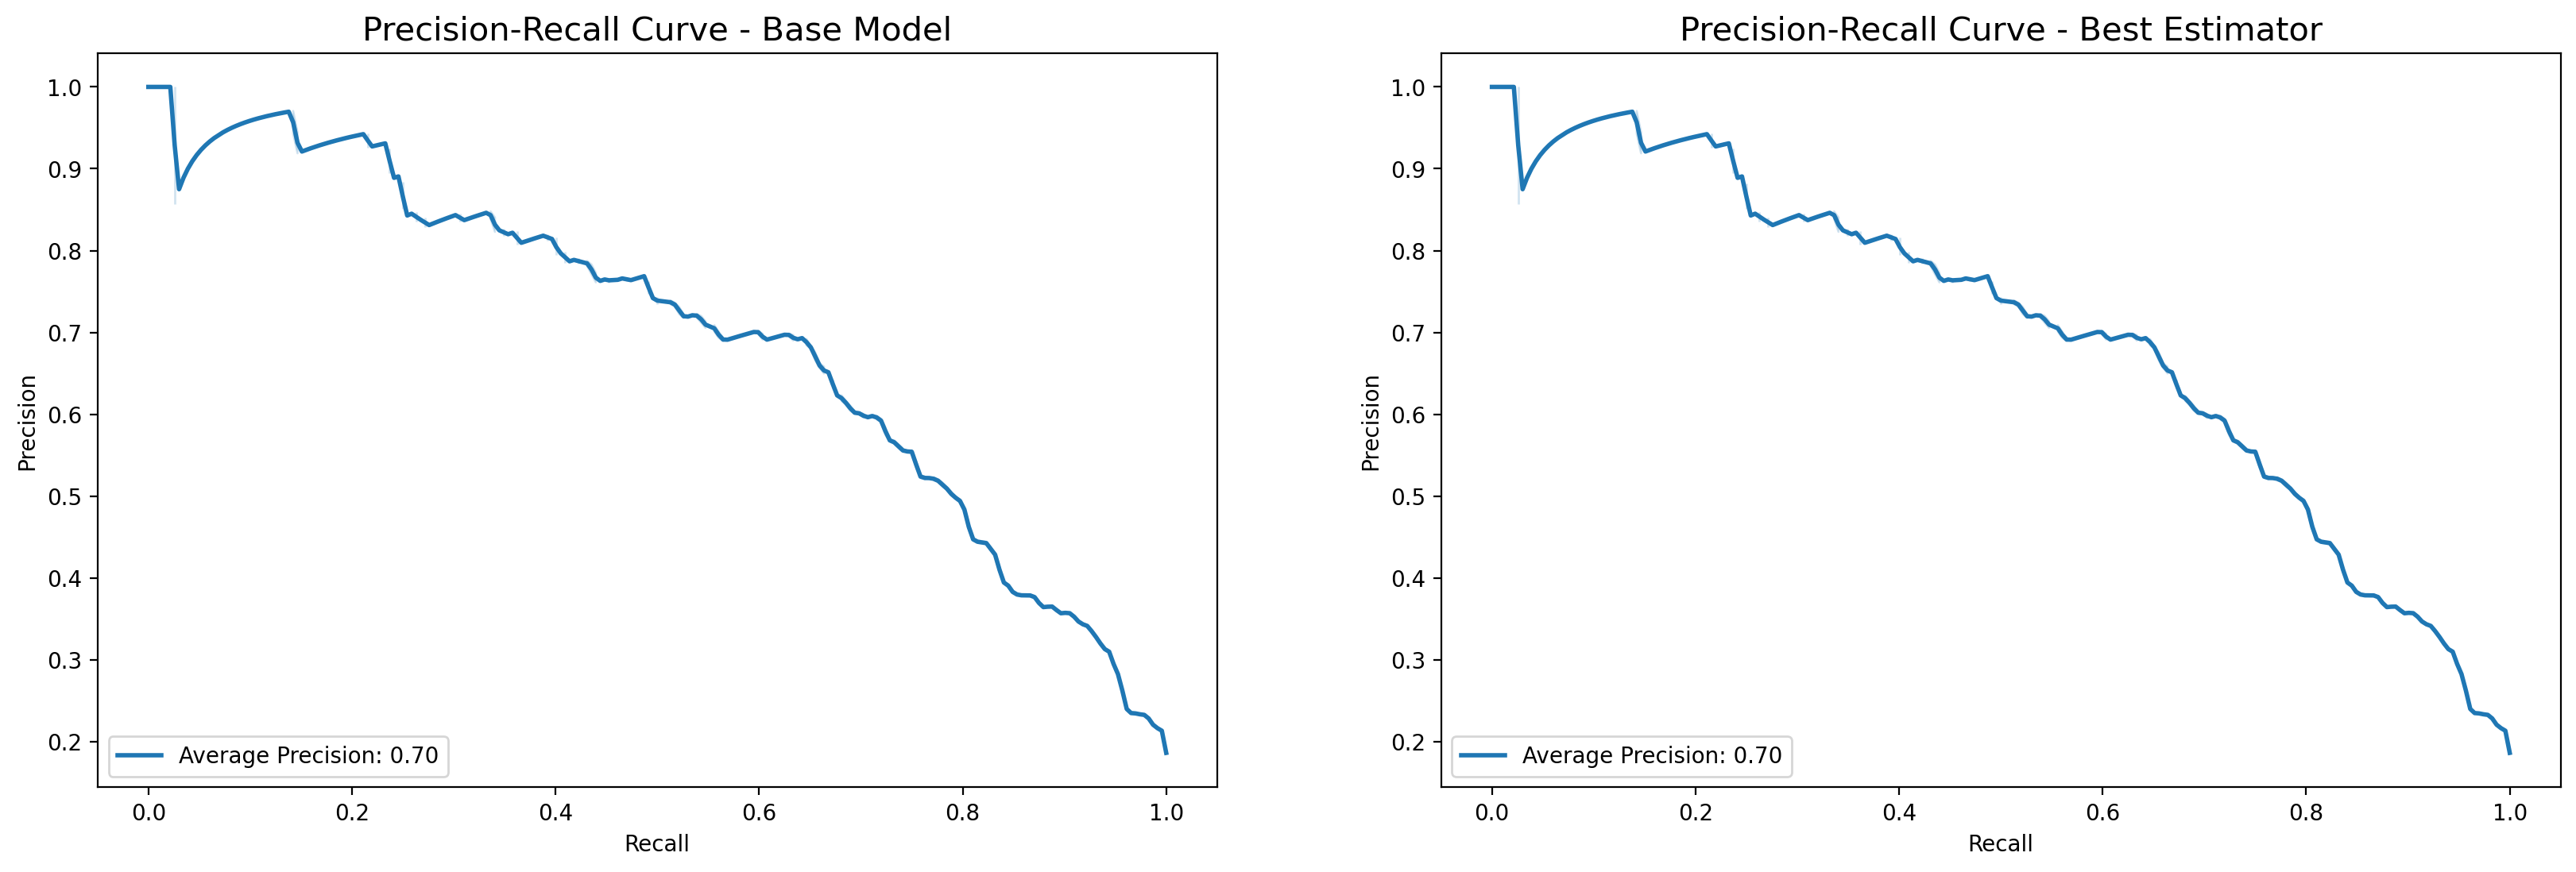

In [62]:
#Plotting the Precision-Recall Curve

plt.figure(figsize=(20,6), dpi=200)

plt.subplot(1,2,1)
sns.lineplot(x=log_recall, y=log_precision, label=f'Average Precision: {log_avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Base Model', fontsize=15)
plt.legend(loc='lower left')

plt.subplot(1,2,2)
sns.lineplot(x=logbest_recall, y=logbest_precision, label=f'Average Precision: {logbest_avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Best Estimator', fontsize=15)
plt.legend(loc='lower left');

In [63]:
#Getting the feature importances for all the features

feature_names = X_train.columns
coef = logreg_best.coef_[0]

feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient':coef})
feature_importance = feature_importance.sort_values(by = 'Coefficient', ascending=False)

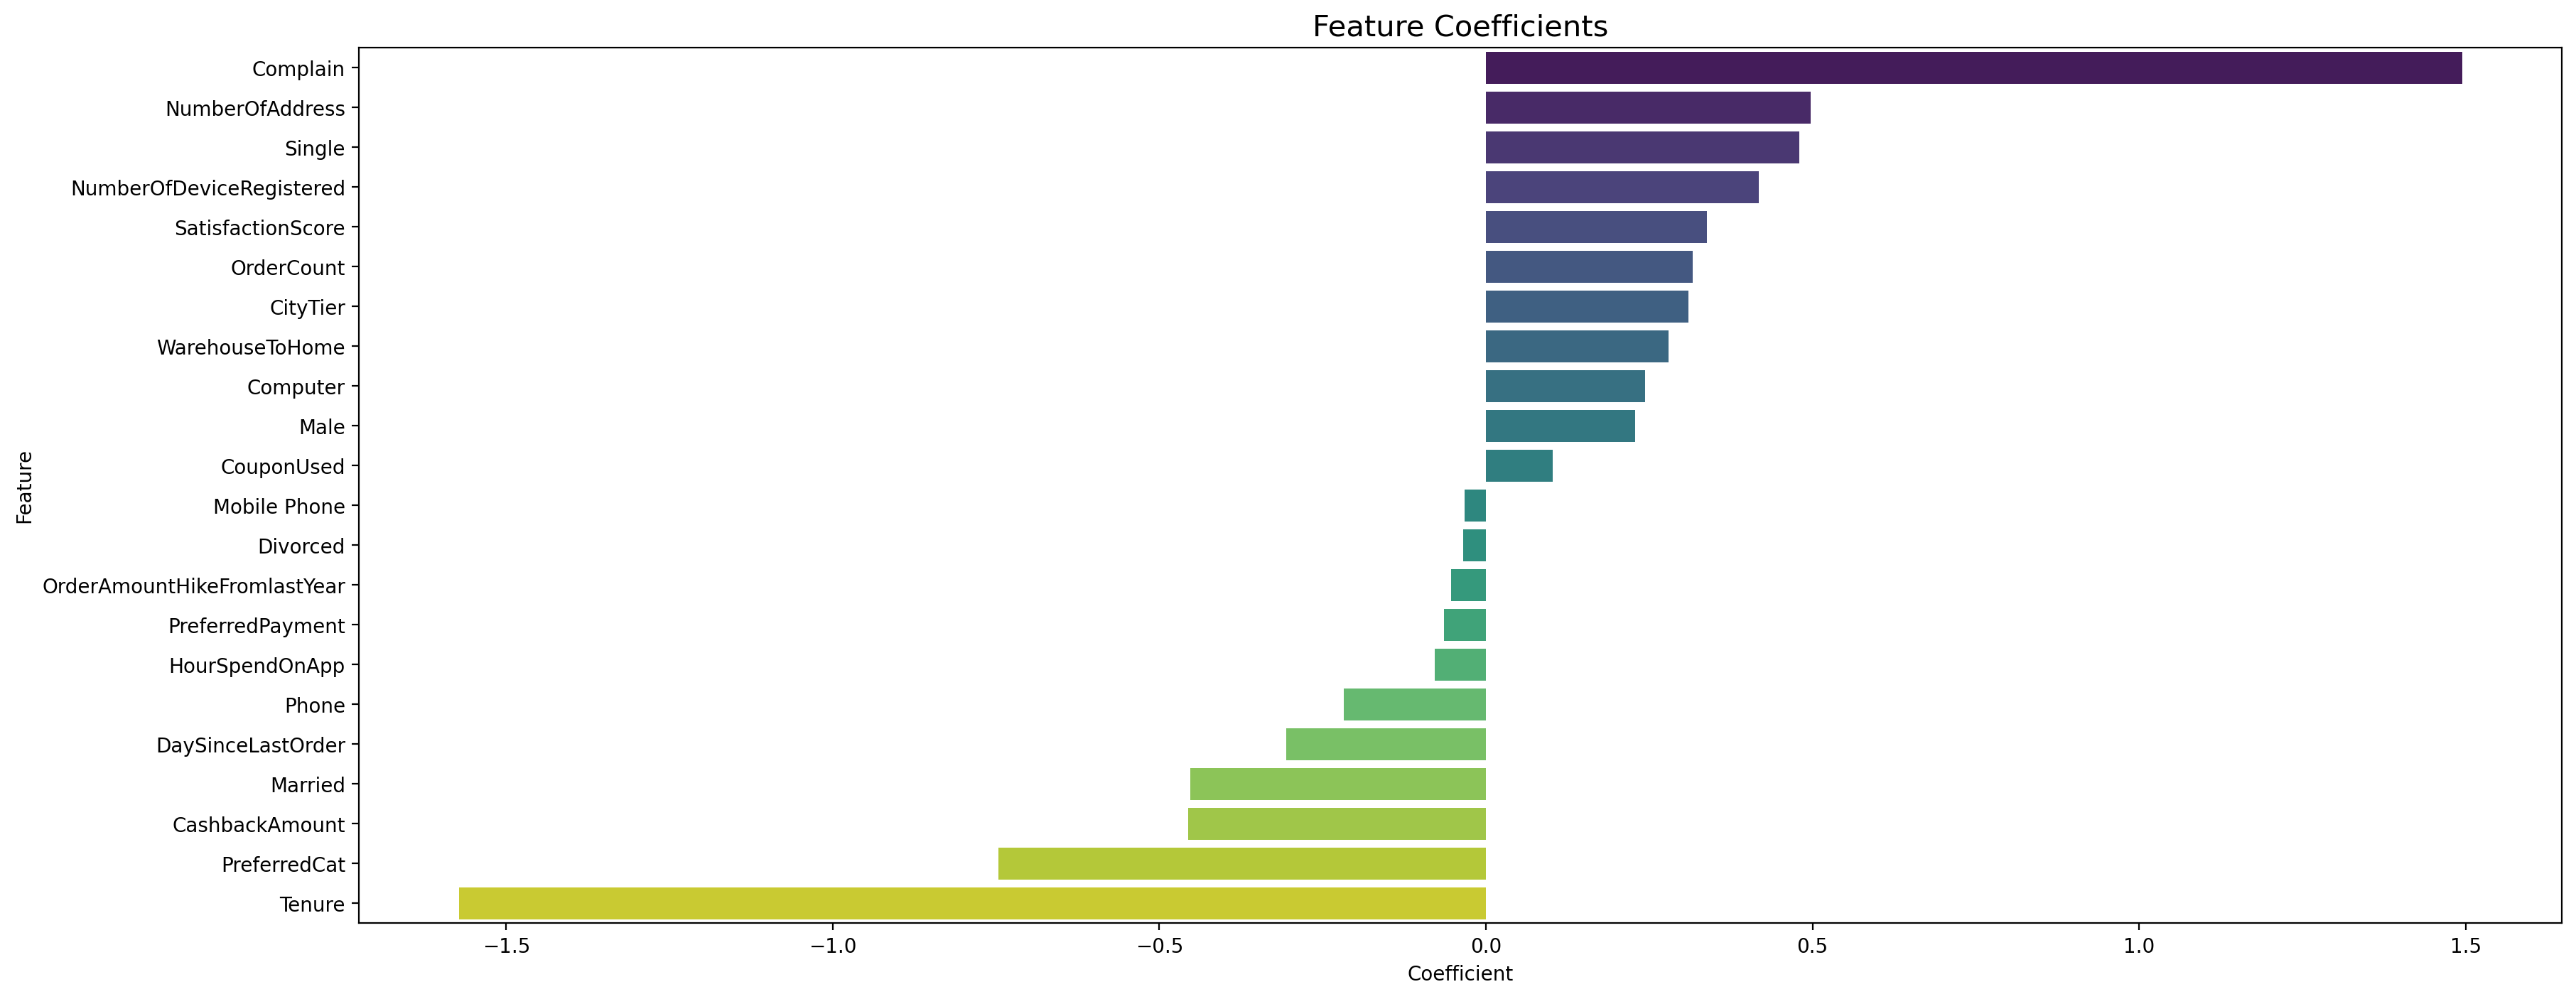

In [64]:
#Plotting the features according to their feature coefficients to analyze them more easily.

plt.figure(figsize=(20, 8), dpi=200)
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis', hue='Feature')
plt.title('Feature Coefficients', fontsize=15)
plt.show();

We use this as a reference earlier to plot the Churn against the 3 features with the highest magnitude of feature coefficients. These are: Complain, Tenure and PreferredCat

In [65]:
log_prec = round(precision_score(y_test, logreg_best_pred)*100, 2)
log_rec = round(recall_score(y_test, logreg_best_pred)*100, 2)

## K-Nearest Neighbors

In [66]:
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)

In [67]:
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [68]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1176
           1       0.80      0.54      0.65       232

    accuracy                           0.90      1408
   macro avg       0.86      0.76      0.80      1408
weighted avg       0.90      0.90      0.89      1408



In [69]:
print(f'Testing Score: {round(knn.score(X_test, y_test)*100,2)}%')
print(f'Training Score: {round(knn.score(X_train, y_train)*100,2)}%')

Testing Score: 90.27%
Training Score: 94.98%


## Implementing GridSearchCV in KNN for Parameter Tuning

In [70]:
knn_param_grid = {'n_neighbors': [3,5,7,9,11,13,15],
                 'weights': ['uniform', 'distance'],
                 'metric':['euclidean', 'manhattan', 'minkowski']}

knn_grid = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=10, scoring='accuracy', n_jobs=-1)

knn_grid.fit(X_train, y_train)

knn_best_params = knn_grid.best_params_
knn_best_score = knn_grid.best_score_

In [71]:
print(f'Best Parameters: {knn_best_params}')
print(f'Best Score: {knn_best_score:.2f}')

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.95


In [72]:
knn_best = knn_grid.best_estimator_

In [73]:
knn_cm = confusion_matrix(y_test, knn_best.predict(X_test))

In [74]:
print(knn_cm)

[[1147   29]
 [  41  191]]


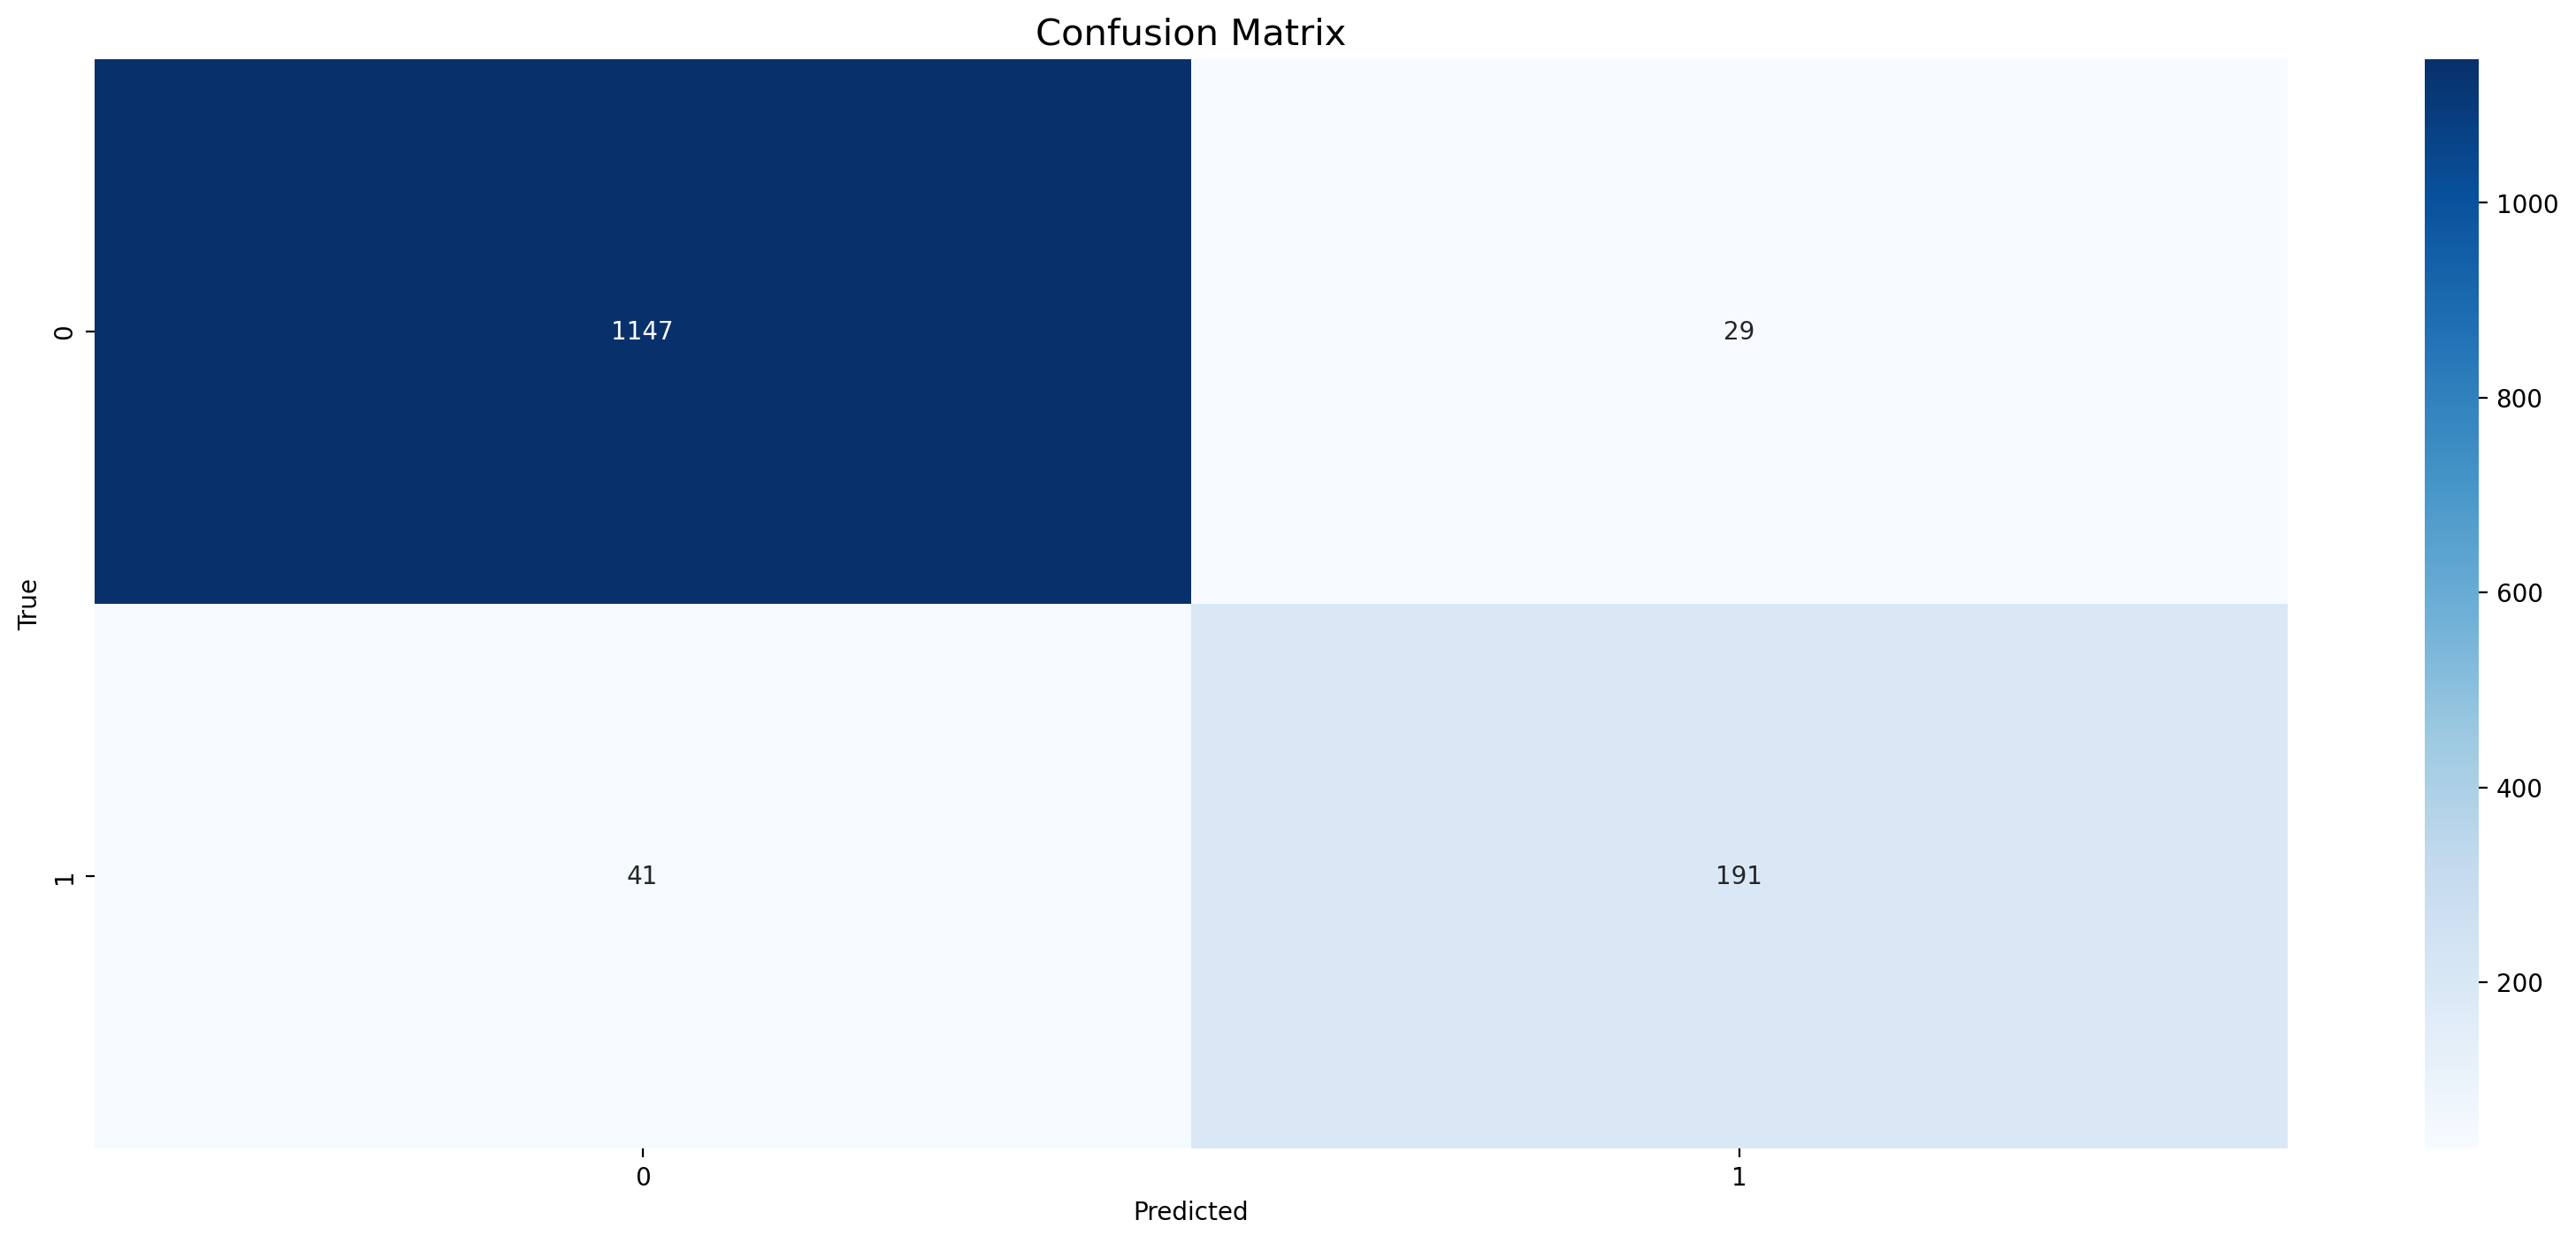

In [75]:
plt.figure(figsize=(20,8), dpi=200)

sns.heatmap(data = knn_cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize=15);

In [76]:
knn_prob = knn.predict_proba(X_test)[:,1]
knnbest_prob = knn_best.predict_proba(X_test)[:,1]

In [77]:
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_prob)
knn_roc_auc = auc(knn_fpr, knn_tpr)

knnbest_fpr, knnbest_tpr, _ = roc_curve(y_test, knnbest_prob)
knnbest_roc_auc = auc(knnbest_fpr, knnbest_tpr)

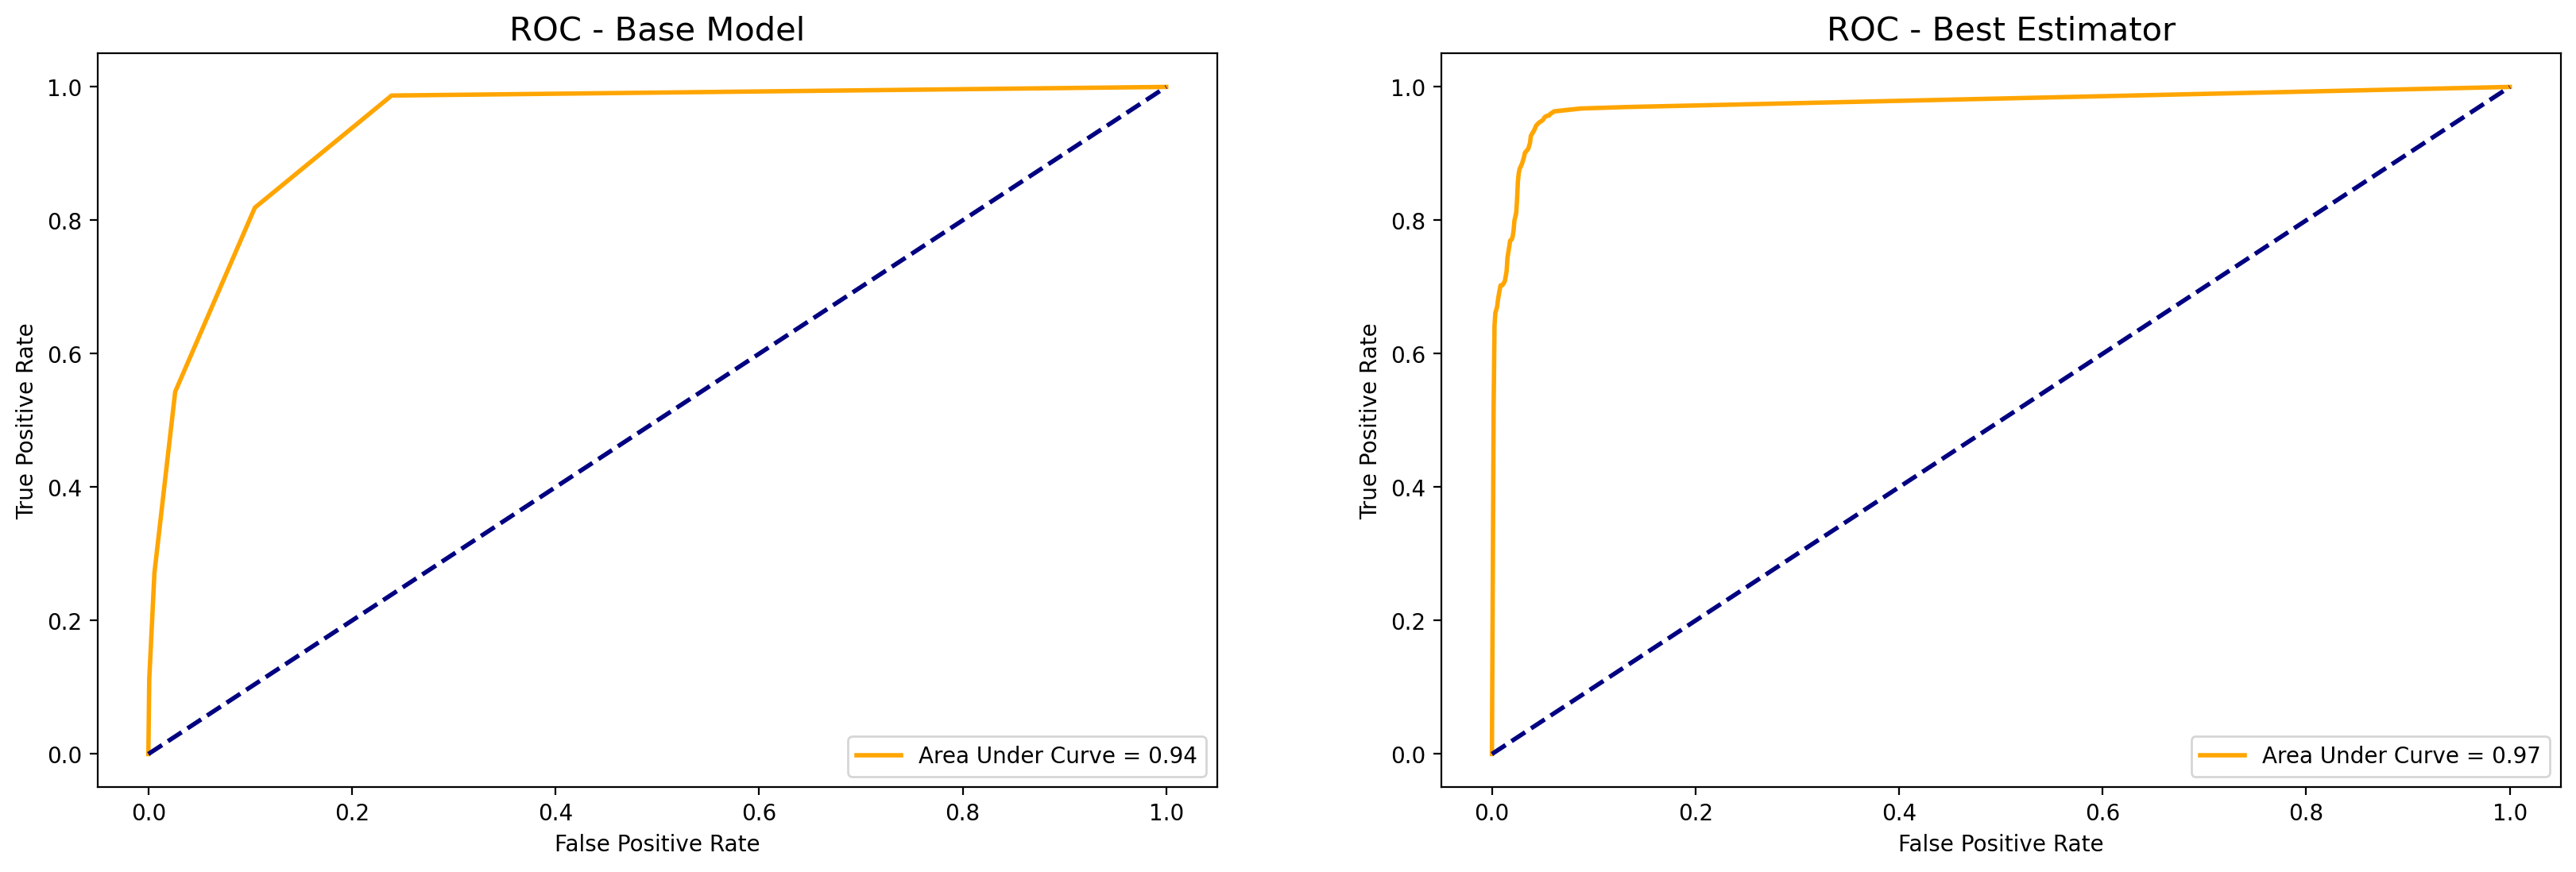

In [78]:
plt.figure(figsize=(20,6), dpi=200)

plt.subplot(1,2,1)
sns.lineplot(x=knn_fpr, y=knn_tpr, label=f'Area Under Curve = {knn_roc_auc:.2f}', color = 'orange', lw=2)
sns.lineplot(x=[0,1], y=[0,1], color='navy', linestyle='dashed', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Base Model', fontsize=15)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
sns.lineplot(x=knnbest_fpr, y=knnbest_tpr, label=f'Area Under Curve = {knnbest_roc_auc:.2f}', color = 'orange', lw=2)
sns.lineplot(x=[0,1], y=[0,1], color='navy', linestyle='dashed', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Best Estimator', fontsize=15)
plt.legend(loc='lower right');

In [79]:
knn_avg_precision = average_precision_score(y_test, knn_prob)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_prob)

knnbest_avg_precision = average_precision_score(y_test, knnbest_prob)
knnbest_precision, knnbest_recall, _ = precision_recall_curve(y_test, knnbest_prob)

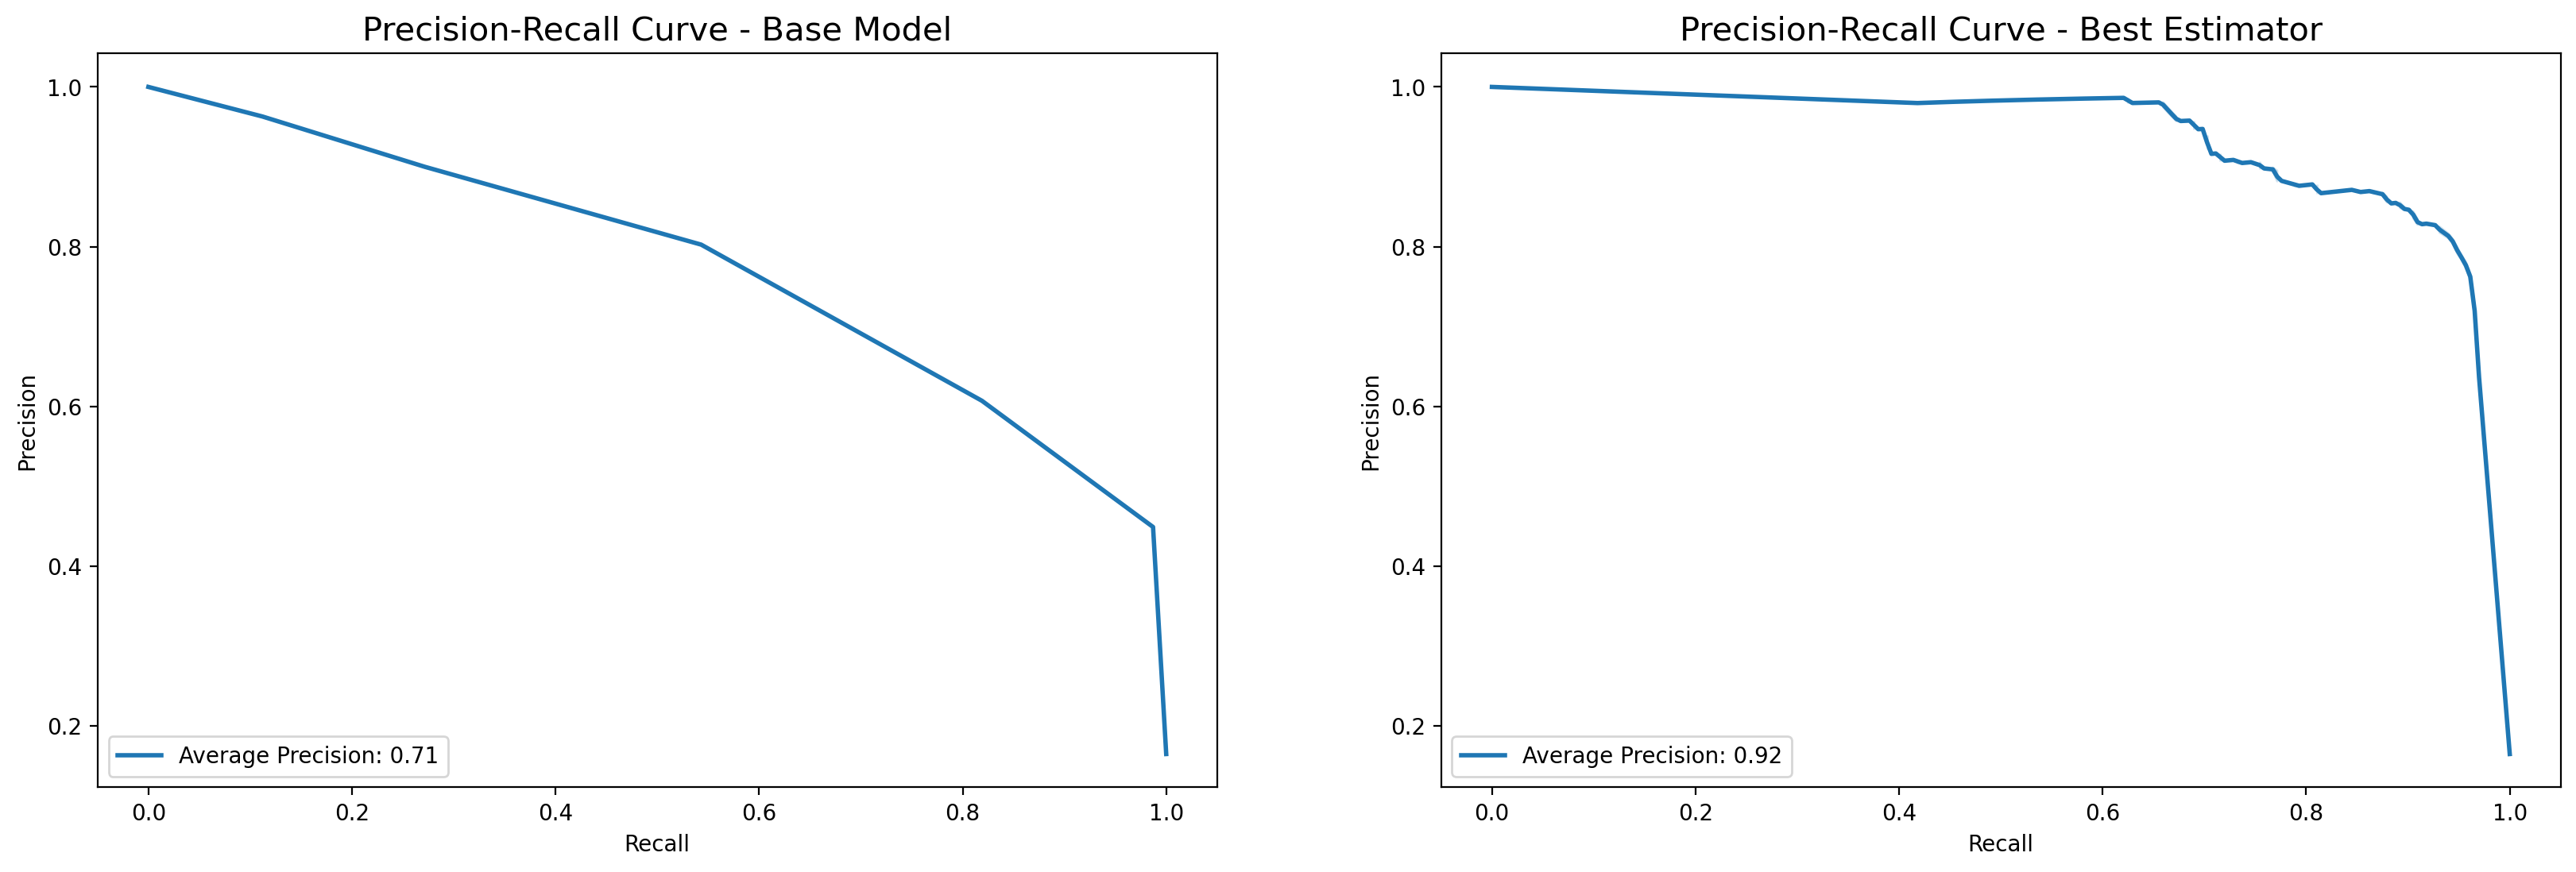

In [80]:
plt.figure(figsize=(20,6), dpi=200)

plt.subplot(1,2,1)
sns.lineplot(x=knn_recall, y=knn_precision, label=f'Average Precision: {knn_avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Base Model', fontsize=15)
plt.legend(loc='lower left')

plt.subplot(1,2,2)
sns.lineplot(x=knnbest_recall, y=knnbest_precision, label=f'Average Precision: {knnbest_avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Best Estimator', fontsize=15)
plt.legend(loc='lower left');

In [81]:
knn_prec = round(precision_score(y_test, knn_best.predict(X_test))*100, 2)
knn_rec = round(recall_score(y_test, knn_best.predict(X_test))*100, 2)

## Descision Trees

In [82]:
dt = DecisionTreeClassifier(random_state=1)

In [83]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [84]:
dt_pred = dt.predict(X_test)

In [85]:
print(f'Testing Score: {round(dt.score(X_test, y_test)*100,2)}%')
print(f'Training Score: {round(dt.score(X_train, y_train)*100,2)}%')

Testing Score: 94.18%
Training Score: 100.0%


In [86]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1176
           1       0.82      0.83      0.82       232

    accuracy                           0.94      1408
   macro avg       0.89      0.90      0.89      1408
weighted avg       0.94      0.94      0.94      1408



## Implementing GridSearchCV in Decision Tree for Parameter Tuning

In [87]:
dt_param_grid = {'criterion': ['gini', 'entropy'],
                'max_depth': [None, 10, 20, 30, 40, 50],
                'min_samples_split': [2,5,10,15,20],
                'min_samples_leaf': [1,2,4],
                'max_features': [None, 'sqrt', 'log2']}

dt_grid = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=10, scoring='accuracy', n_jobs=-1)

dt_grid.fit(X_train, y_train)

dt_best_params = dt_grid.best_params_
dt_best_score = dt_grid.best_score_

In [88]:
print(f'Best Parameters: {dt_best_params}')
print(f'Best Score: {dt_best_score:.2f}')

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.94


In [89]:
dt_best = dt_grid.best_estimator_

In [90]:
dt_cm = confusion_matrix(y_test, dt_best.predict(X_test))

In [91]:
print(dt_cm)

[[1133   43]
 [  39  193]]


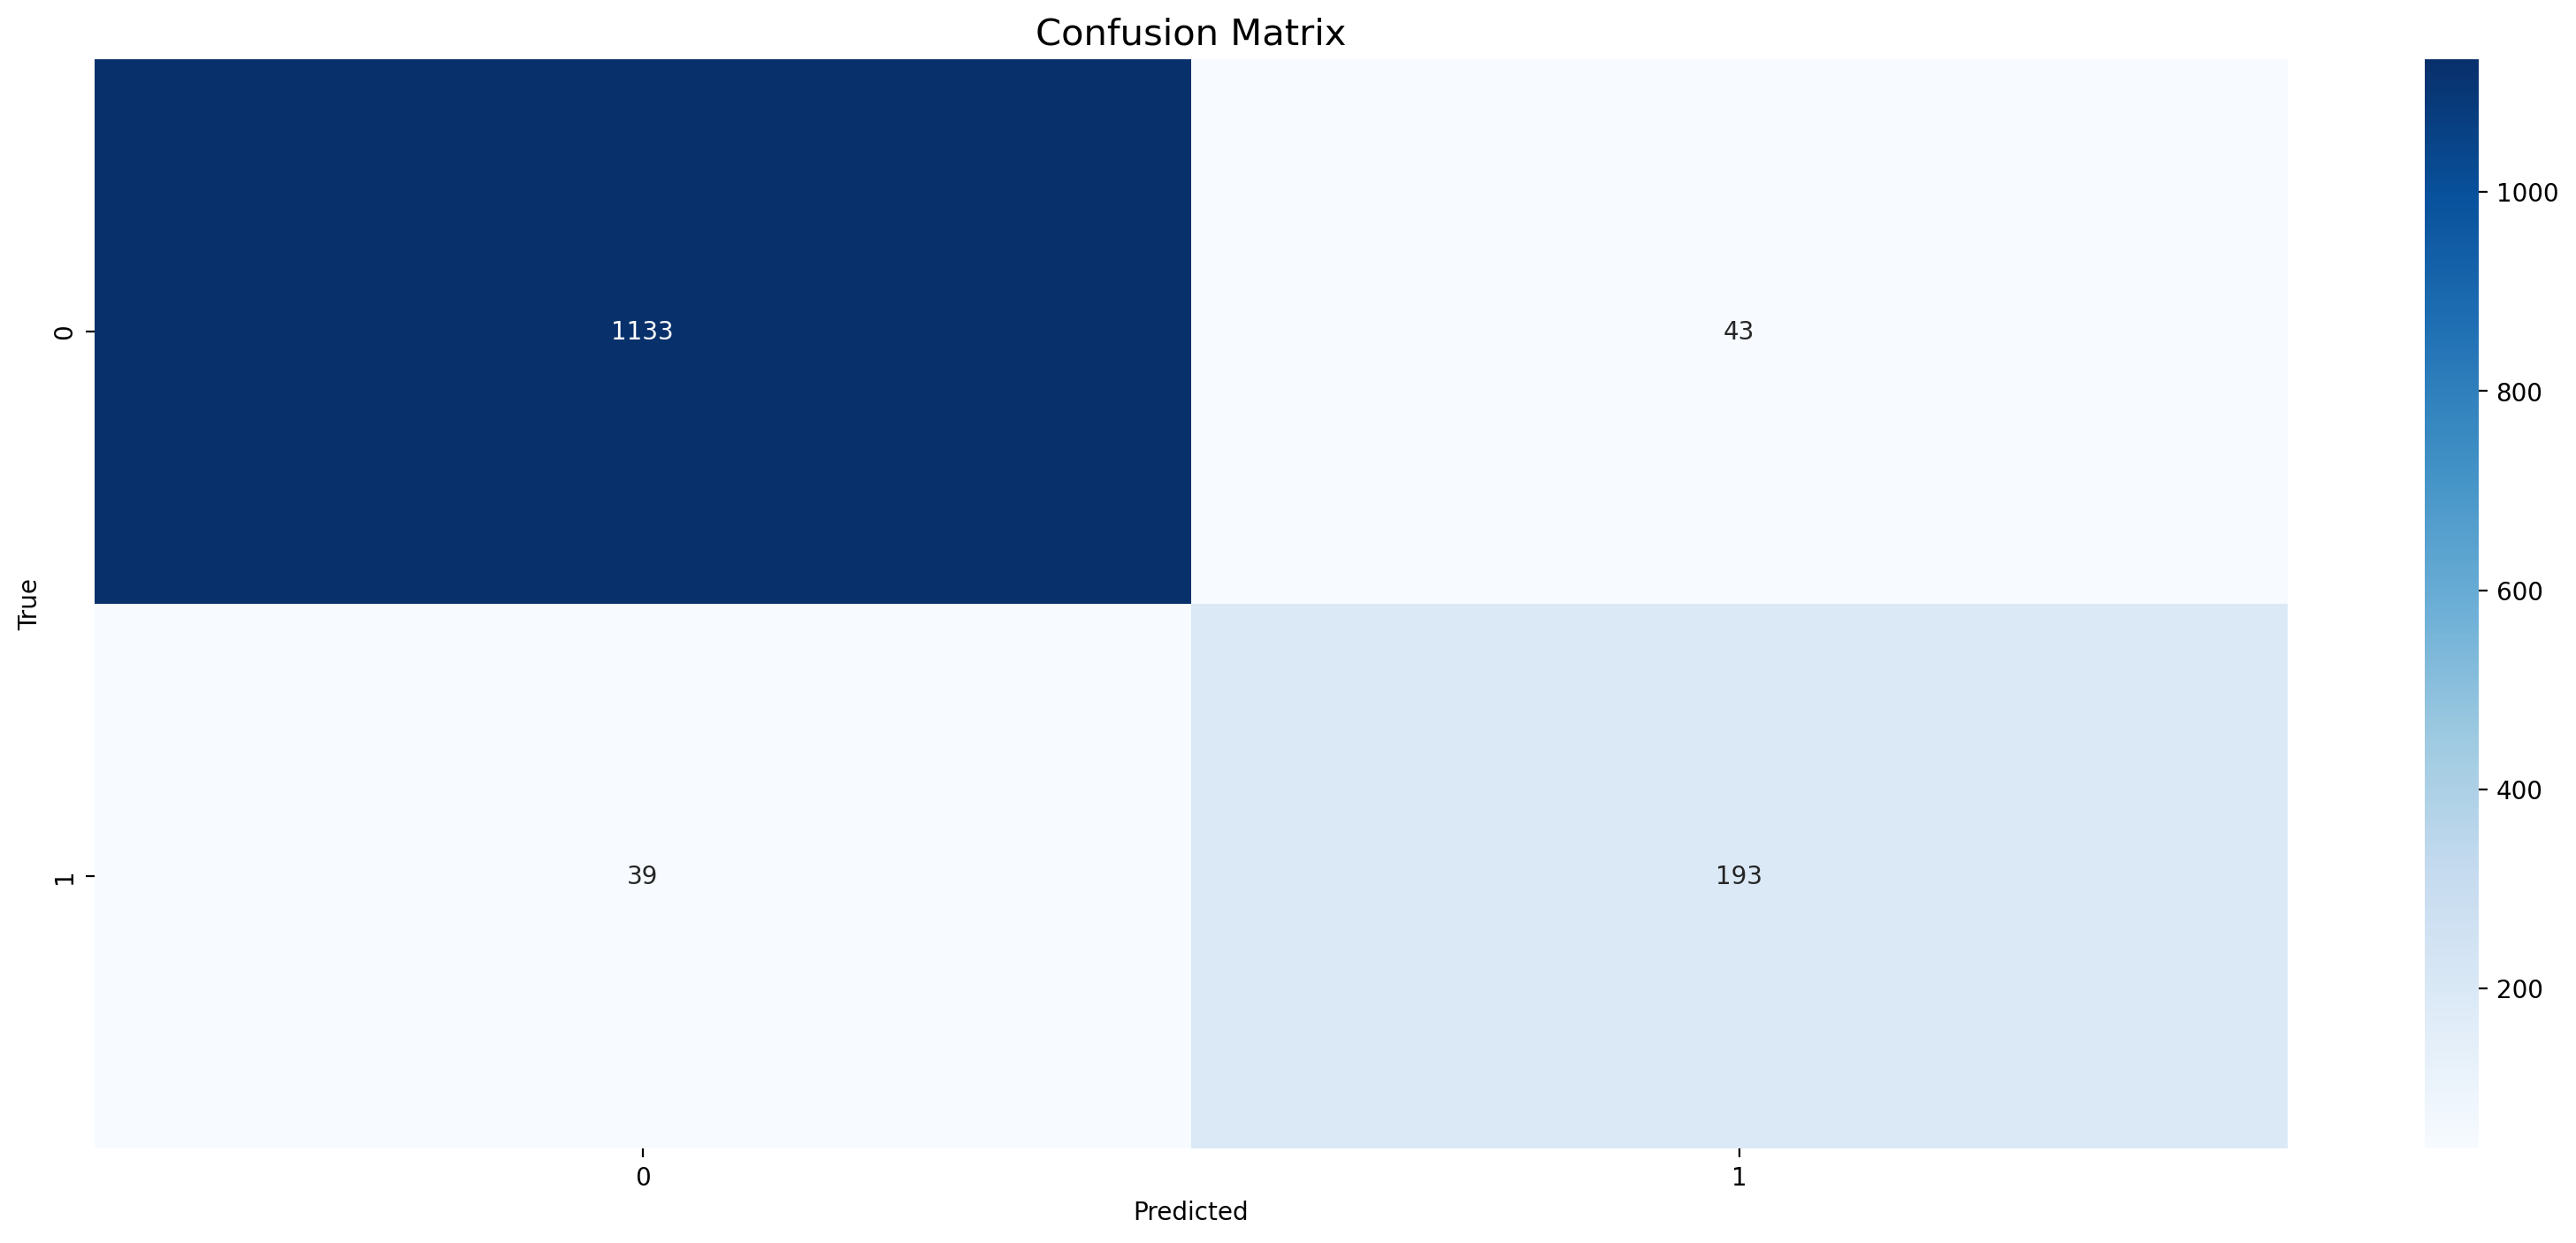

In [92]:
plt.figure(figsize=(20,8), dpi=200)

sns.heatmap(data = dt_cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize=15);

In [93]:
dt_prob = dt.predict_proba(X_test)[:,1]
dtbest_prob = dt_best.predict_proba(X_test)[:,1]

In [94]:
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_prob)
dt_roc_auc = auc(dt_fpr, dt_tpr)

dtbest_fpr, dtbest_tpr, _ = roc_curve(y_test, dtbest_prob)
dtbest_roc_auc = auc(dtbest_fpr, dtbest_tpr)

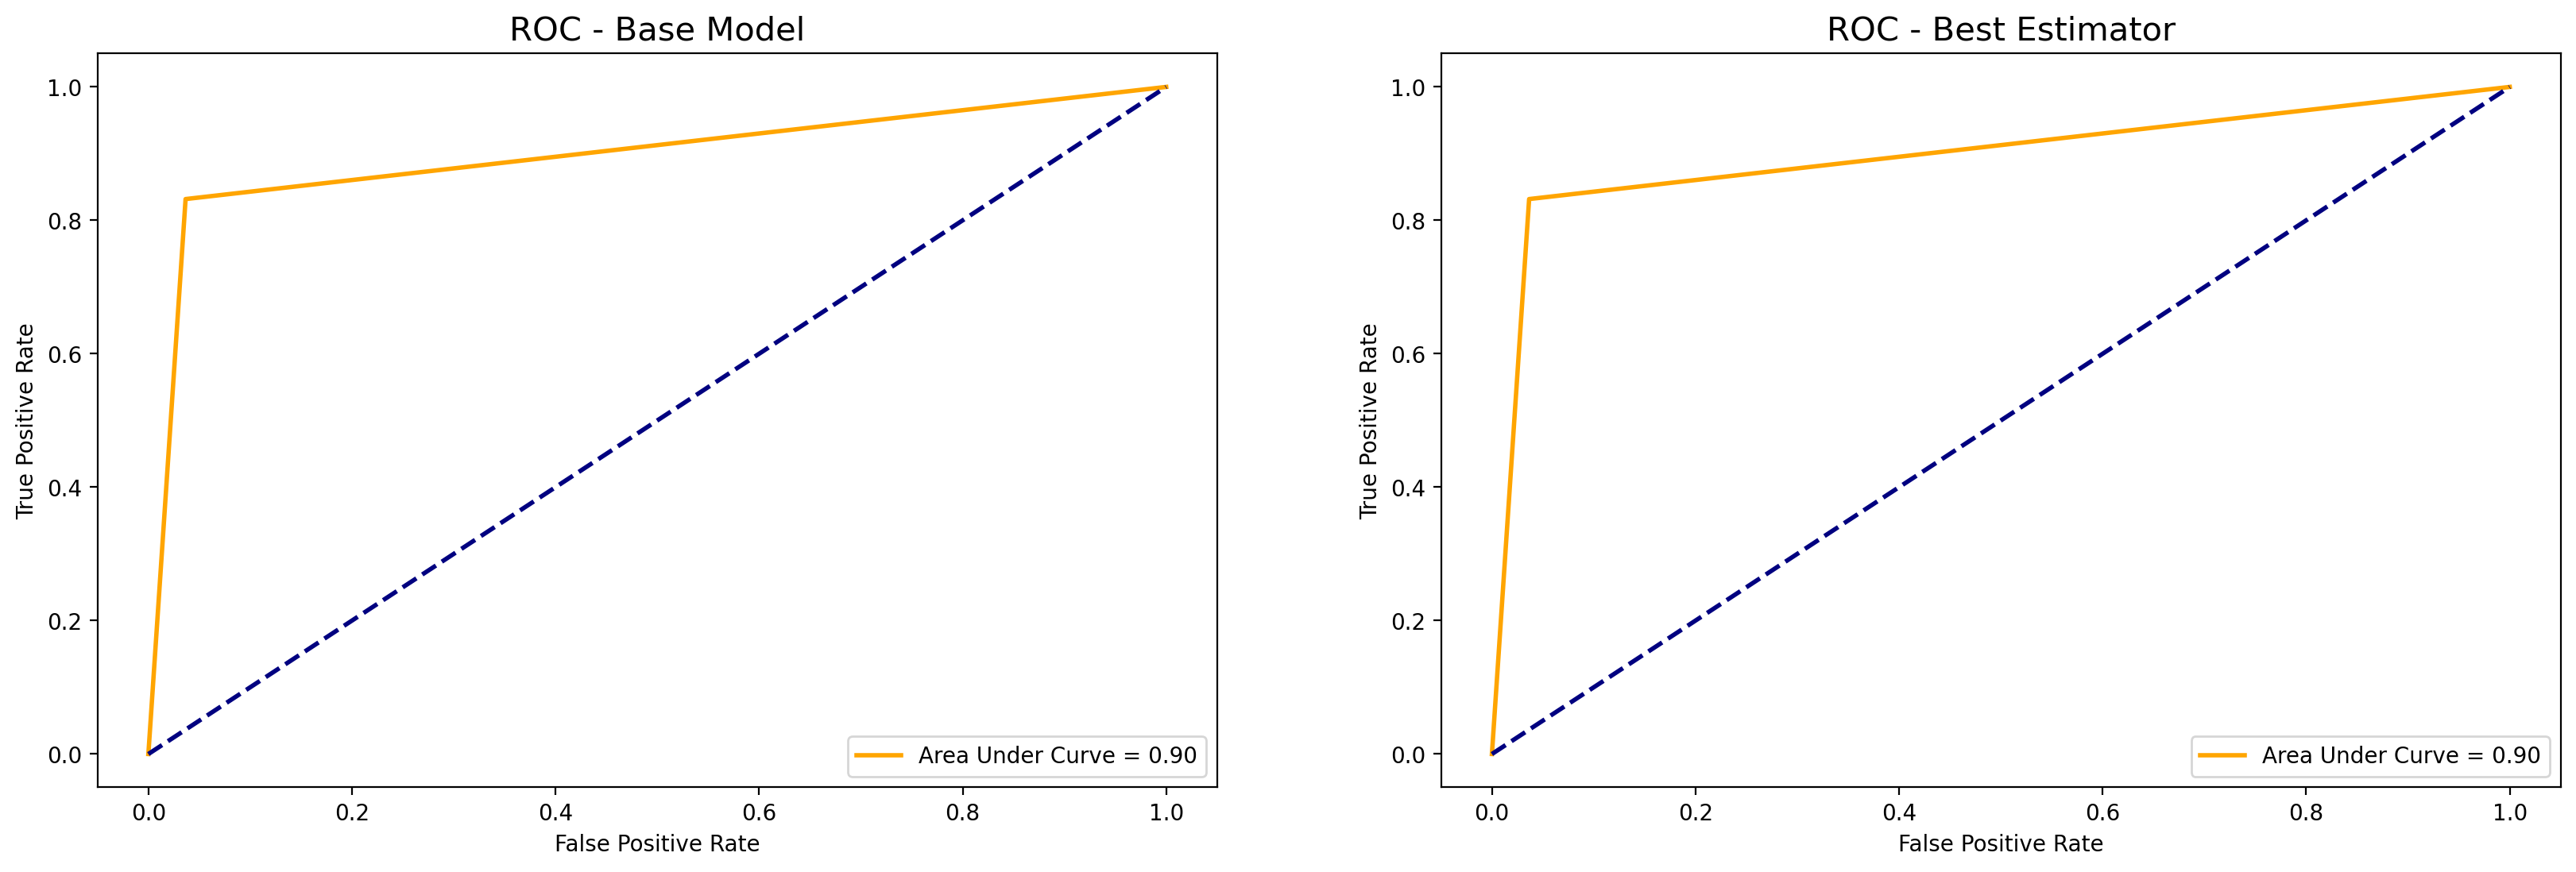

In [95]:
plt.figure(figsize=(20,6), dpi=200)

plt.subplot(1,2,1)
sns.lineplot(x=dt_fpr, y=dt_tpr, label=f'Area Under Curve = {dt_roc_auc:.2f}', color = 'orange', lw=2)
sns.lineplot(x=[0,1], y=[0,1], color='navy', linestyle='dashed', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Base Model', fontsize=15)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
sns.lineplot(x=dtbest_fpr, y=dtbest_tpr, label=f'Area Under Curve = {dtbest_roc_auc:.2f}', color = 'orange', lw=2)
sns.lineplot(x=[0,1], y=[0,1], color='navy', linestyle='dashed', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Best Estimator', fontsize=15)
plt.legend(loc='lower right');

In [96]:
dt_avg_precision = average_precision_score(y_test, dt_prob)
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_prob)

dtbest_avg_precision = average_precision_score(y_test, dtbest_prob)
dtbest_precision, dtbest_recall, _ = precision_recall_curve(y_test, dtbest_prob)

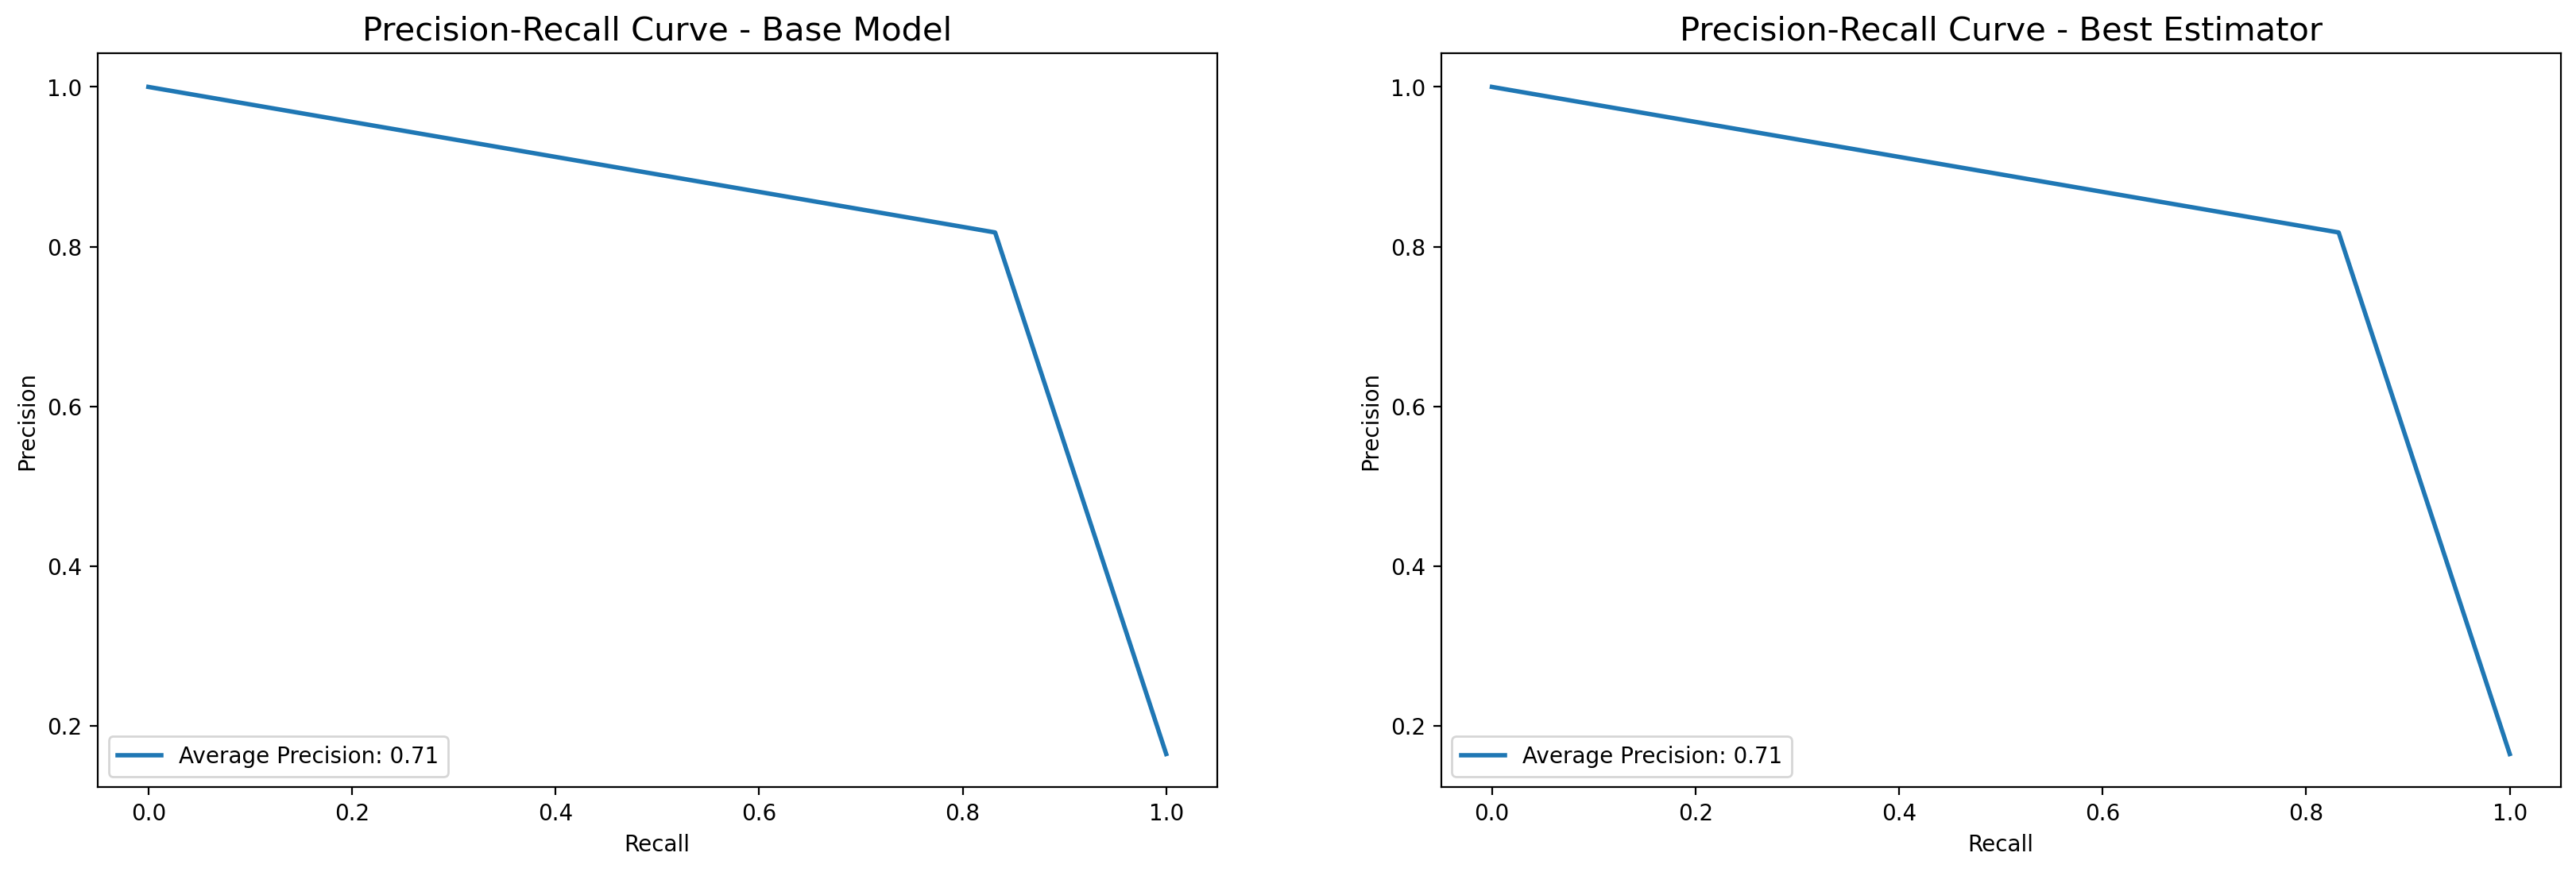

In [97]:
plt.figure(figsize=(20,6), dpi=200)

plt.subplot(1,2,1)
sns.lineplot(x=dt_recall, y=dt_precision, label=f'Average Precision: {dt_avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Base Model', fontsize=15)
plt.legend(loc='lower left')

plt.subplot(1,2,2)
sns.lineplot(x=dtbest_recall, y=dtbest_precision, label=f'Average Precision: {dtbest_avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Best Estimator', fontsize=15)
plt.legend(loc='lower left');

In [98]:
dt_prec = round(precision_score(y_test, dt_best.predict(X_test))*100, 2)
dt_rec = round(recall_score(y_test, dt_best.predict(X_test))*100, 2)

## Support Vector Classifier

In [99]:
svc = SVC(random_state=1, probability=True)

In [100]:
svc.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [101]:
svc_pred = svc.predict(X_test)

In [102]:
print(f'Testing Score: {round(svc.score(X_test, y_test)*100,2)}%')
print(f'Training Score: {round(svc.score(X_train, y_train)*100,2)}%')

Testing Score: 91.55%
Training Score: 93.58%


In [103]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1176
           1       0.87      0.57      0.69       232

    accuracy                           0.92      1408
   macro avg       0.90      0.78      0.82      1408
weighted avg       0.91      0.92      0.91      1408



## Implementing GridSearchCV in Support Vector Classifier for Parameter Tuning

In [104]:
svm_param_grid = {'C':[0.01,0.1,1,10,100],
                 'gamma':[1, 0.1, 0.01, 0.001],
                 'kernel':['rbf', 'linear','poly'],
                 'probability':[True]}

svm_grid = GridSearchCV(estimator=svc, param_grid=svm_param_grid, cv=10, verbose=3, n_jobs=-1)

svm_grid.fit(X_train, y_train)

svm_best_params = svm_grid.best_params_
svm_best_score = svm_grid.best_score_

Fitting 10 folds for each of 60 candidates, totalling 600 fits


In [105]:
print(f'Best Parameters: {svm_best_params}')
print(f'Best Score: {svm_best_score:.2f}')

Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
Best Score: 0.96


In [106]:
svm_best = svm_grid.best_estimator_

In [107]:
svm_cm = confusion_matrix(y_test, svm_best.predict(X_test))

In [108]:
print(svm_cm)

[[1160   16]
 [  16  216]]


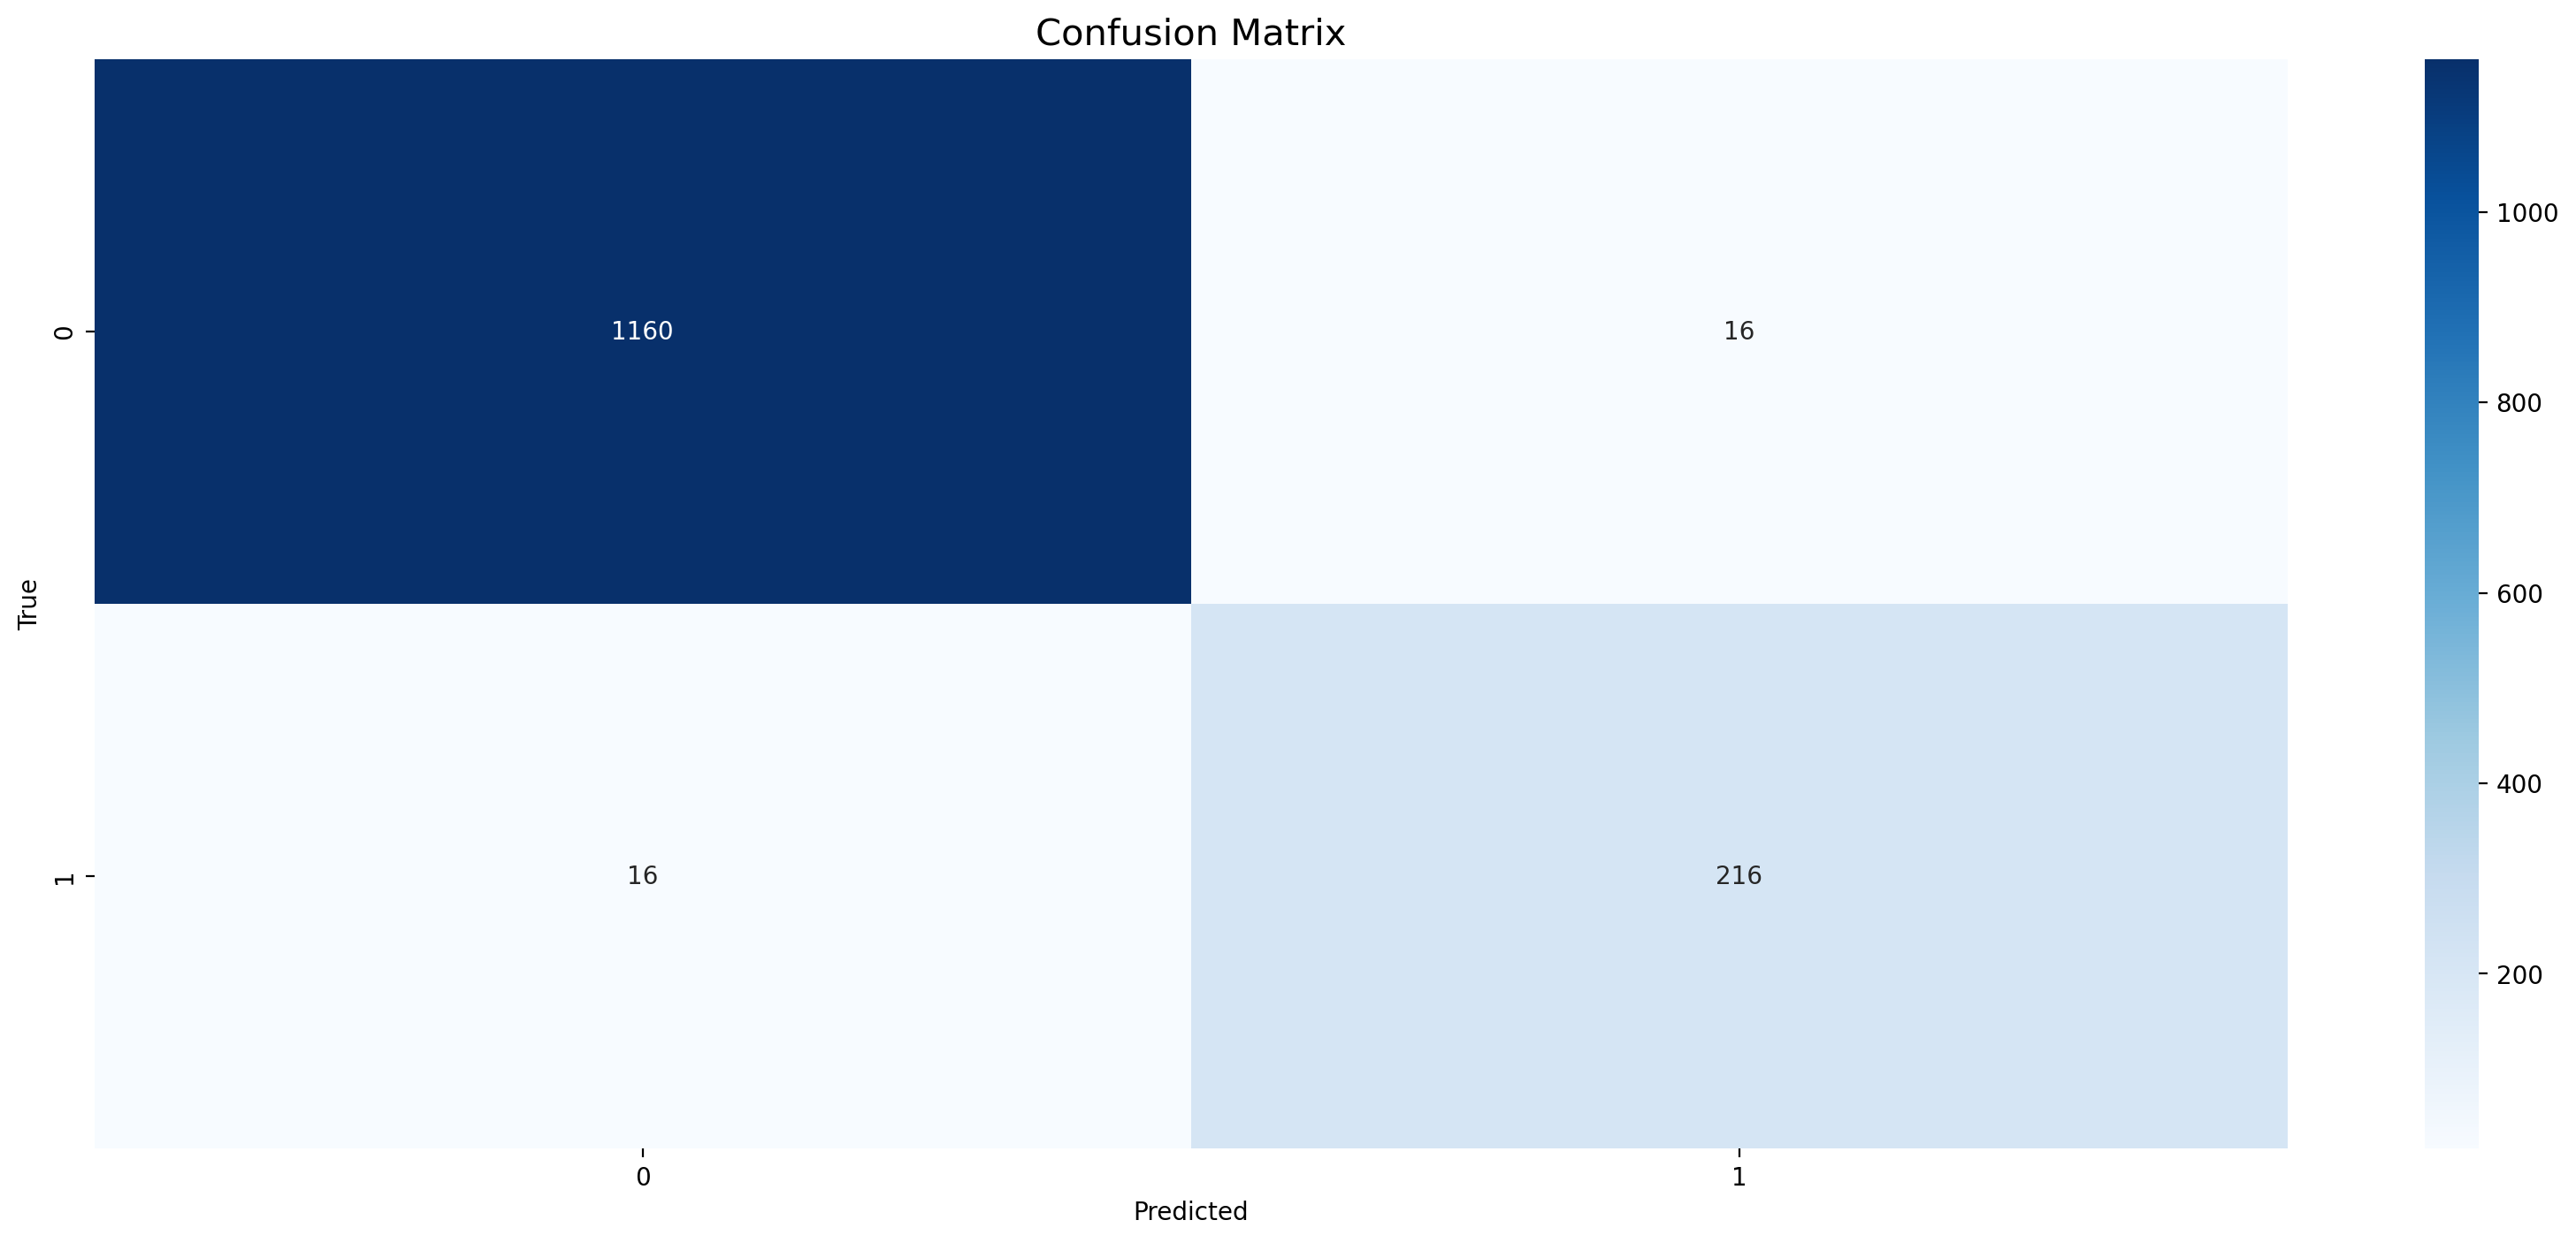

In [109]:
plt.figure(figsize=(20,8), dpi=200)

sns.heatmap(data = svm_cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize=15);

In [110]:
svm_prob = svc.predict_proba(X_test)[:,1]
svmbest_prob = svm_best.predict_proba(X_test)[:,1]

In [111]:
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_prob)
svm_roc_auc = auc(svm_fpr, svm_tpr)

svmbest_fpr, svmbest_tpr, _ = roc_curve(y_test, svmbest_prob)
svmbest_roc_auc = auc(svmbest_fpr, svmbest_tpr)

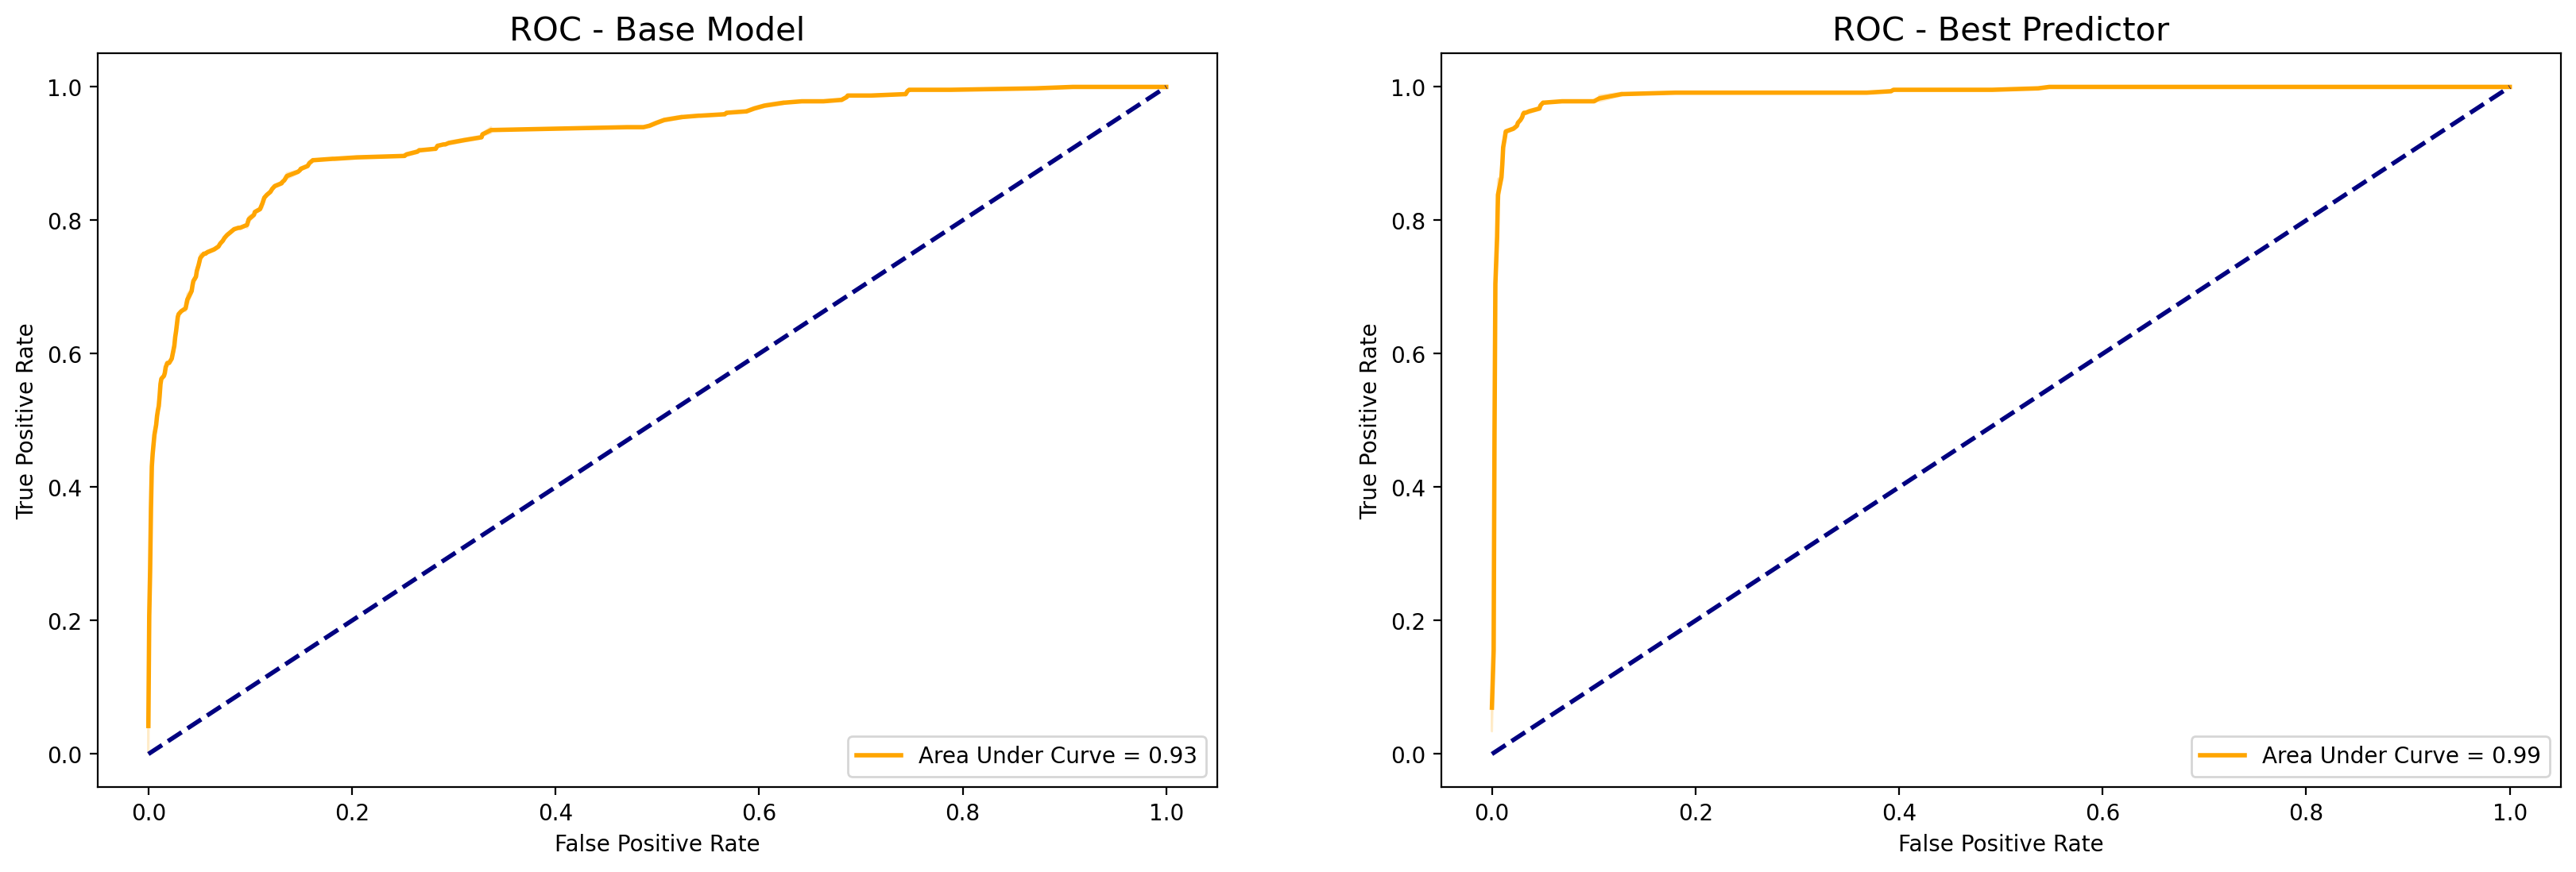

In [112]:
plt.figure(figsize=(20,6), dpi=200)

plt.subplot(1,2,1)
sns.lineplot(x=svm_fpr, y=svm_tpr, label=f'Area Under Curve = {svm_roc_auc:.2f}', color = 'orange', lw=2)
sns.lineplot(x=[0,1], y=[0,1], color='navy', linestyle='dashed', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Base Model', fontsize=15)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
sns.lineplot(x=svmbest_fpr, y=svmbest_tpr, label=f'Area Under Curve = {svmbest_roc_auc:.2f}', color = 'orange', lw=2)
sns.lineplot(x=[0,1], y=[0,1], color='navy', linestyle='dashed', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Best Predictor', fontsize=15)
plt.legend(loc='lower right');

In [113]:
svm_avg_precision = average_precision_score(y_test, svm_prob)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_prob)

svmbest_avg_precision = average_precision_score(y_test, svmbest_prob)
svmbest_precision, svmbest_recall, _ = precision_recall_curve(y_test, svmbest_prob)

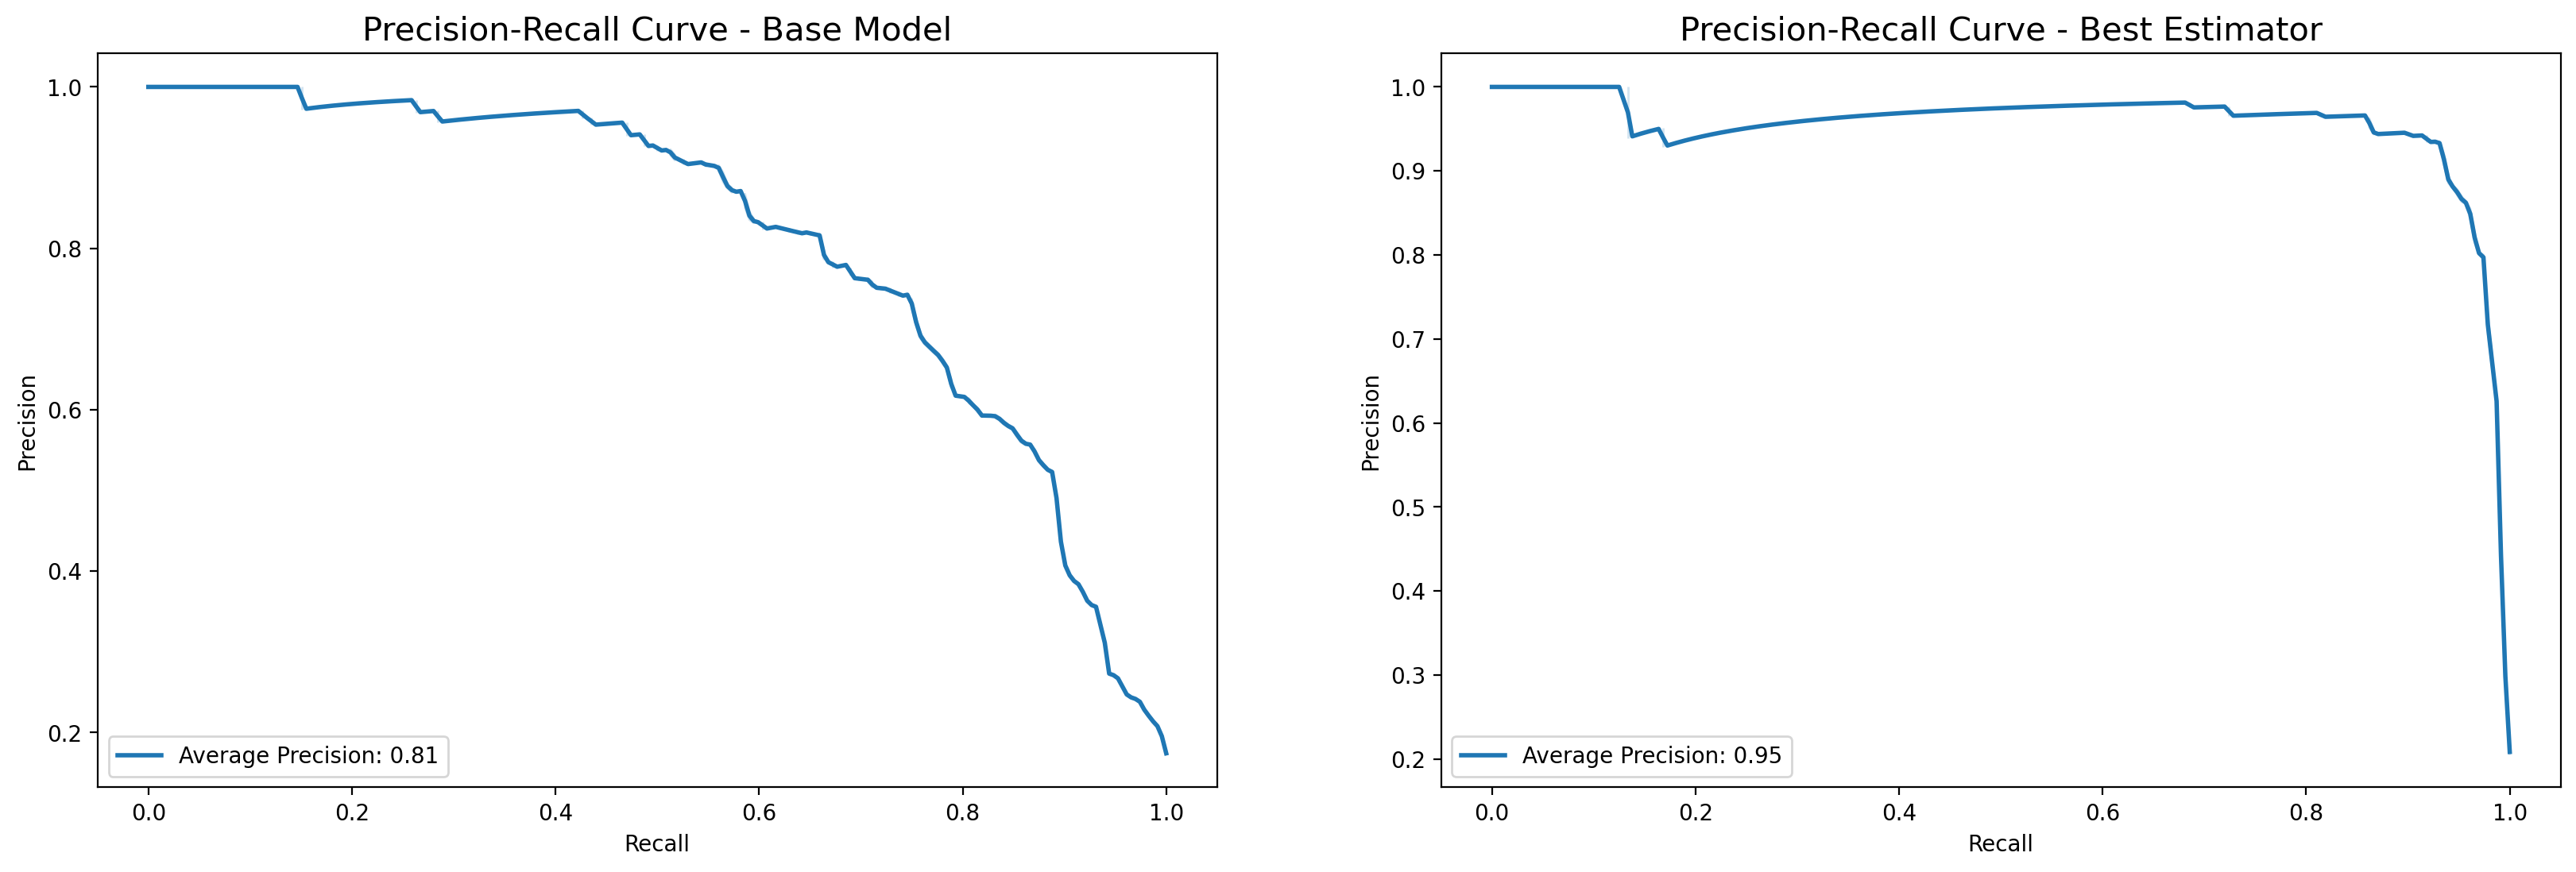

In [114]:
plt.figure(figsize=(20,6), dpi=200)

plt.subplot(1,2,1)
sns.lineplot(x=svm_recall, y=svm_precision, label=f'Average Precision: {svm_avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Base Model', fontsize=15)
plt.legend(loc='lower left')

plt.subplot(1,2,2)
sns.lineplot(x=svmbest_recall, y=svmbest_precision, label=f'Average Precision: {svmbest_avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Best Estimator', fontsize=15)
plt.legend(loc='lower left');

In [115]:
svm_prec = round(precision_score(y_test, svm_best.predict(X_test))*100, 2)
svm_rec = round(recall_score(y_test, svm_best.predict(X_test))*100, 2)

## Gaussian Naive Bayes

In [116]:
gnb = GaussianNB()

In [117]:
gnb.fit(X_train, y_train)

GaussianNB()

In [118]:
gnb_pred = gnb.predict(X_test)

In [119]:
print(f'Testing Score: {round(gnb.score(X_test, y_test)*100,2)}%')
print(f'Training Score: {round(gnb.score(X_train, y_train)*100,2)}%')

Testing Score: 84.45%
Training Score: 84.25%


In [120]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1176
           1       0.53      0.59      0.55       232

    accuracy                           0.84      1408
   macro avg       0.72      0.74      0.73      1408
weighted avg       0.85      0.84      0.85      1408



## Implementing GridSearchCV in Random Forest for Parameter Tuning

In [121]:
gnb_param_grid = {'var_smoothing':[1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

In [122]:
gnb_grid = GridSearchCV(estimator=gnb, param_grid=gnb_param_grid, cv=10, scoring='accuracy', n_jobs=-1)

gnb_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001]},
             scoring='accuracy')

In [123]:
gnb_best_params = gnb_grid.best_params_
gnb_best_score = gnb_grid.best_score_

In [124]:
print(f'Best Parameters: {gnb_best_params}')
print(f'Best Score: {gnb_best_score:.2f}')

Best Parameters: {'var_smoothing': 1e-09}
Best Score: 0.84


In [125]:
gnb_best = gnb_grid.best_estimator_

In [126]:
gnb_pred = gnb_best.predict(X_test)

In [127]:
gnb_cm = confusion_matrix(y_test, gnb_pred)

In [128]:
gnb_cm

array([[1053,  123],
       [  96,  136]], dtype=int64)

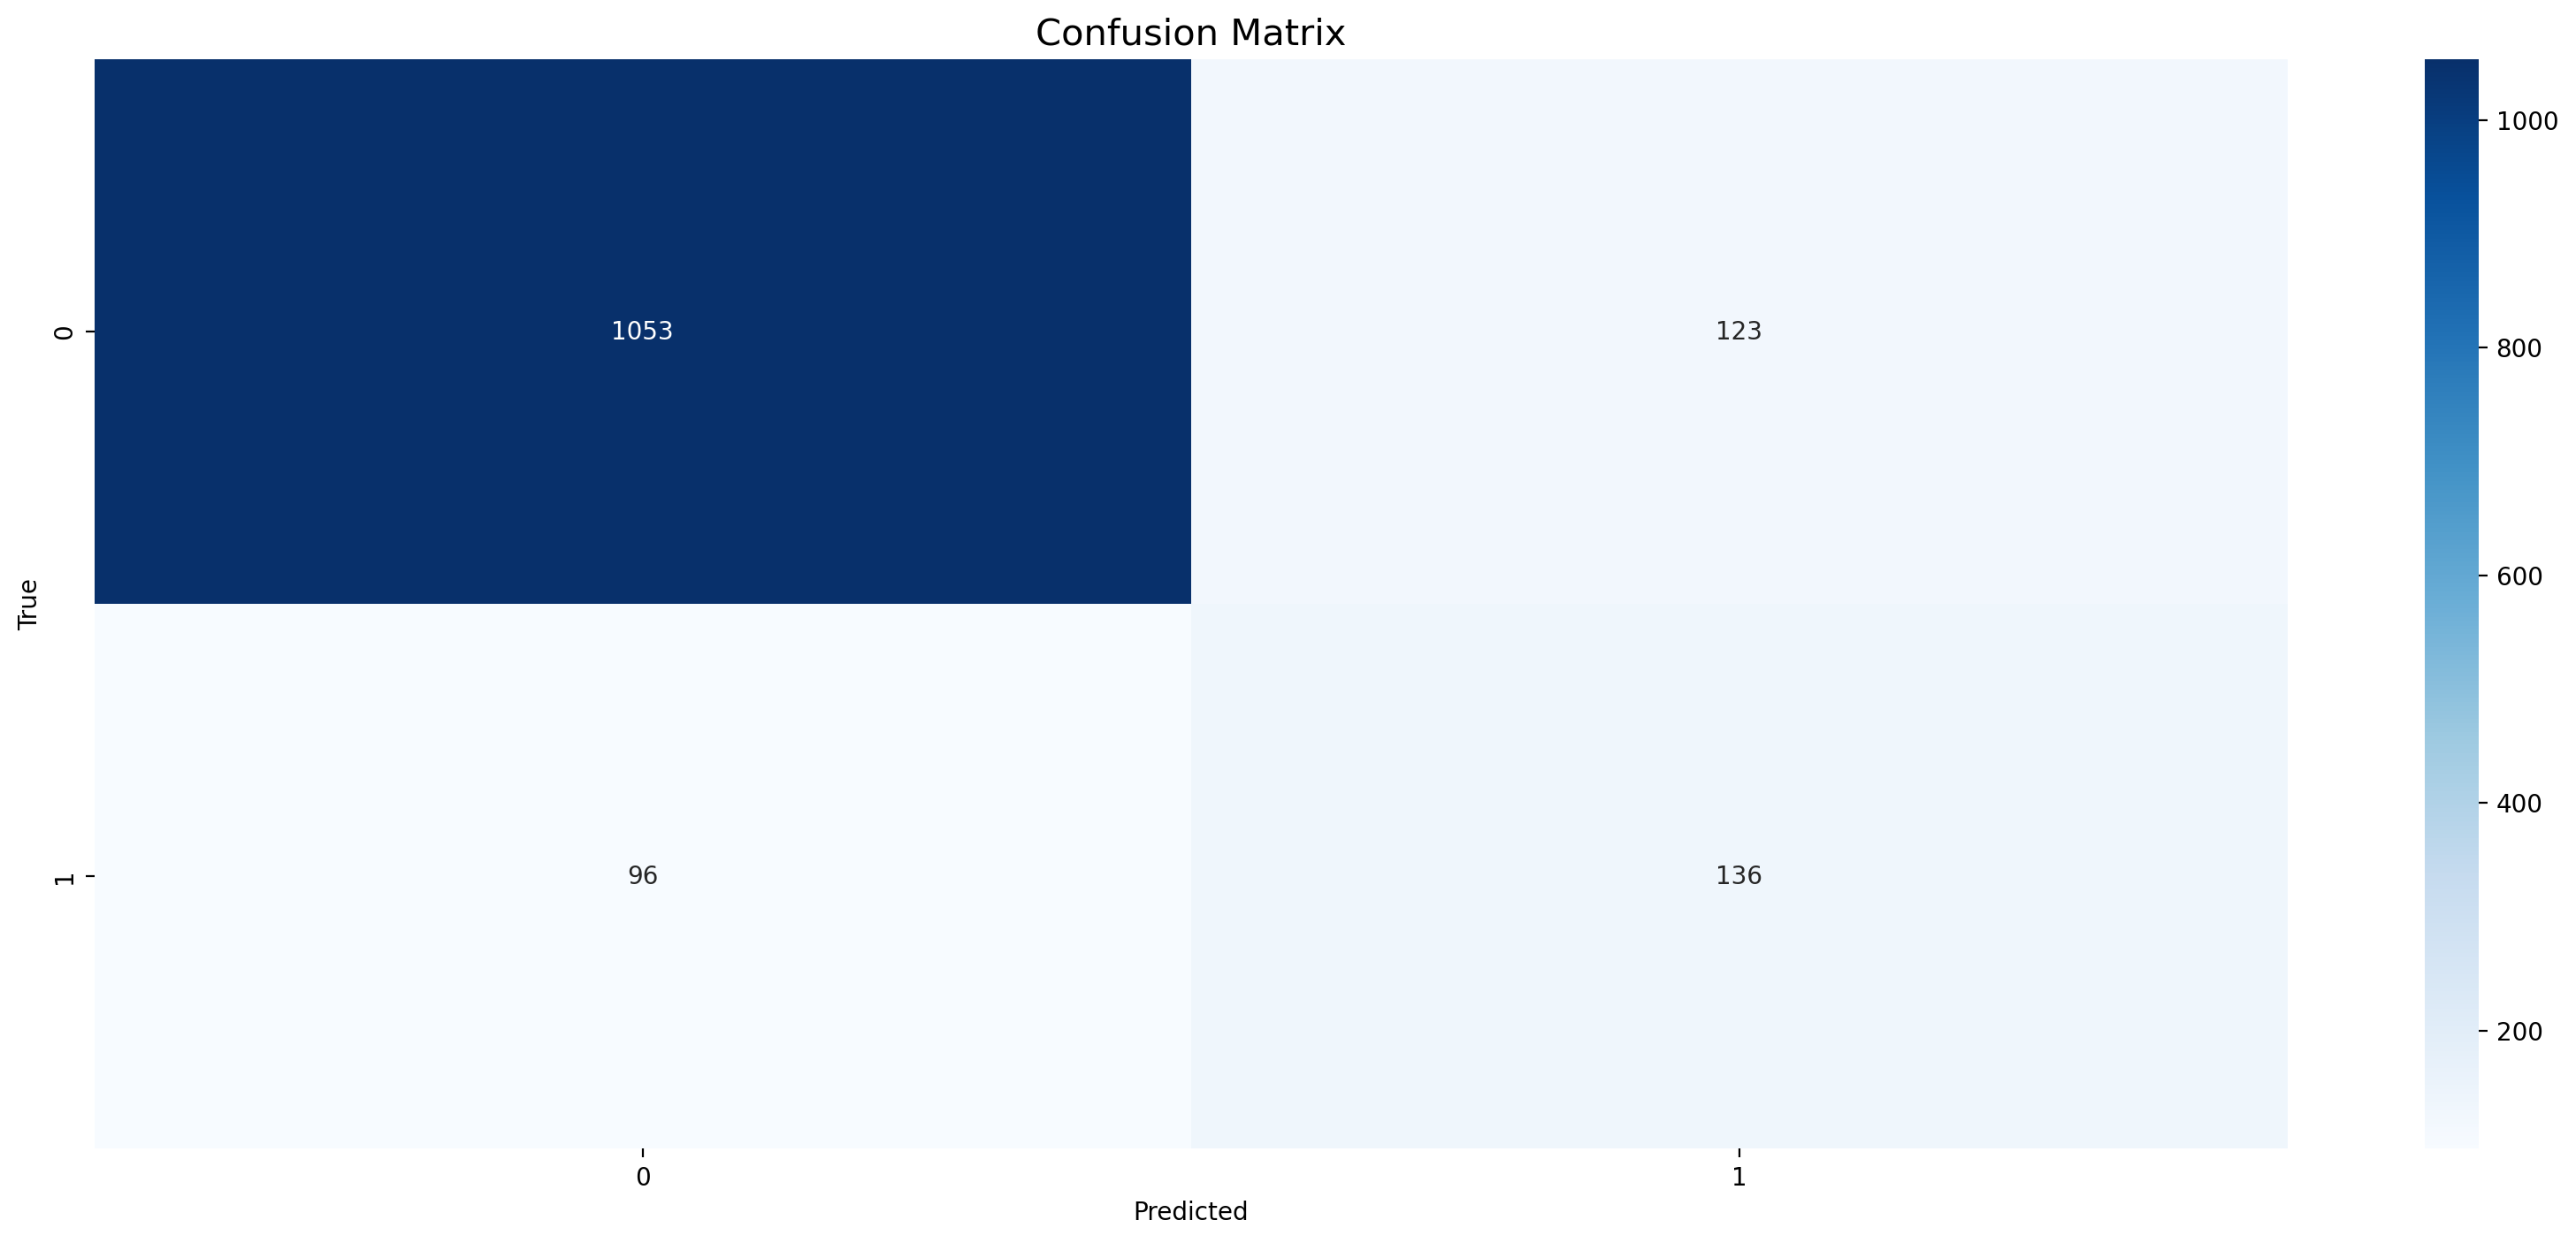

In [129]:
plt.figure(figsize=(20,8), dpi=200)

sns.heatmap(data = gnb_cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize=15);

In [130]:
gnb_prob = gnb.predict_proba(X_test)[:,1]
gnbbest_prob = gnb_best.predict_proba(X_test)[:,1]

In [131]:
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_prob)
gnb_roc_auc = auc(gnb_fpr, gnb_tpr)

gnbbest_fpr, gnbbest_tpr, _ = roc_curve(y_test, gnbbest_prob)
gnbbest_roc_auc = auc(gnbbest_fpr, gnbbest_tpr)

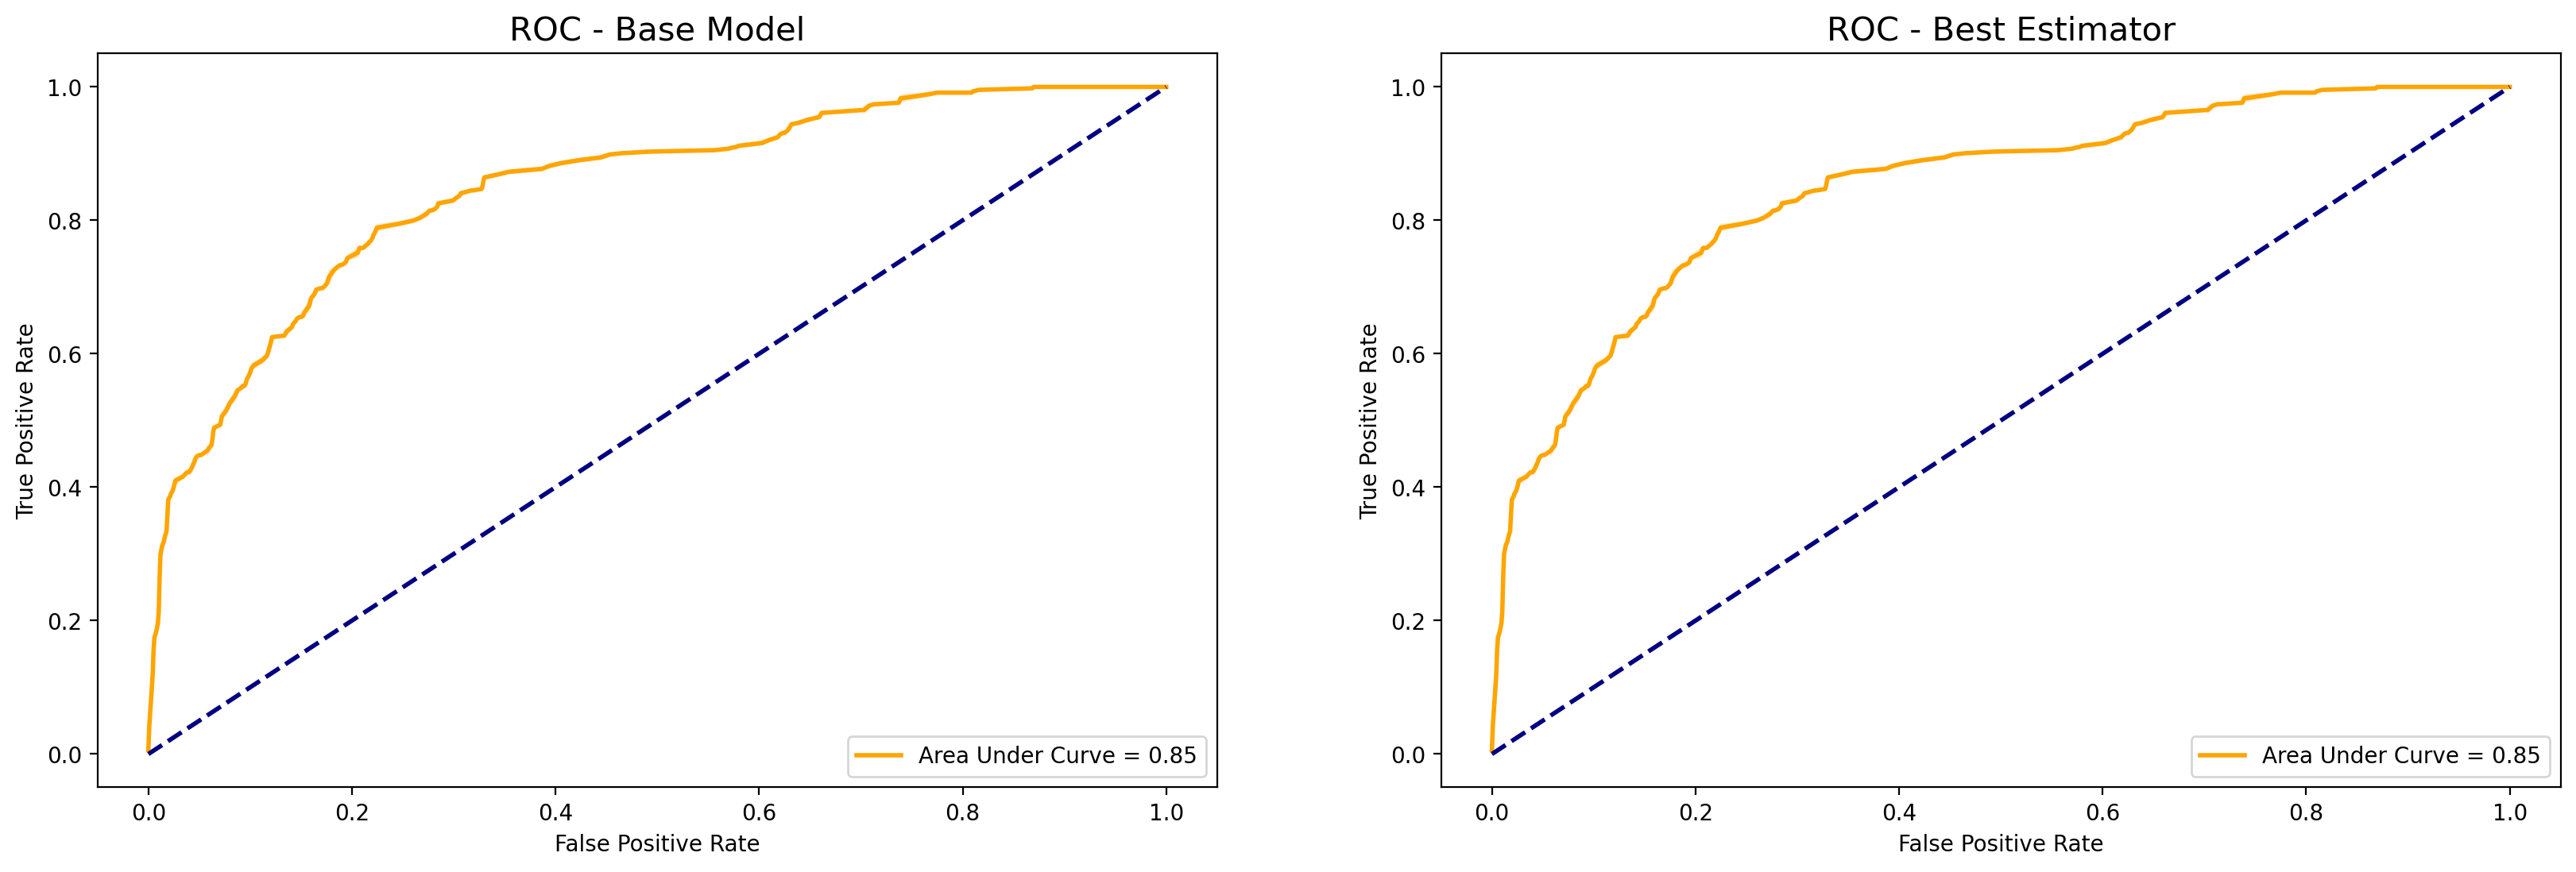

In [132]:
plt.figure(figsize=(20,6), dpi=200)

plt.subplot(1,2,1)
sns.lineplot(x=gnb_fpr, y=gnb_tpr, label=f'Area Under Curve = {gnb_roc_auc:.2f}', color = 'orange', lw=2)
sns.lineplot(x=[0,1], y=[0,1], color='navy', linestyle='dashed', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Base Model', fontsize=15)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
sns.lineplot(x=gnbbest_fpr, y=gnbbest_tpr, label=f'Area Under Curve = {gnbbest_roc_auc:.2f}', color = 'orange', lw=2)
sns.lineplot(x=[0,1], y=[0,1], color='navy', linestyle='dashed', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Best Estimator', fontsize=15)
plt.legend(loc='lower right');

In [133]:
gnb_avg_precision = average_precision_score(y_test, gnb_prob)
gnb_precision, gnb_recall, _ = precision_recall_curve(y_test, gnb_prob)

gnbbest_avg_precision = average_precision_score(y_test, gnbbest_prob)
gnbbest_precision, gnbbest_recall, _ = precision_recall_curve(y_test, gnbbest_prob)

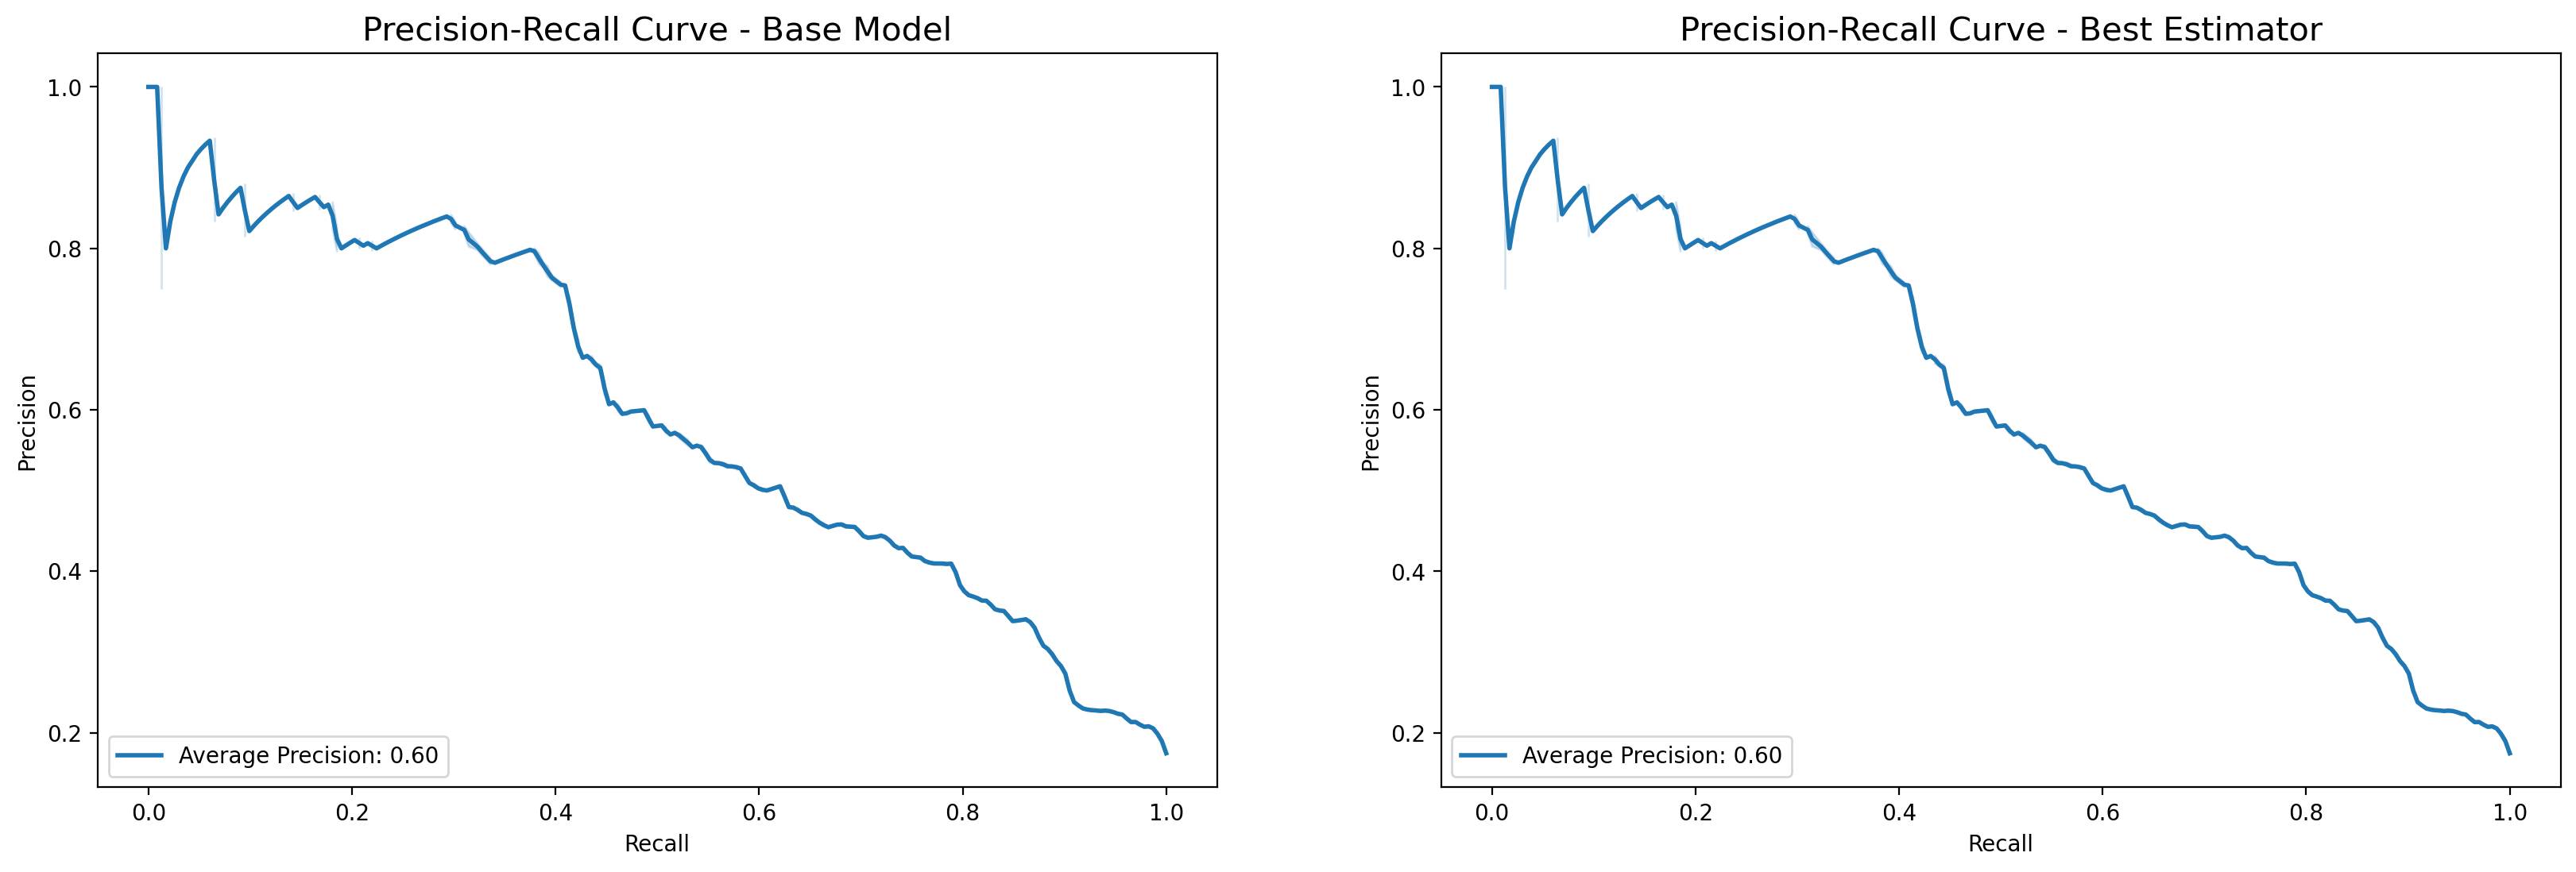

In [134]:
plt.figure(figsize=(20,6), dpi=200)

plt.subplot(1,2,1)
sns.lineplot(x=gnb_recall, y=gnb_precision, label=f'Average Precision: {gnb_avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Base Model', fontsize=15)
plt.legend(loc='lower left')

plt.subplot(1,2,2)
sns.lineplot(x=gnbbest_recall, y=gnbbest_precision, label=f'Average Precision: {gnbbest_avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Best Estimator', fontsize=15)
plt.legend(loc='lower left');

In [135]:
gnb_prec = round(precision_score(y_test, gnb_best.predict(X_test))*100, 2)
gnb_rec = round(recall_score(y_test, gnb_best.predict(X_test))*100, 2)

# Ensemble Learning

## Random Forest

In [136]:
rfc = RandomForestClassifier(n_estimators=20, n_jobs=-1, verbose=3, random_state=1)

In [137]:
rfc.fit(X_train, y_train)

building tree 1 of 20building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20

building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=1, verbose=3)

In [138]:
rfc_pred = rfc.predict(X_test)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  17 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    0.0s finished


In [139]:
print(f'Testing Score: {round(rfc.score(X_test, y_test)*100,2)}%')
print(f'Training Score: {round(rfc.score(X_train, y_train)*100,2)}%')

Testing Score: 96.02%
Training Score: 99.98%


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  17 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  17 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    0.0s finished


In [140]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1176
           1       0.94      0.81      0.87       232

    accuracy                           0.96      1408
   macro avg       0.95      0.90      0.92      1408
weighted avg       0.96      0.96      0.96      1408



## Implementing GridSearchCV in Random Forest for Parameter Tuning

In [141]:
rf_param_grid = {'n_estimators':[10,50,100,200],
                'max_depth':[None,10,20,30],
                'min_samples_split':[2,5,10,20],
                'min_samples_leaf':[1,2,4,8],
                'bootstrap':[True,False]}

rf_grid = GridSearchCV(estimator=rfc, param_grid=rf_param_grid, cv=10, verbose=3, n_jobs=-1)

rf_grid.fit(X_train, y_train)

rf_best_params = rf_grid.best_params_
rf_best_score = rf_grid.best_score_

Fitting 10 folds for each of 512 candidates, totalling 5120 fits
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [142]:
print(f'Best Parameters: {rf_best_params}')
print(f'Best Score: {rf_best_score:.2f}')

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.96


In [143]:
rf_best = rf_grid.best_estimator_

In [144]:
rf_pred = rf_best.predict(X_test)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


In [145]:
rf_cm = confusion_matrix(y_test, rf_pred)

In [146]:
print(rf_cm)

[[1165   11]
 [  25  207]]


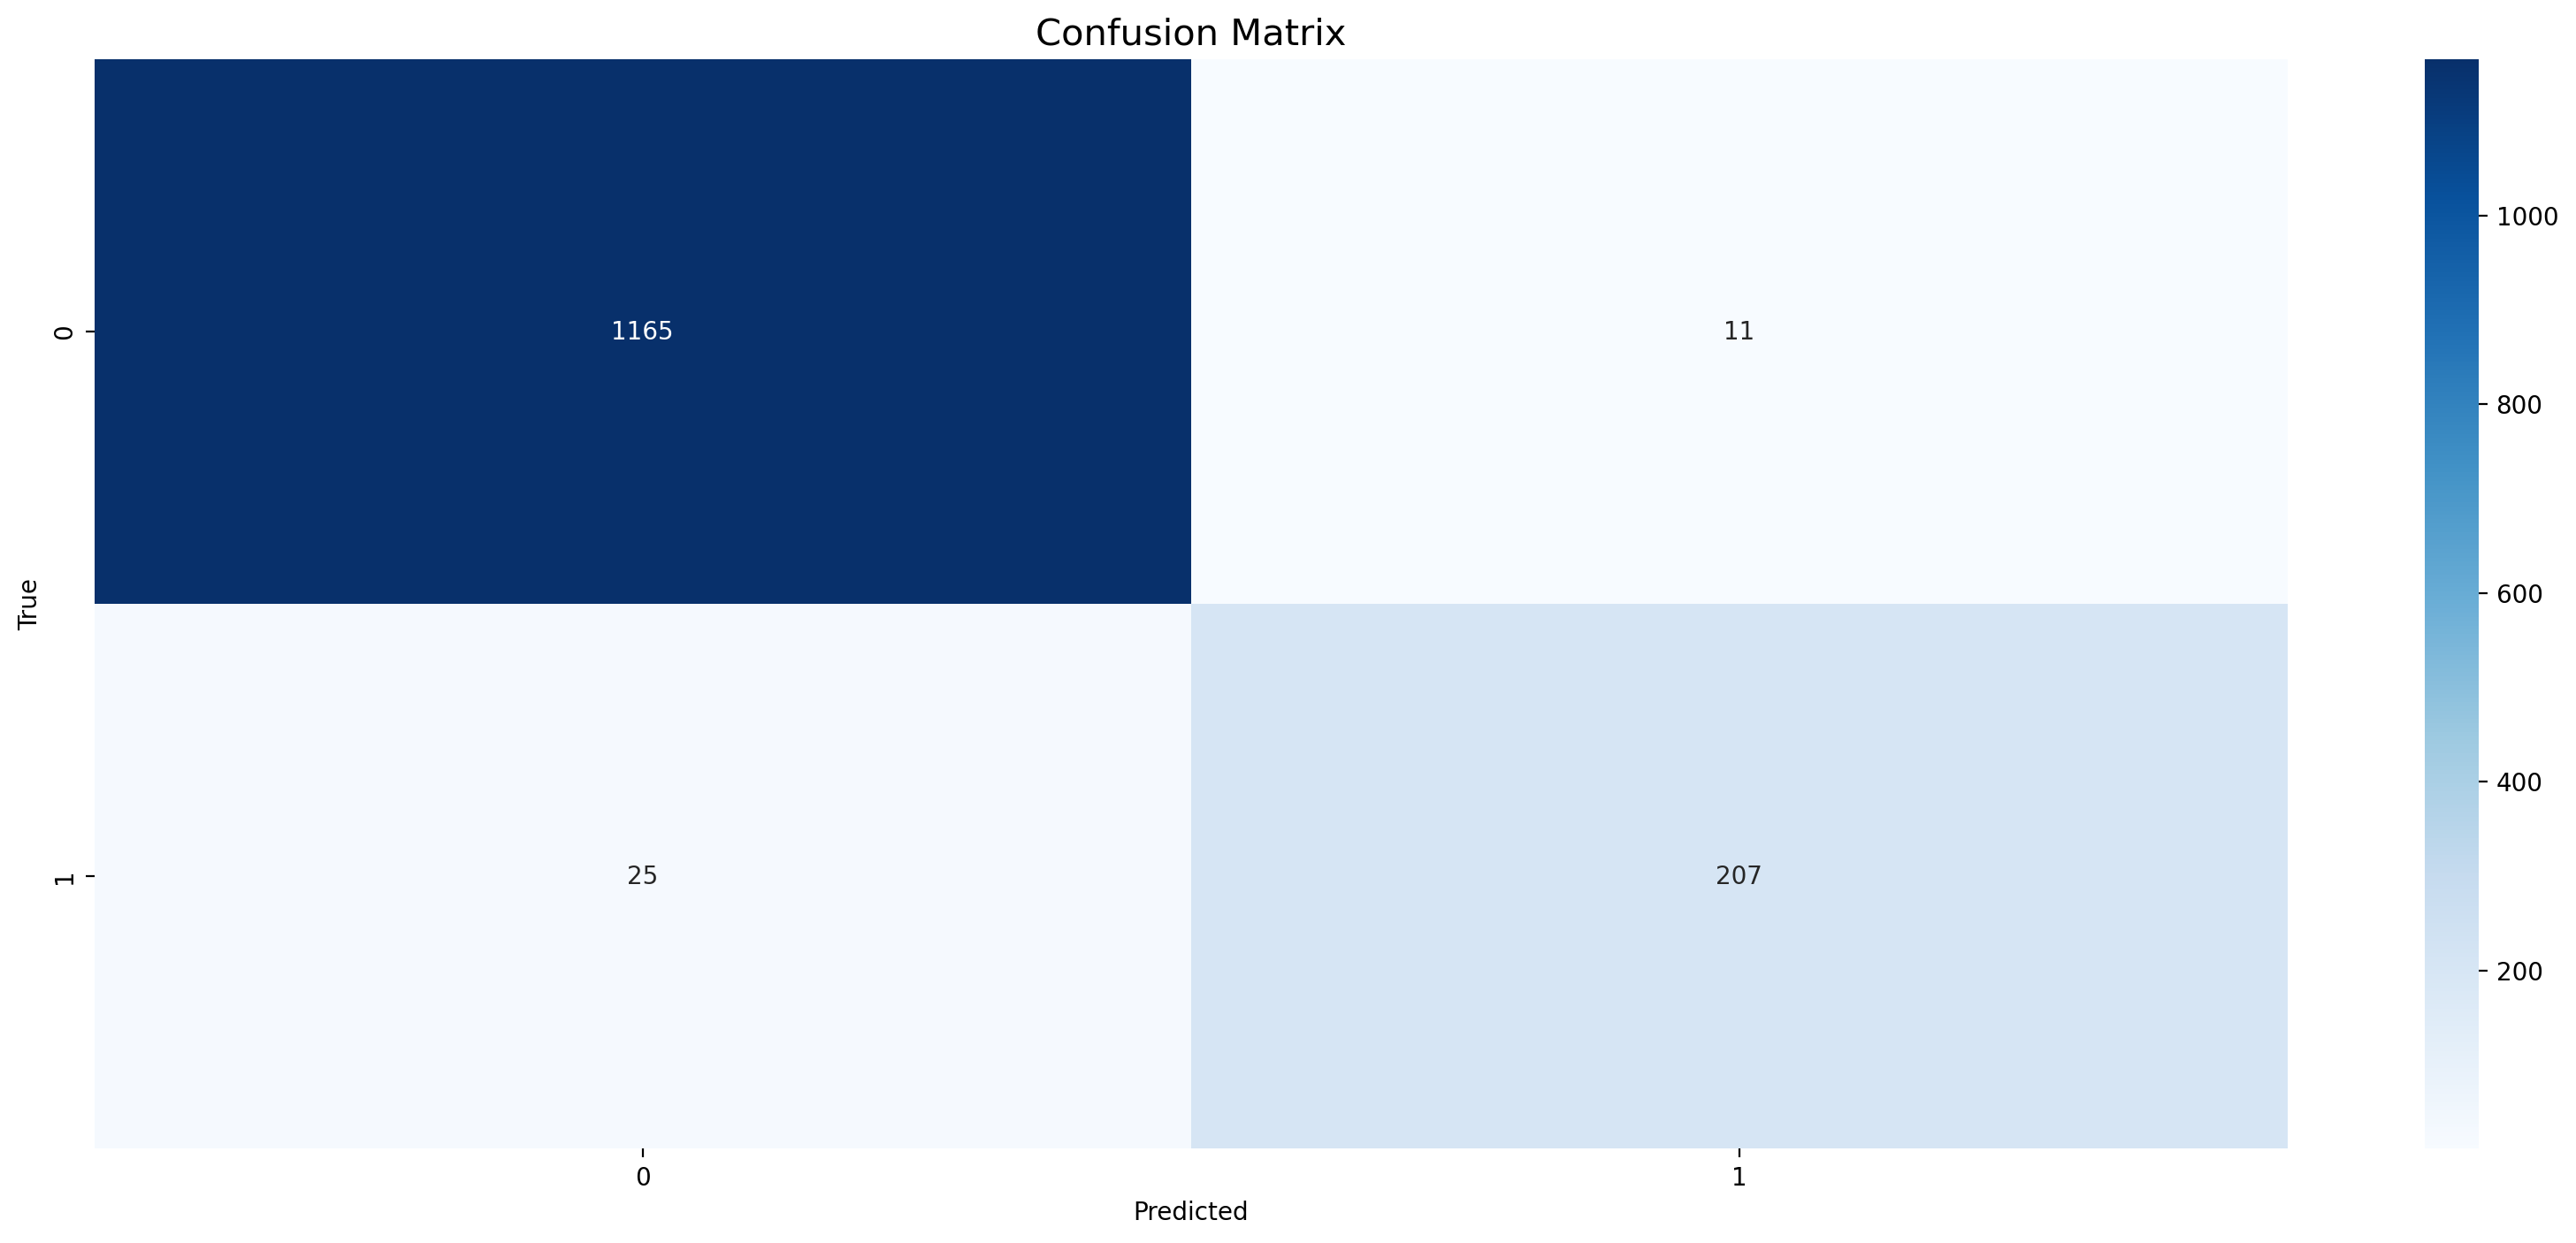

In [147]:
plt.figure(figsize=(20,8), dpi=200)

sns.heatmap(data = rf_cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize=15);

In [148]:
rf_prob = rfc.predict_proba(X_test)[:,1]
rfbest_prob = rfc.predict_proba(X_test)[:,1]

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  17 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  17 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    0.0s finished


In [149]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
rf_roc_auc = auc(rf_fpr, rf_tpr)

rfbest_fpr, rfbest_tpr, _ = roc_curve(y_test, rfbest_prob)
rfbest_roc_auc = auc(rfbest_fpr, rfbest_tpr)

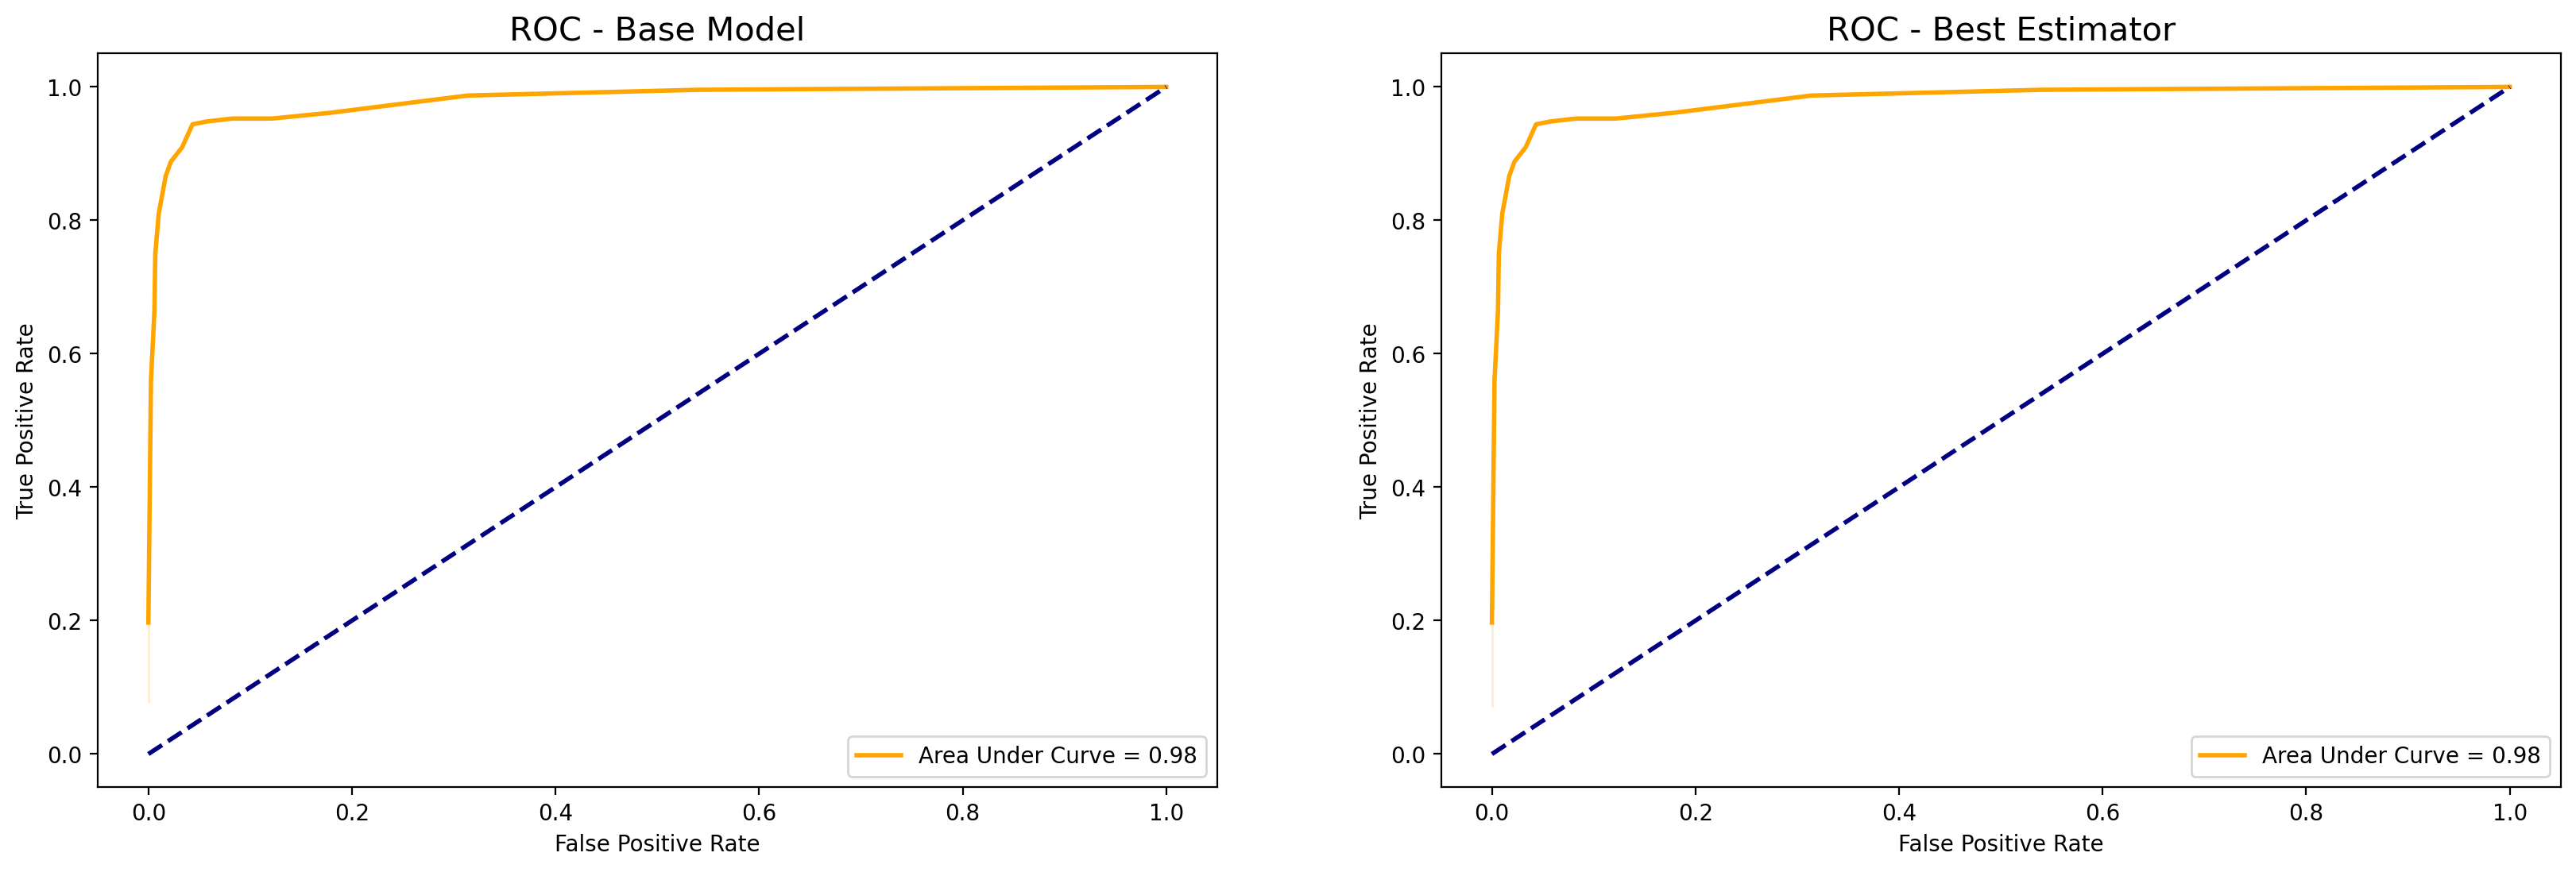

In [150]:
plt.figure(figsize=(20,6), dpi=200)

plt.subplot(1,2,1)
sns.lineplot(x=rf_fpr, y=rf_tpr, label=f'Area Under Curve = {rf_roc_auc:.2f}', color = 'orange', lw=2)
sns.lineplot(x=[0,1], y=[0,1], color='navy', linestyle='dashed', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Base Model', fontsize=15)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
sns.lineplot(x=rfbest_fpr, y=rfbest_tpr, label=f'Area Under Curve = {rfbest_roc_auc:.2f}', color = 'orange', lw=2)
sns.lineplot(x=[0,1], y=[0,1], color='navy', linestyle='dashed', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Best Estimator', fontsize=15)
plt.legend(loc='lower right');

In [151]:
rf_avg_precision = average_precision_score(y_test, rf_prob)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_prob)

rfbest_avg_precision = average_precision_score(y_test, rfbest_prob)
rfbest_precision, rfbest_recall, _ = precision_recall_curve(y_test, rfbest_prob)

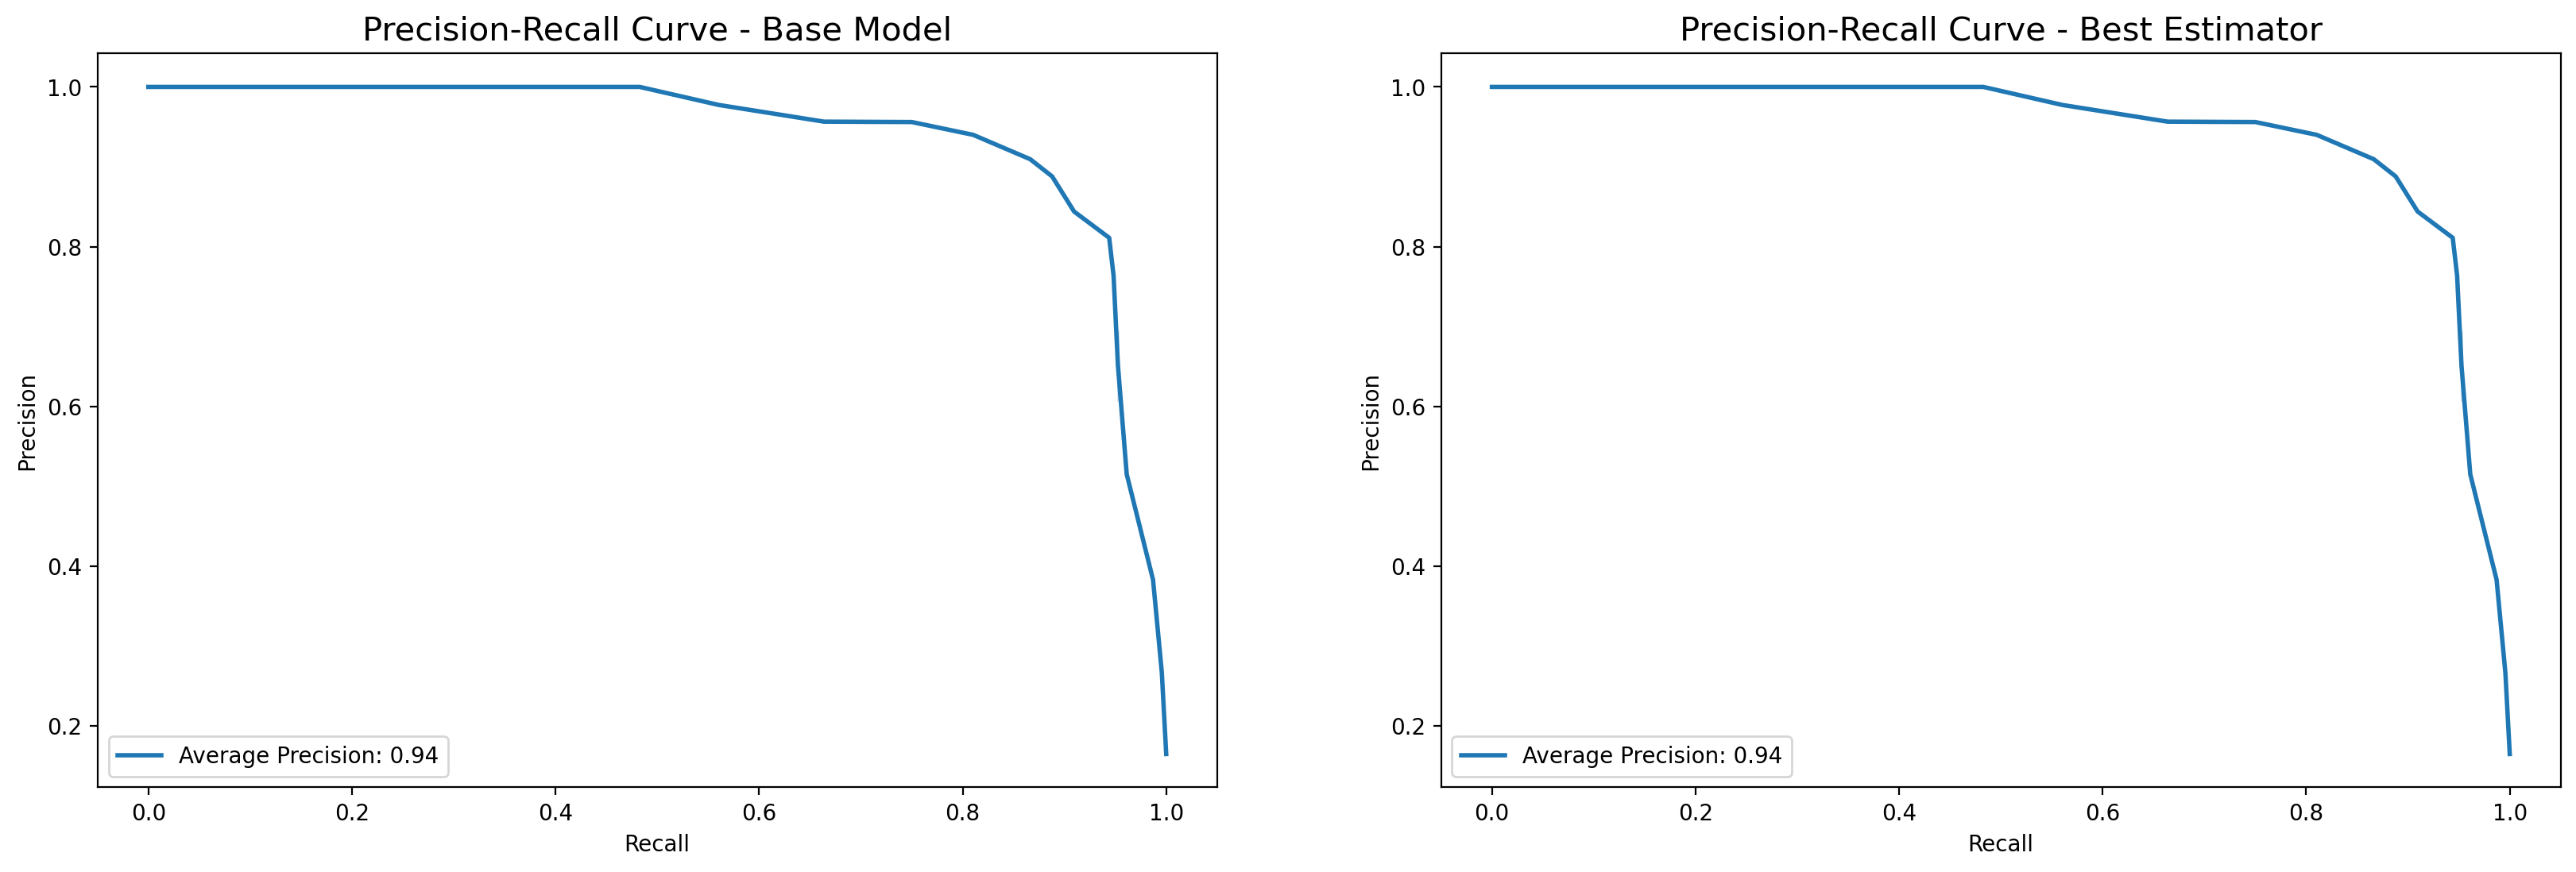

In [152]:
plt.figure(figsize=(20,6), dpi=200)

plt.subplot(1,2,1)
sns.lineplot(x=rf_recall, y=rf_precision, label=f'Average Precision: {rf_avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Base Model', fontsize=15)
plt.legend(loc='lower left')

plt.subplot(1,2,2)
sns.lineplot(x=rfbest_recall, y=rfbest_precision, label=f'Average Precision: {rfbest_avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Best Estimator', fontsize=15)
plt.legend(loc='lower left');

In [153]:
rf_prec = round(precision_score(y_test, rf_best.predict(X_test))*100, 2)
rf_rec = round(recall_score(y_test, rf_best.predict(X_test))*100, 2)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


## Gradient Boosting

In [154]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=1)

gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

In [155]:
print(f'Testing Score: {round(gbc.score(X_test, y_test)*100,2)}%')
print(f'Training Score: {round(gbc.score(X_train, y_train)*100,2)}%')

Testing Score: 95.6%
Training Score: 98.39%


In [156]:
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1176
           1       0.92      0.80      0.86       232

    accuracy                           0.96      1408
   macro avg       0.94      0.89      0.92      1408
weighted avg       0.96      0.96      0.95      1408



## Implementing GridSearchCV in Gradient Boosting for Parameter Tuning

In [157]:
gbc_param_grid = {'n_estimators':[50,100,200],
                 'learning_rate':[0.001,0.01,0.1,0.2],
                 'max_depth':[3,5,7],
                 'min_samples_split':[2,5,10]}

gbc_grid = GridSearchCV(estimator = gbc, param_grid = gbc_param_grid, cv=10, scoring = 'accuracy', n_jobs = -1)

gbc_grid.fit(X_train, y_train)

gbc_best_params = gbc_grid.best_params_
gbc_best_score = gbc_grid.best_score_

In [158]:
print(f'Best Parameters: {gbc_best_params}')
print(f'Best Score: {gbc_best_score:.2f}')

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.97


In [159]:
gbc_best = gbc_grid.best_estimator_

In [160]:
gbc_pred = gbc_best.predict(X_test)

In [161]:
gbc_cm = confusion_matrix(y_test, gbc_pred)

In [162]:
print(gbc_cm)

[[1171    5]
 [  20  212]]


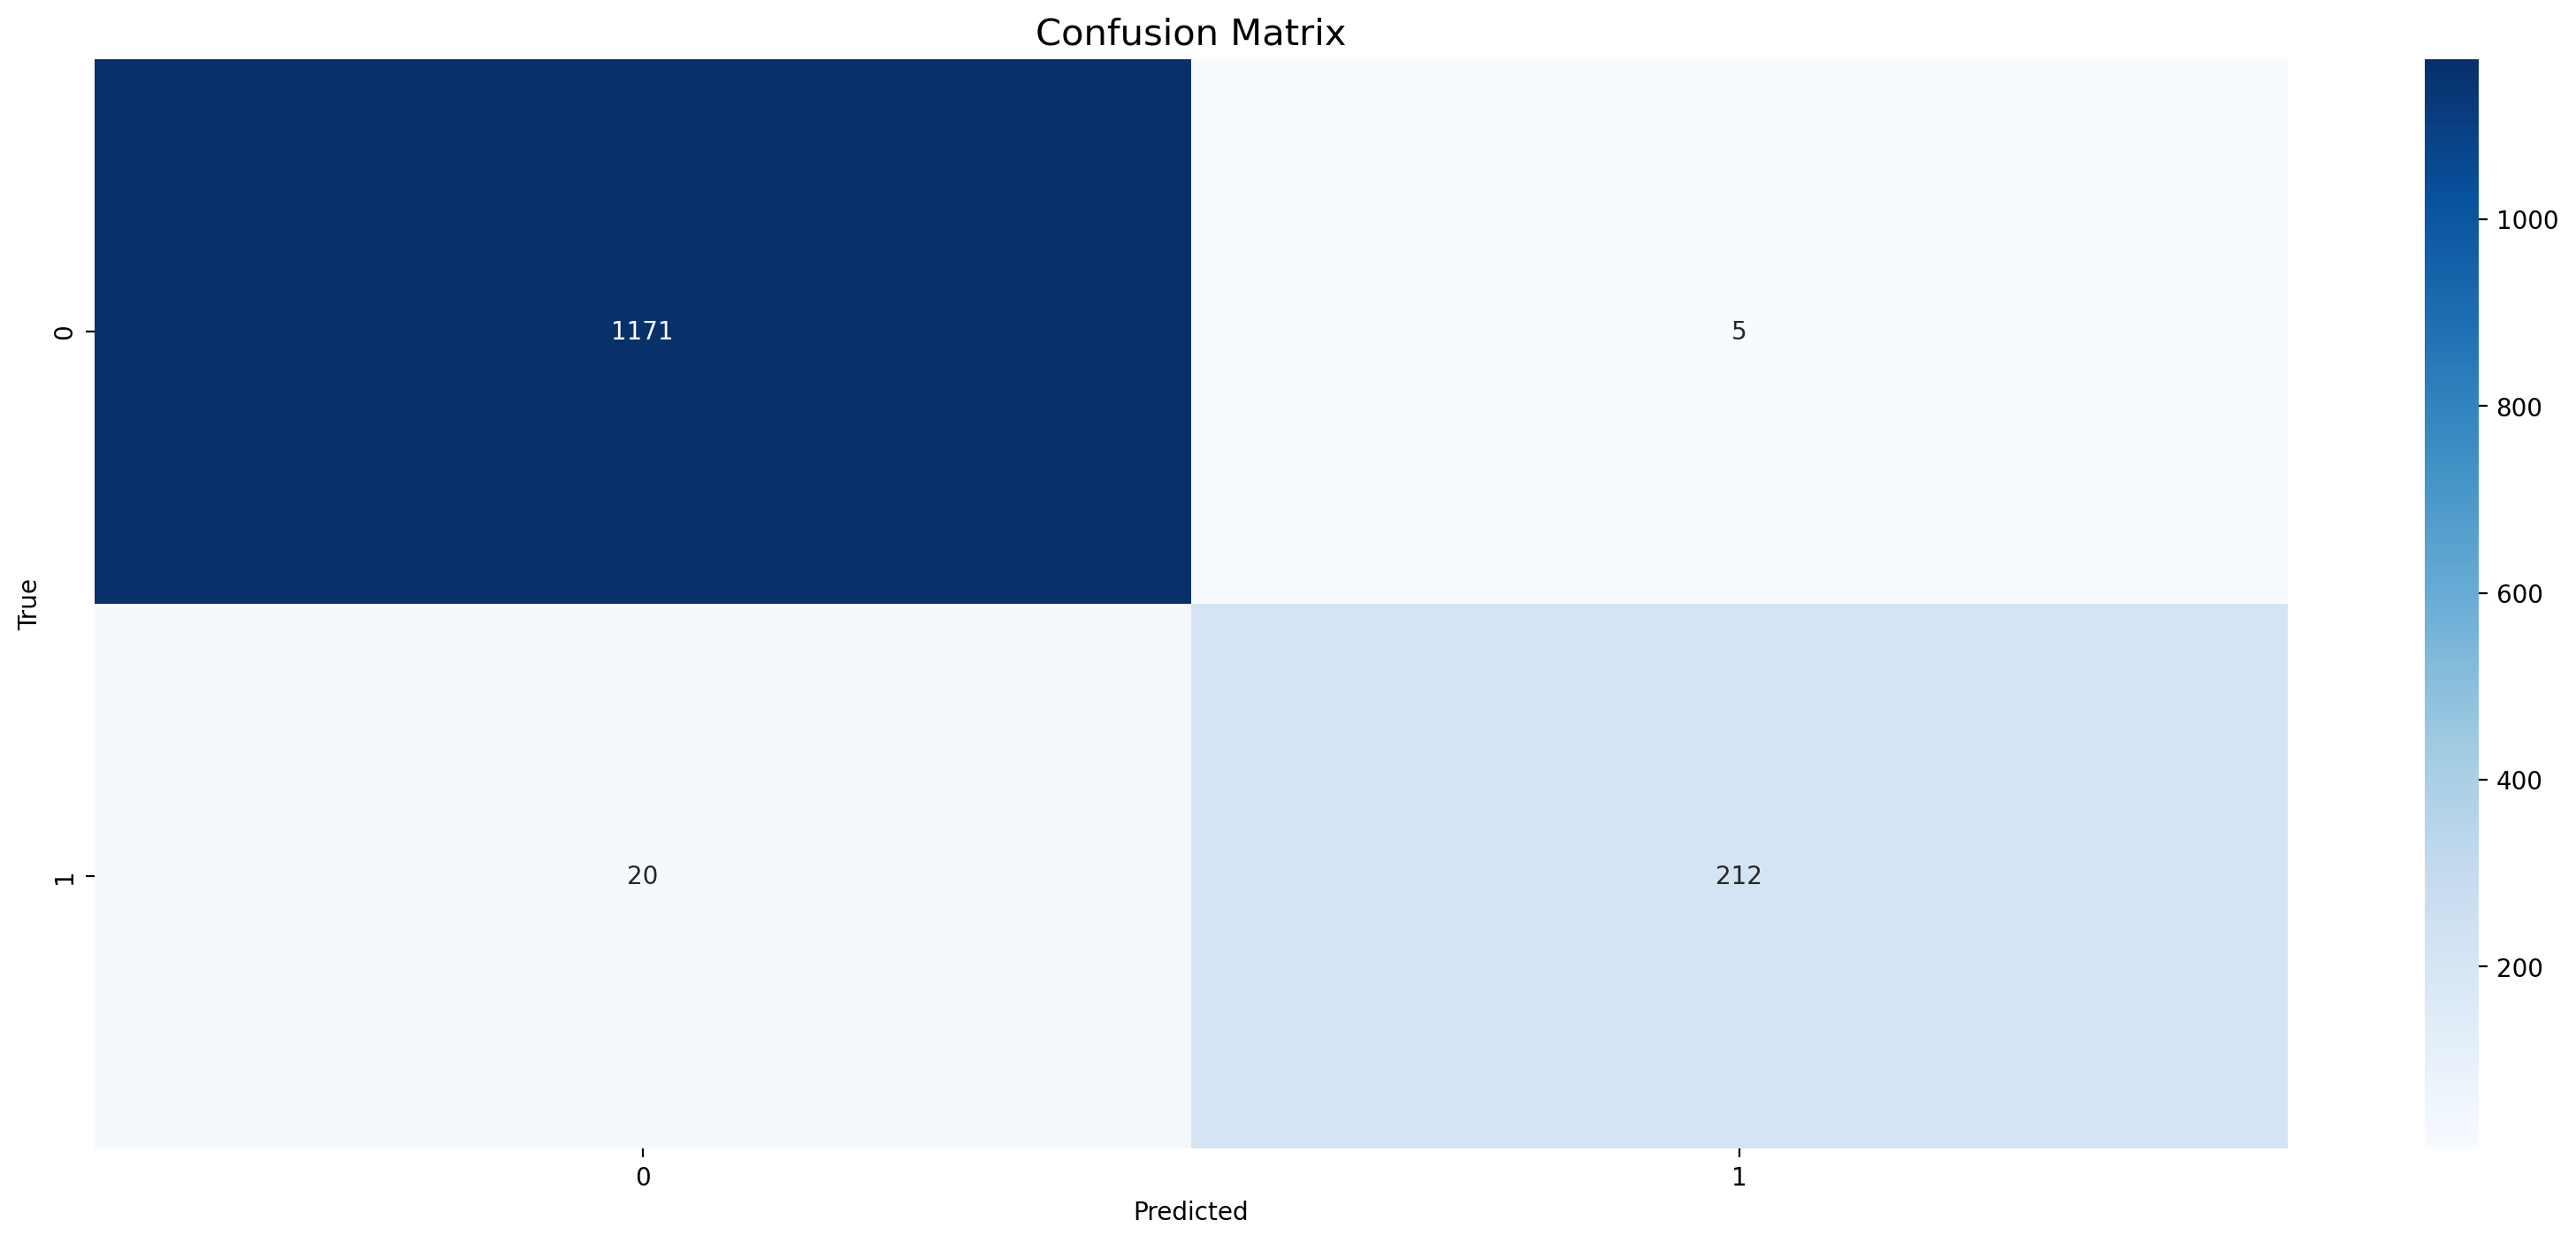

In [163]:
plt.figure(figsize=(20,8), dpi=200)

sns.heatmap(data = gbc_cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize=15);

In [164]:
gbc_prob = gbc.predict_proba(X_test)[:,1]
gbcbest_prob = gbc_best.predict_proba(X_test)[:,1]

In [165]:
gbc_fpr, gbc_tpr, _ = roc_curve(y_test, gbc_prob)
gbc_roc_auc = auc(gbc_fpr, gbc_tpr)

gbcbest_fpr, gbcbest_tpr, _ = roc_curve(y_test, gbcbest_prob)
gbcbest_roc_auc = auc(gbcbest_fpr, gbcbest_tpr)

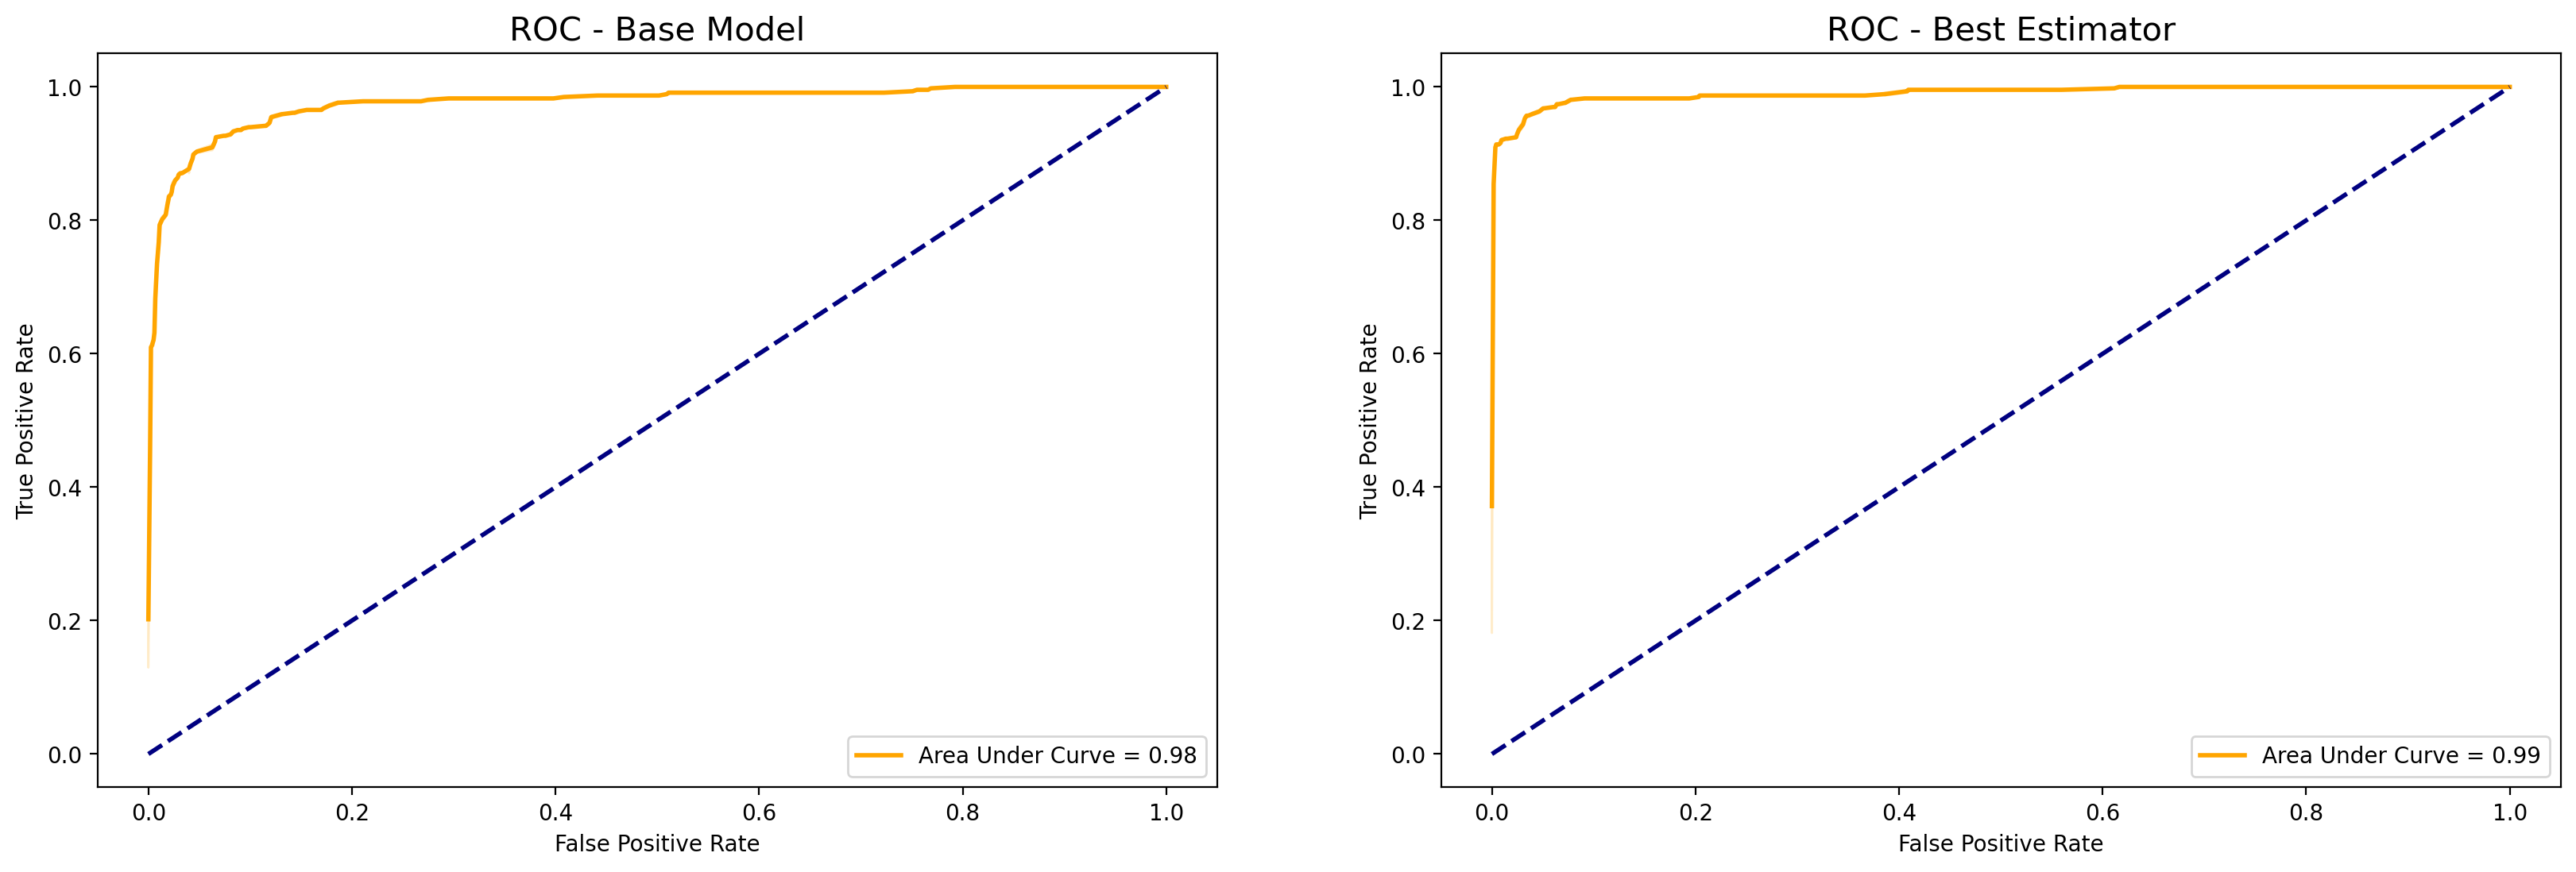

In [166]:
plt.figure(figsize=(20,6), dpi=200)

plt.subplot(1,2,1)
sns.lineplot(x=gbc_fpr, y=gbc_tpr, label=f'Area Under Curve = {gbc_roc_auc:.2f}', color = 'orange', lw=2)
sns.lineplot(x=[0,1], y=[0,1], color='navy', linestyle='dashed', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Base Model', fontsize=15)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
sns.lineplot(x=gbcbest_fpr, y=gbcbest_tpr, label=f'Area Under Curve = {gbcbest_roc_auc:.2f}', color = 'orange', lw=2)
sns.lineplot(x=[0,1], y=[0,1], color='navy', linestyle='dashed', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Best Estimator', fontsize=15)
plt.legend(loc='lower right');

In [167]:
gbc_avg_precision = average_precision_score(y_test, gbc_prob)
gbc_precision, gbc_recall, _ = precision_recall_curve(y_test, gbc_prob)

gbcbest_avg_precision = average_precision_score(y_test, gbcbest_prob)
gbcbest_precision, gbcbest_recall, _ = precision_recall_curve(y_test, gbcbest_prob)

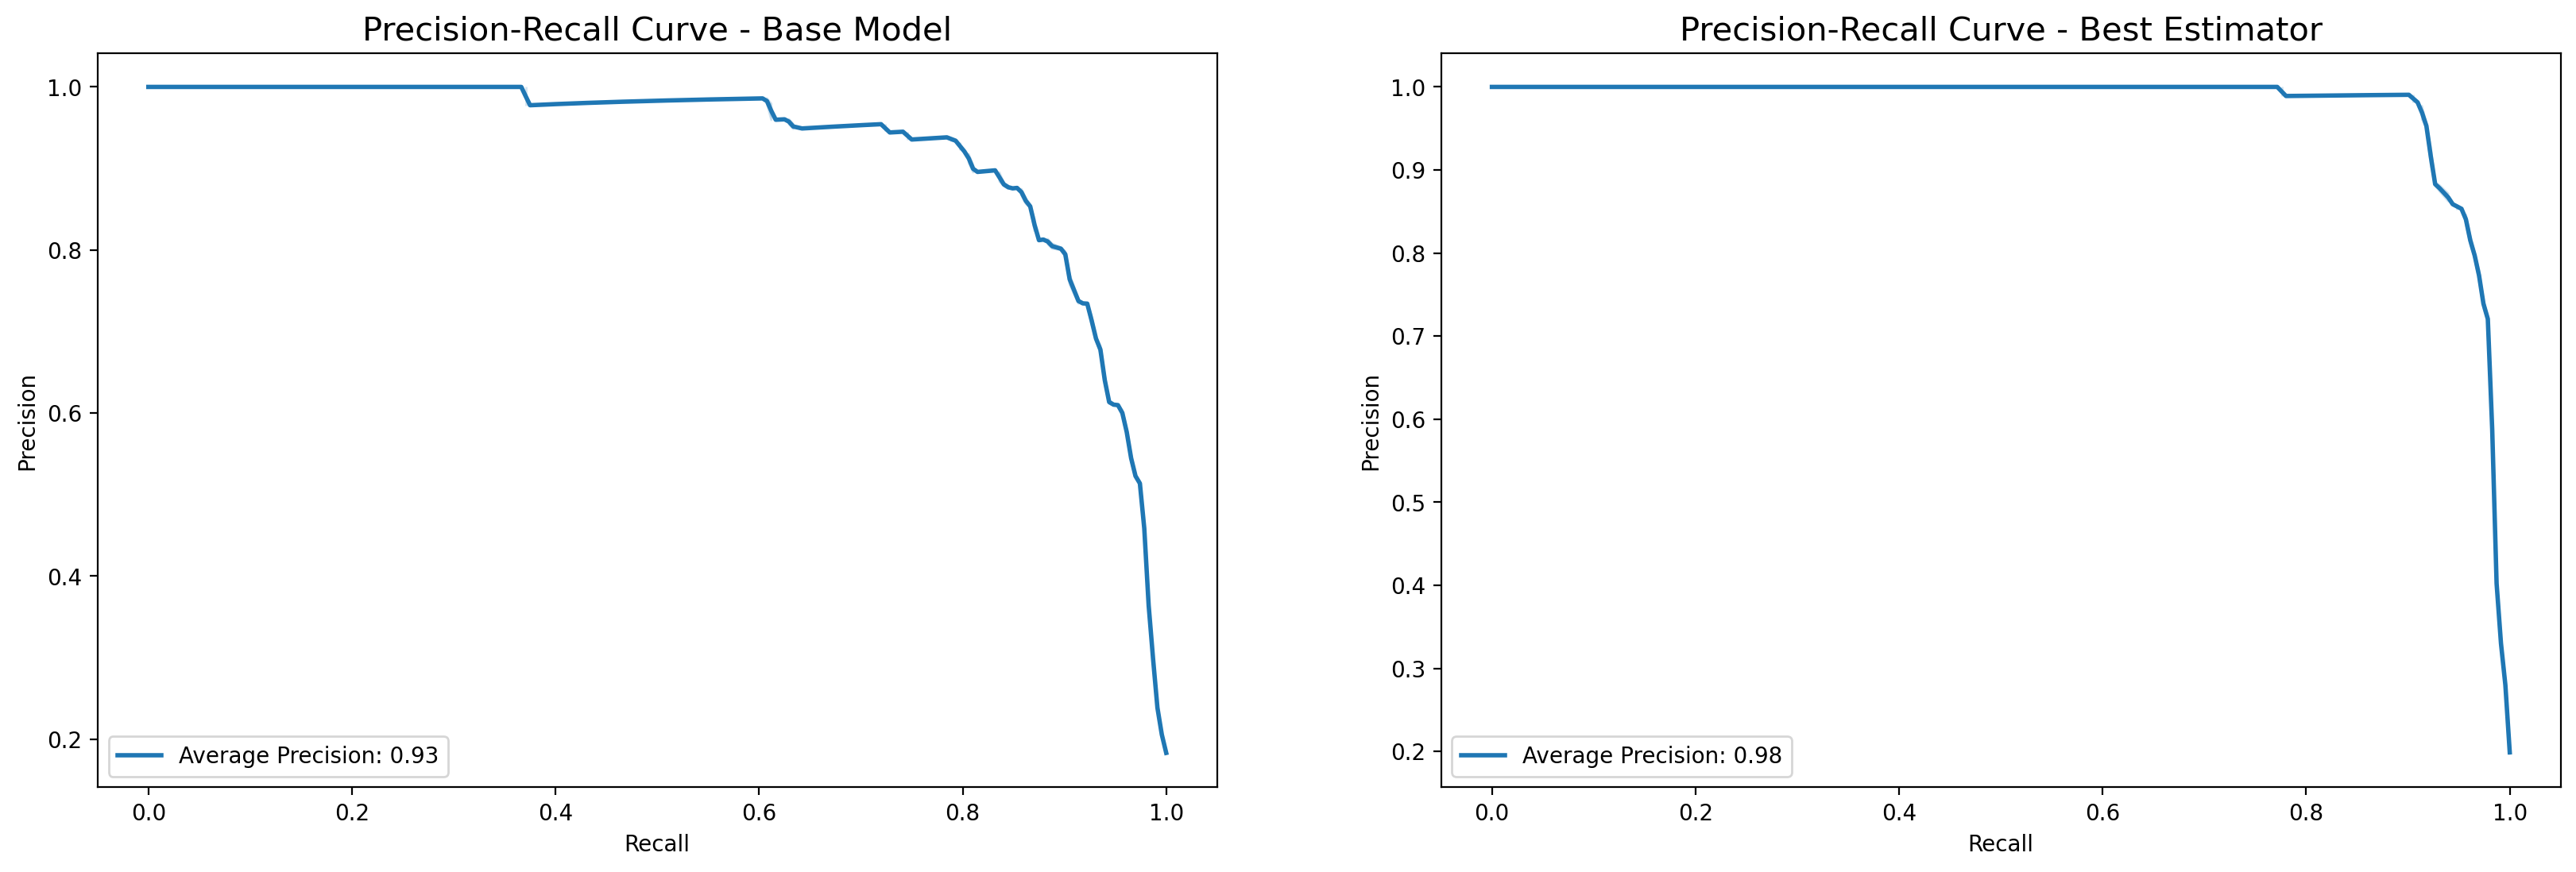

In [168]:
plt.figure(figsize=(20,6), dpi=200)

plt.subplot(1,2,1)
sns.lineplot(x=gbc_recall, y=gbc_precision, label=f'Average Precision: {gbc_avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Base Model', fontsize=15)
plt.legend(loc='lower left')

plt.subplot(1,2,2)
sns.lineplot(x=gbcbest_recall, y=gbcbest_precision, label=f'Average Precision: {gbcbest_avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Best Estimator', fontsize=15)
plt.legend(loc='lower left');

In [169]:
gbc_prec = round(precision_score(y_test, gbc_best.predict(X_test))*100, 2)
gbc_rec = round(recall_score(y_test, gbc_best.predict(X_test))*100, 2)

## AdaBoost

In [170]:
ada = AdaBoostClassifier(estimator=dt_best, n_estimators=100, random_state=1)

In [171]:
ada.fit(X_train, y_train)

C:\Users\tanej\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=1),
                   n_estimators=100, random_state=1)

In [172]:
ada_pred = ada.predict(X_test)

In [173]:
print(f'Testing Score: {round(ada.score(X_test, y_test)*100,2)}%')
print(f'Training Score: {round(ada.score(X_train, y_train)*100,2)}%')

Testing Score: 93.75%
Training Score: 100.0%


In [174]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1176
           1       0.81      0.82      0.81       232

    accuracy                           0.94      1408
   macro avg       0.88      0.89      0.89      1408
weighted avg       0.94      0.94      0.94      1408



In [175]:
ada_cm = confusion_matrix(y_test,ada_pred)

In [176]:
print(ada_cm)

[[1130   46]
 [  42  190]]


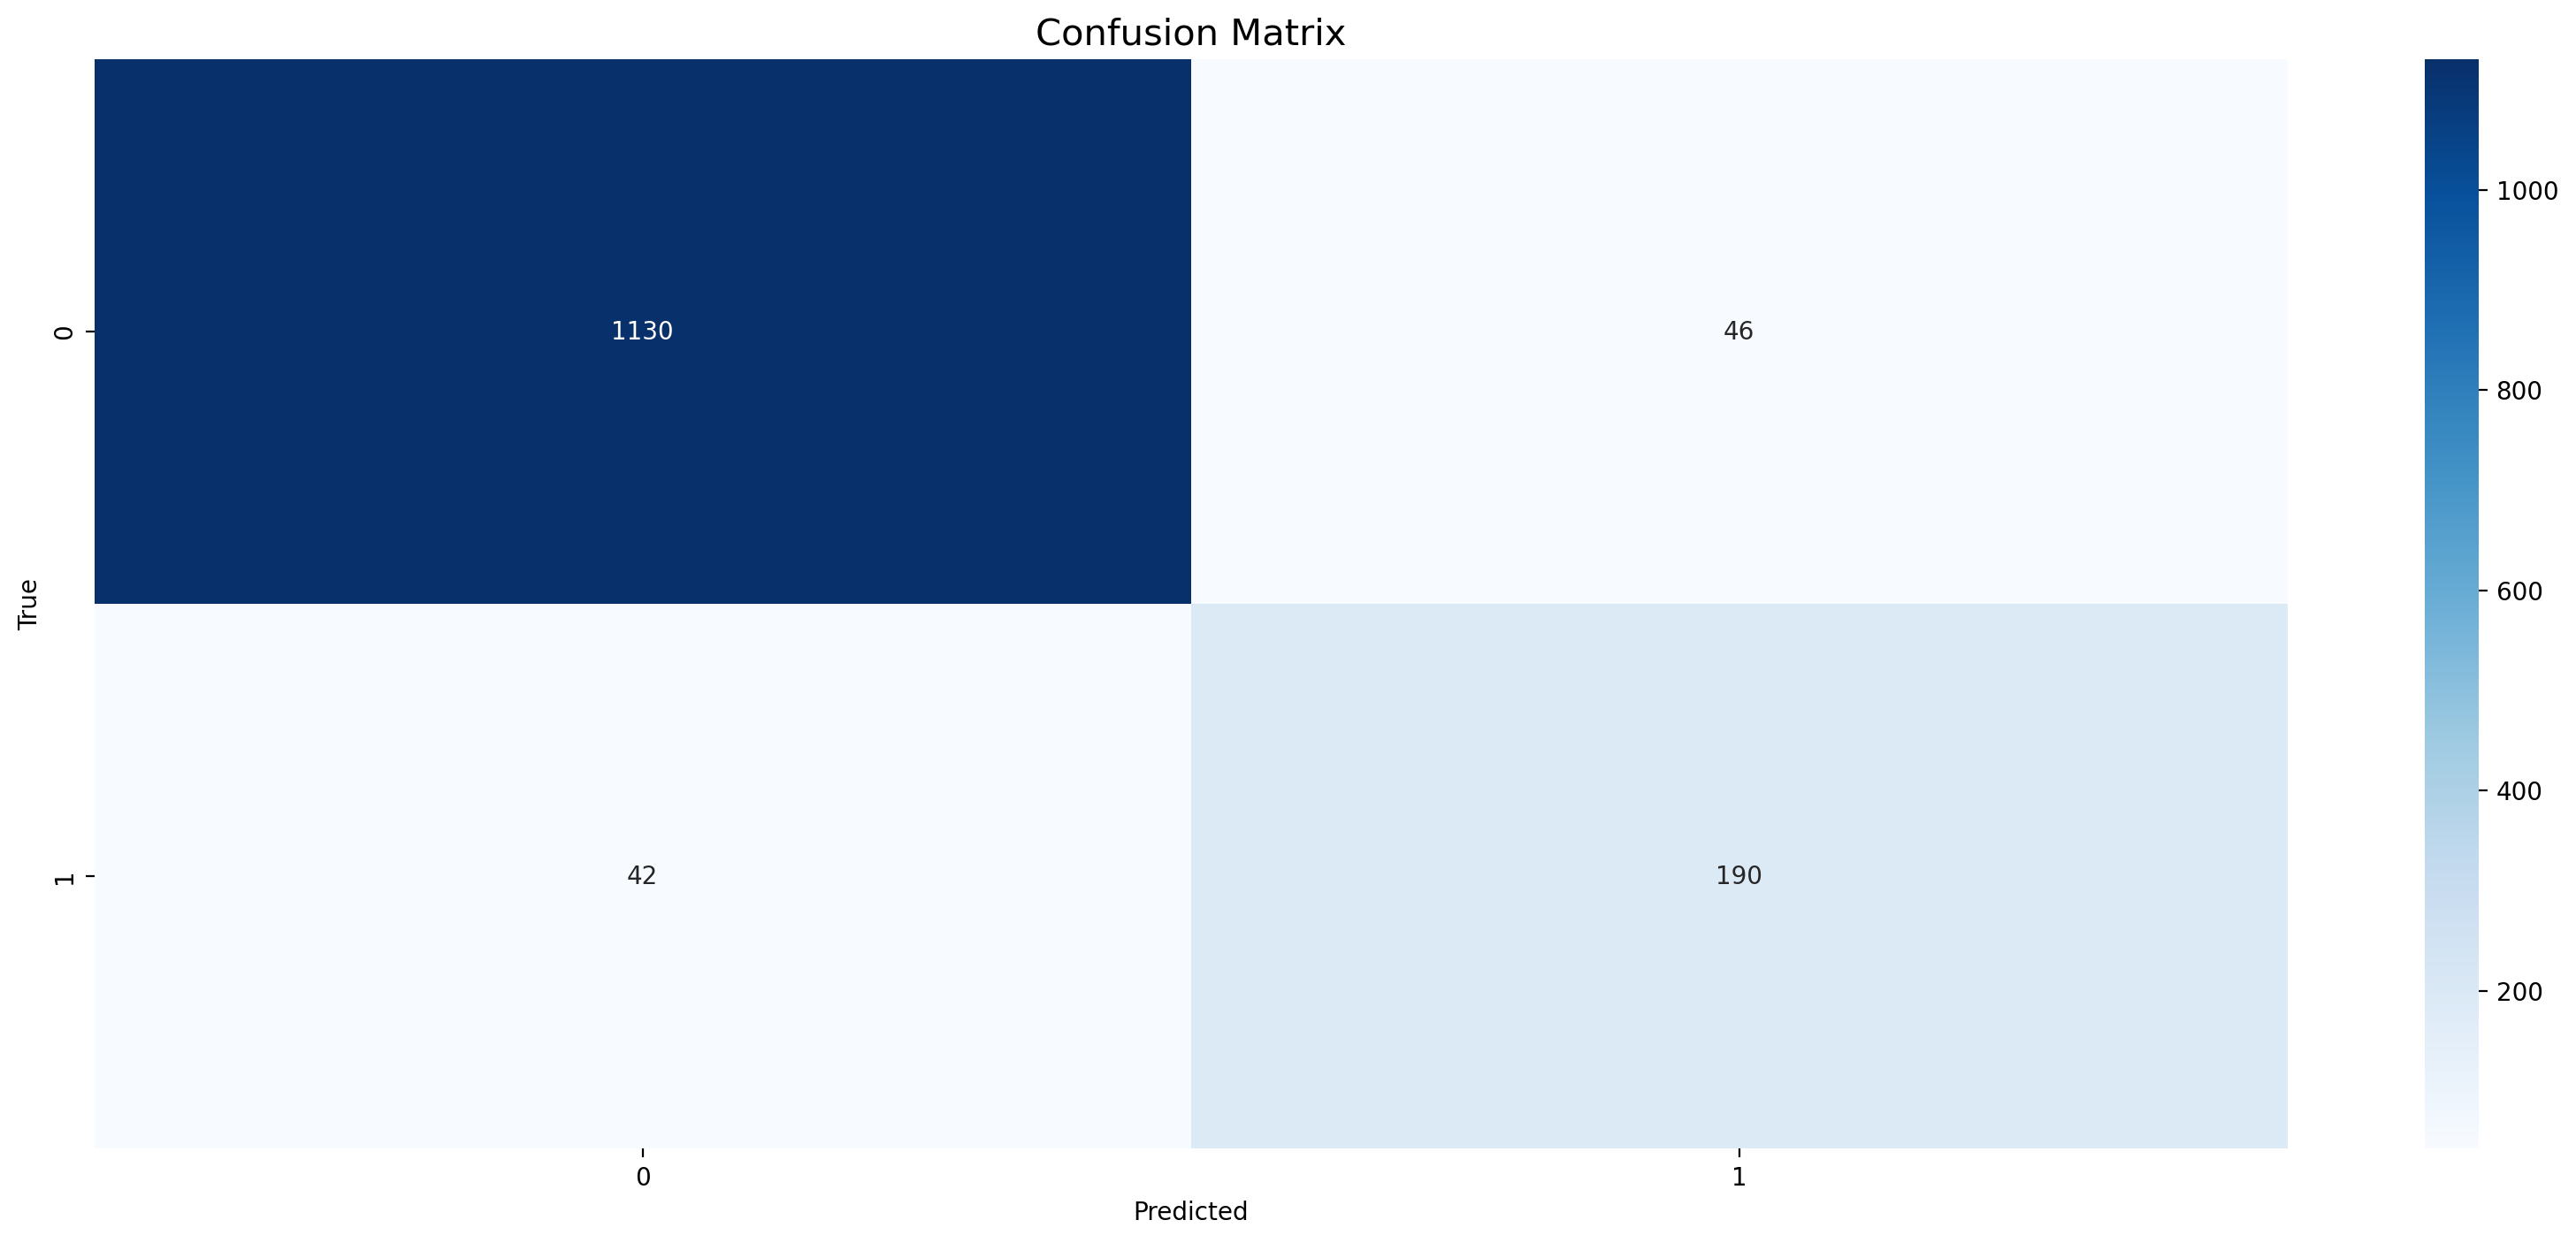

In [177]:
plt.figure(figsize=(20,8), dpi=200)

sns.heatmap(data = ada_cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize=15);

In [178]:
ada_prob = ada.predict_proba(X_test)[:,1]

In [179]:
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_prob)
ada_roc_auc = auc(ada_fpr, ada_tpr)

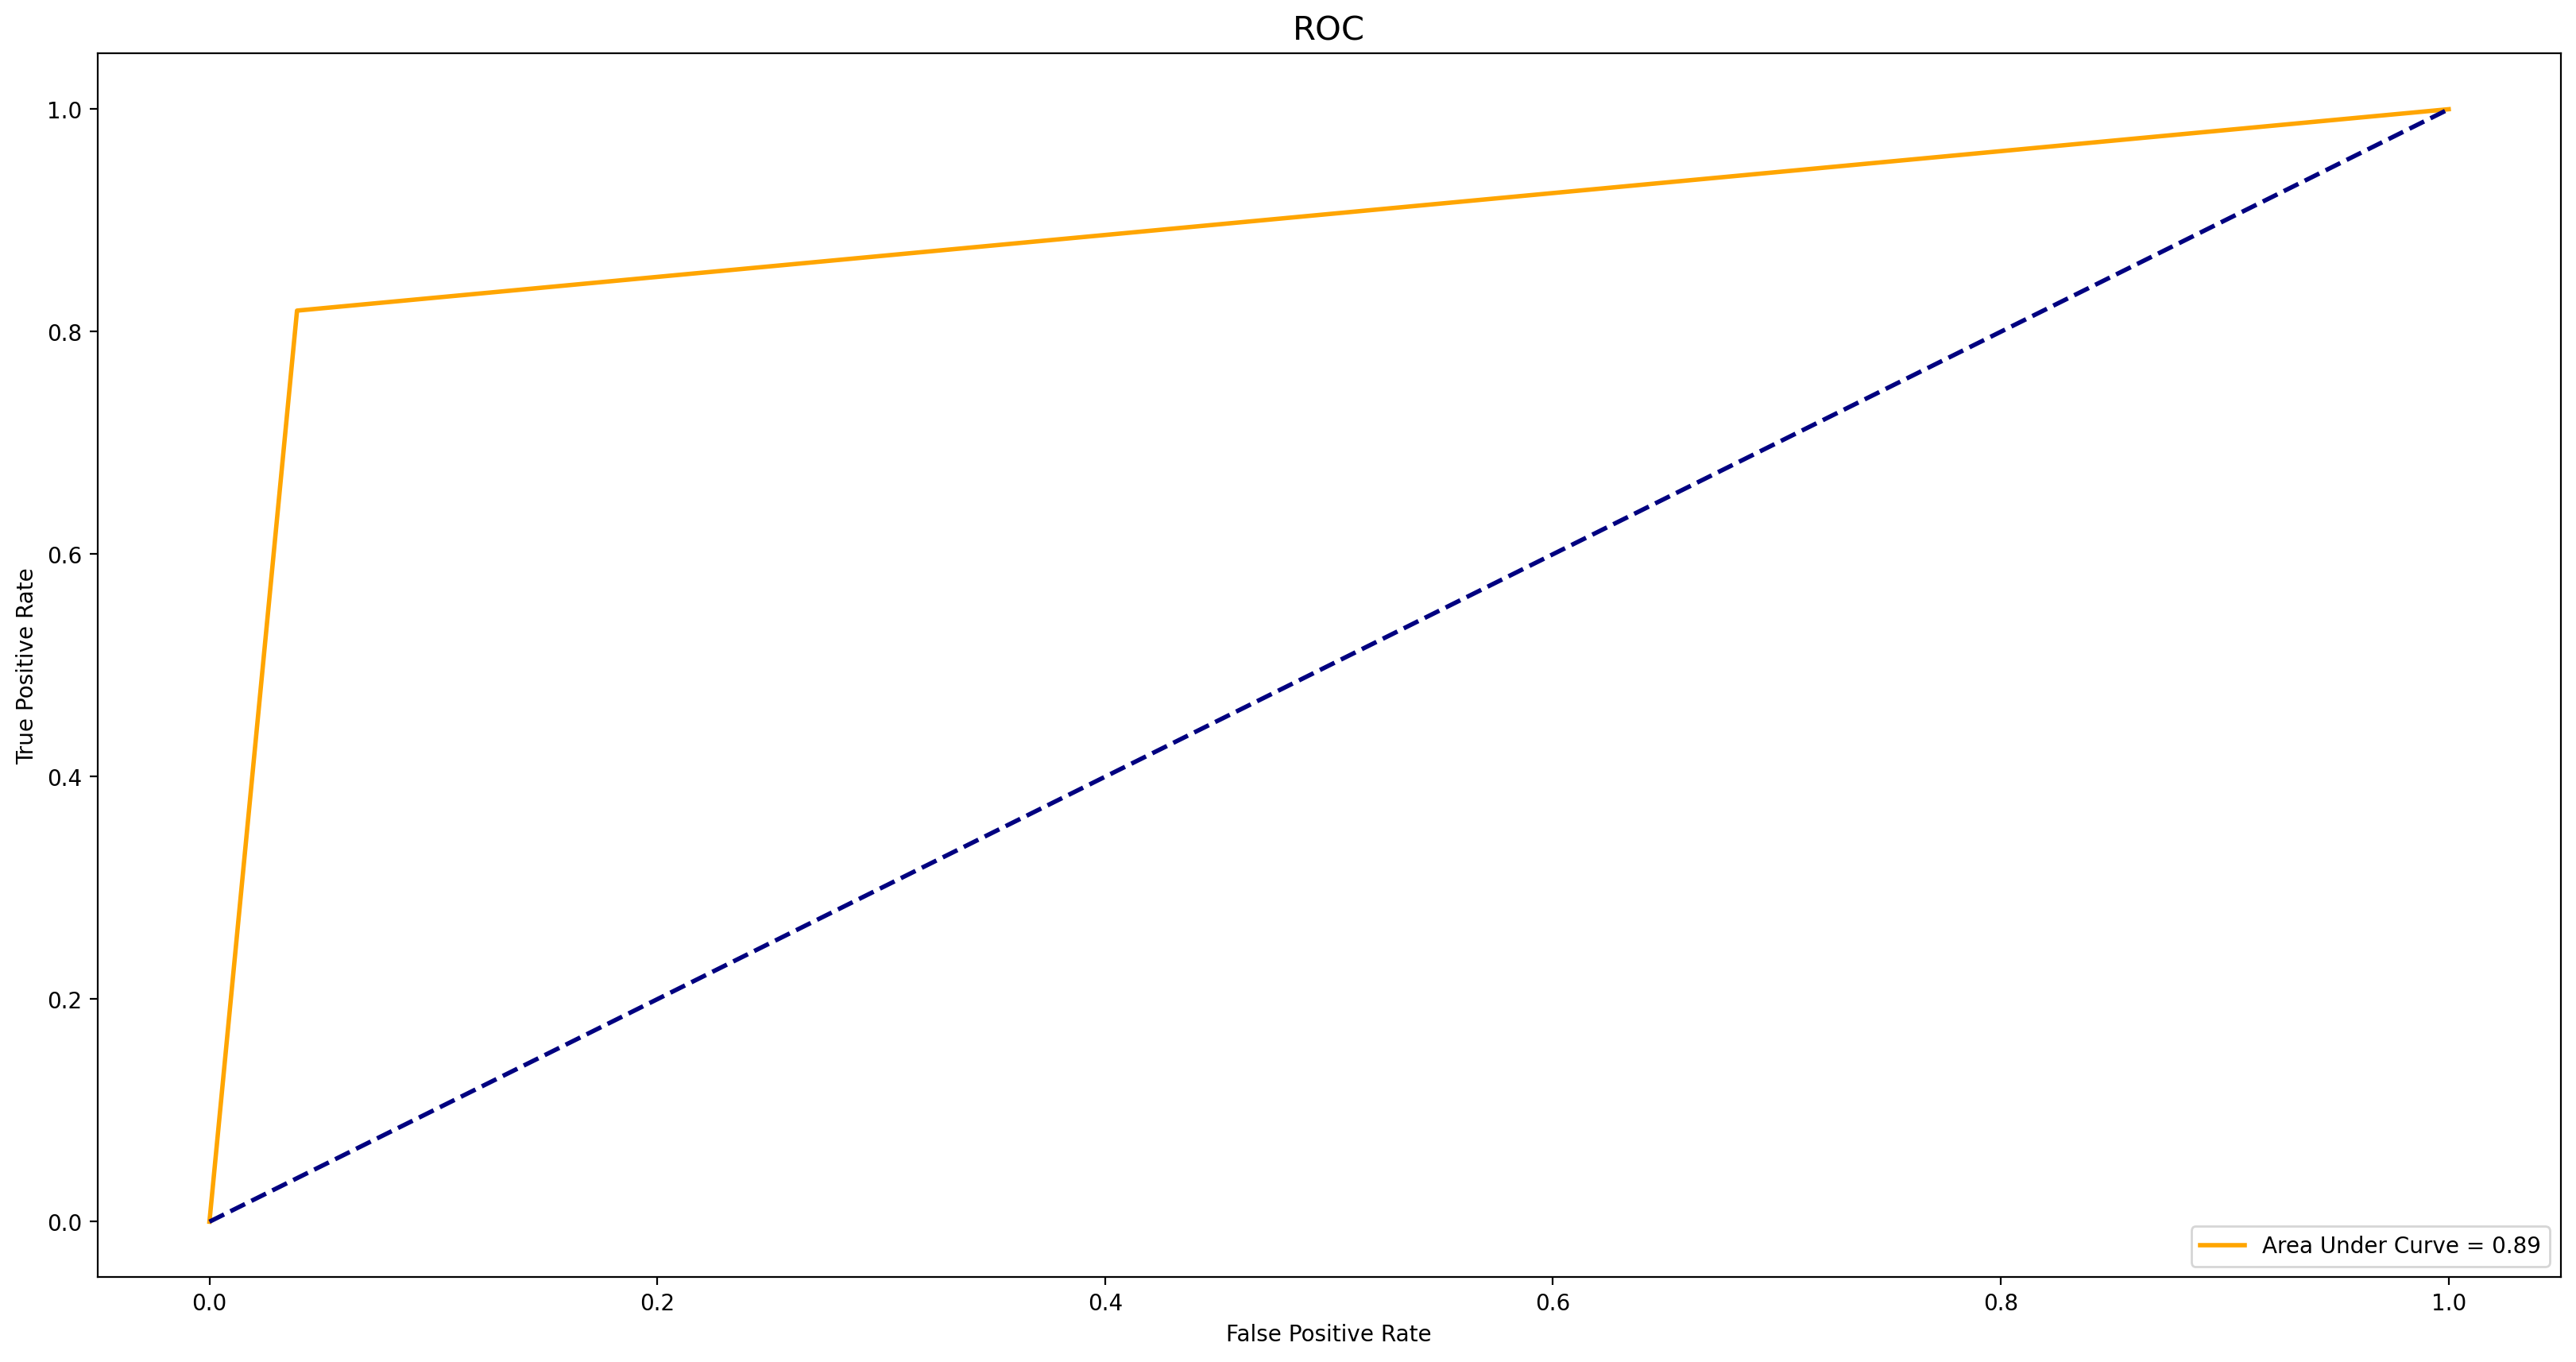

In [180]:
plt.figure(figsize=(20,10), dpi=200)
sns.lineplot(x=ada_fpr, y=ada_tpr, label=f'Area Under Curve = {ada_roc_auc:.2f}', color = 'orange', lw=2)
sns.lineplot(x=[0,1], y=[0,1], color='navy', linestyle='dashed', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', fontsize=15)
plt.legend(loc='lower right');

In [181]:
ada_avg_precision = average_precision_score(y_test, ada_prob)
ada_precision, ada_recall, _ = precision_recall_curve(y_test, ada_prob)

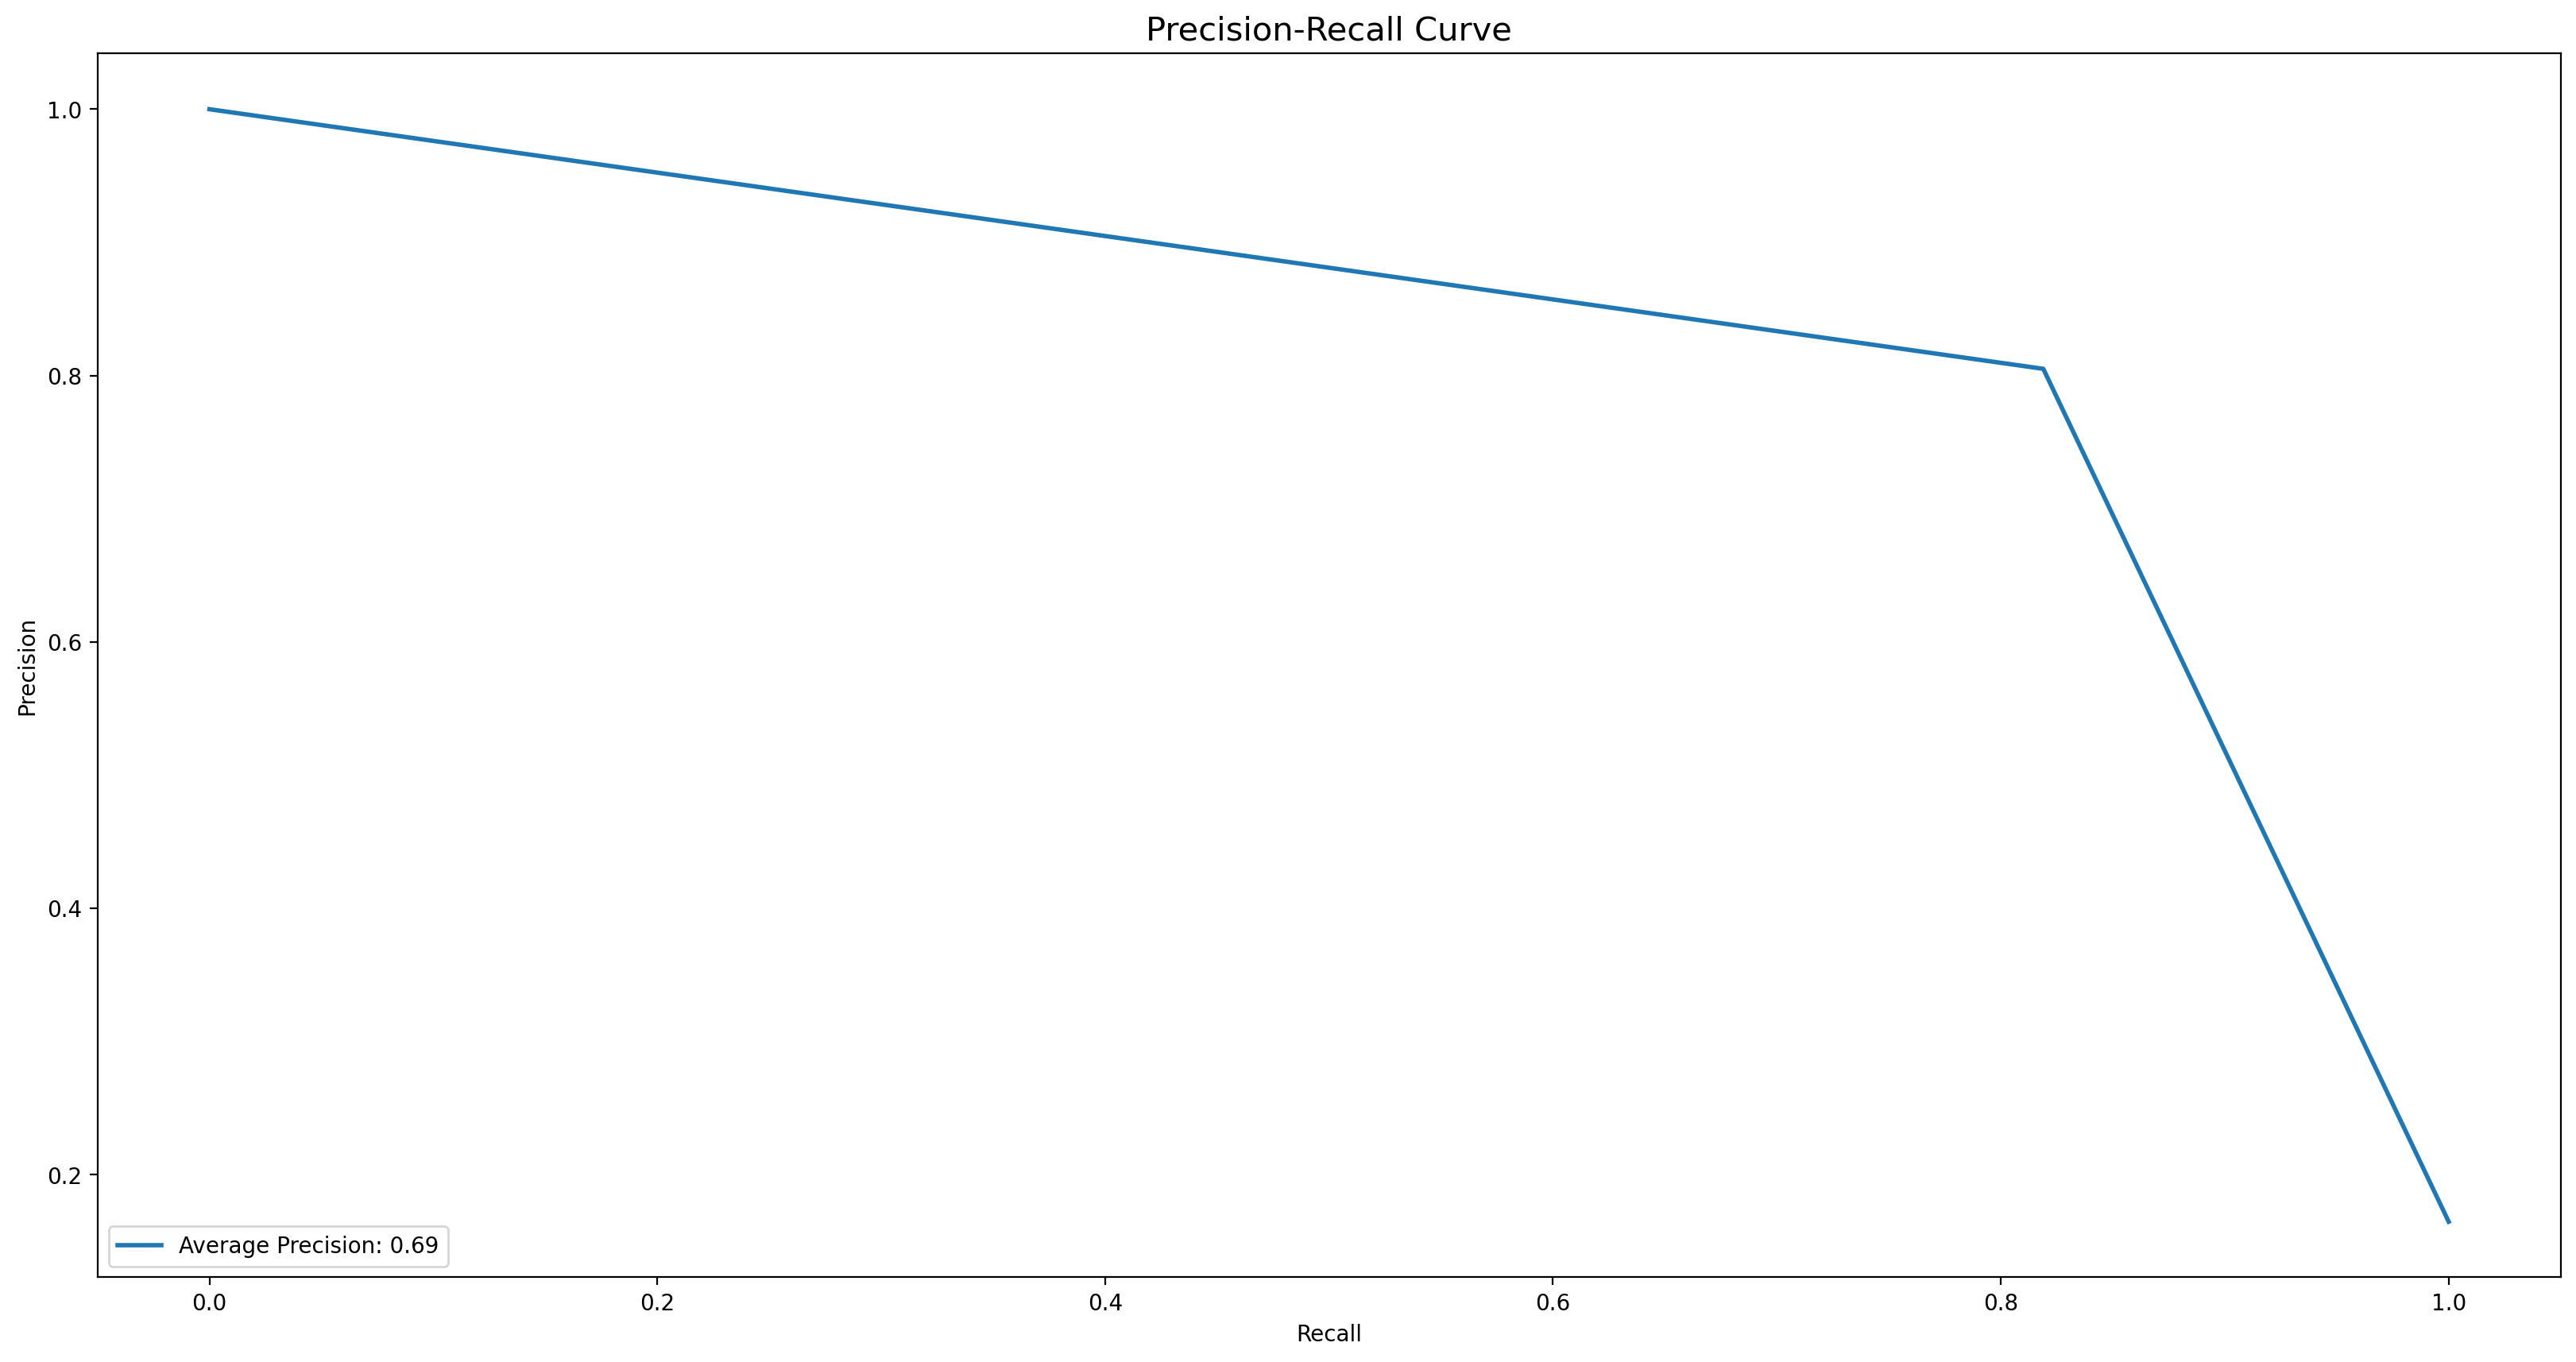

In [182]:
plt.figure(figsize=(20,10), dpi=200)
sns.lineplot(x=ada_recall, y=ada_precision, label=f'Average Precision: {ada_avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=15)
plt.legend(loc='lower left');

In [183]:
ada_prec = round(precision_score(y_test, ada.predict(X_test))*100, 2)
ada_rec = round(recall_score(y_test, ada.predict(X_test))*100, 2)

## Hard-Voting

In [184]:
hard_voting_clf = VotingClassifier(estimators=[('Logistic Regression', logreg_best),
                                              ('K-Nearest Neighbors', knn_best),
                                              ('Decision Trees', dt_best),
                                              ('Support Vector Machine', svm_best),
                                              ('Random Forest', rf_best)], voting='hard')

In [185]:
hard_voting_clf.fit(X_train, y_train)

building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished


VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=0.1, solver='saga')),
                             ('K-Nearest Neighbors',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_jobs=-1, n_neighbors=3,
                                                   weights='distance')),
                             ('Decision Trees',
                              DecisionTreeClassifier(random_state=1)),
                             ('Support Vector Machine',
                              SVC(C=100, gamma=0.1, probability=True,
                                  random_state=1)),
                             ('Random Forest',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=20,
                                                     n_estimators=200,
                                                     n_jobs=-1, random_state=1,
                                                     verbose=3))])

In [186]:
hard_pred = hard_voting_clf.predict(X_test)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


In [187]:
print(f'Testing Score: {round(hard_voting_clf.score(X_test, y_test)*100,2)}%')
print(f'Training Score: {round(hard_voting_clf.score(X_train, y_train)*100,2)}%')

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


Testing Score: 97.16%
Training Score: 100.0%


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


In [188]:
print(classification_report(y_test, hard_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1176
           1       0.96      0.86      0.91       232

    accuracy                           0.97      1408
   macro avg       0.97      0.93      0.95      1408
weighted avg       0.97      0.97      0.97      1408



In [189]:
hard_cm = confusion_matrix(y_test,hard_pred)

In [190]:
print(hard_cm)

[[1168    8]
 [  32  200]]


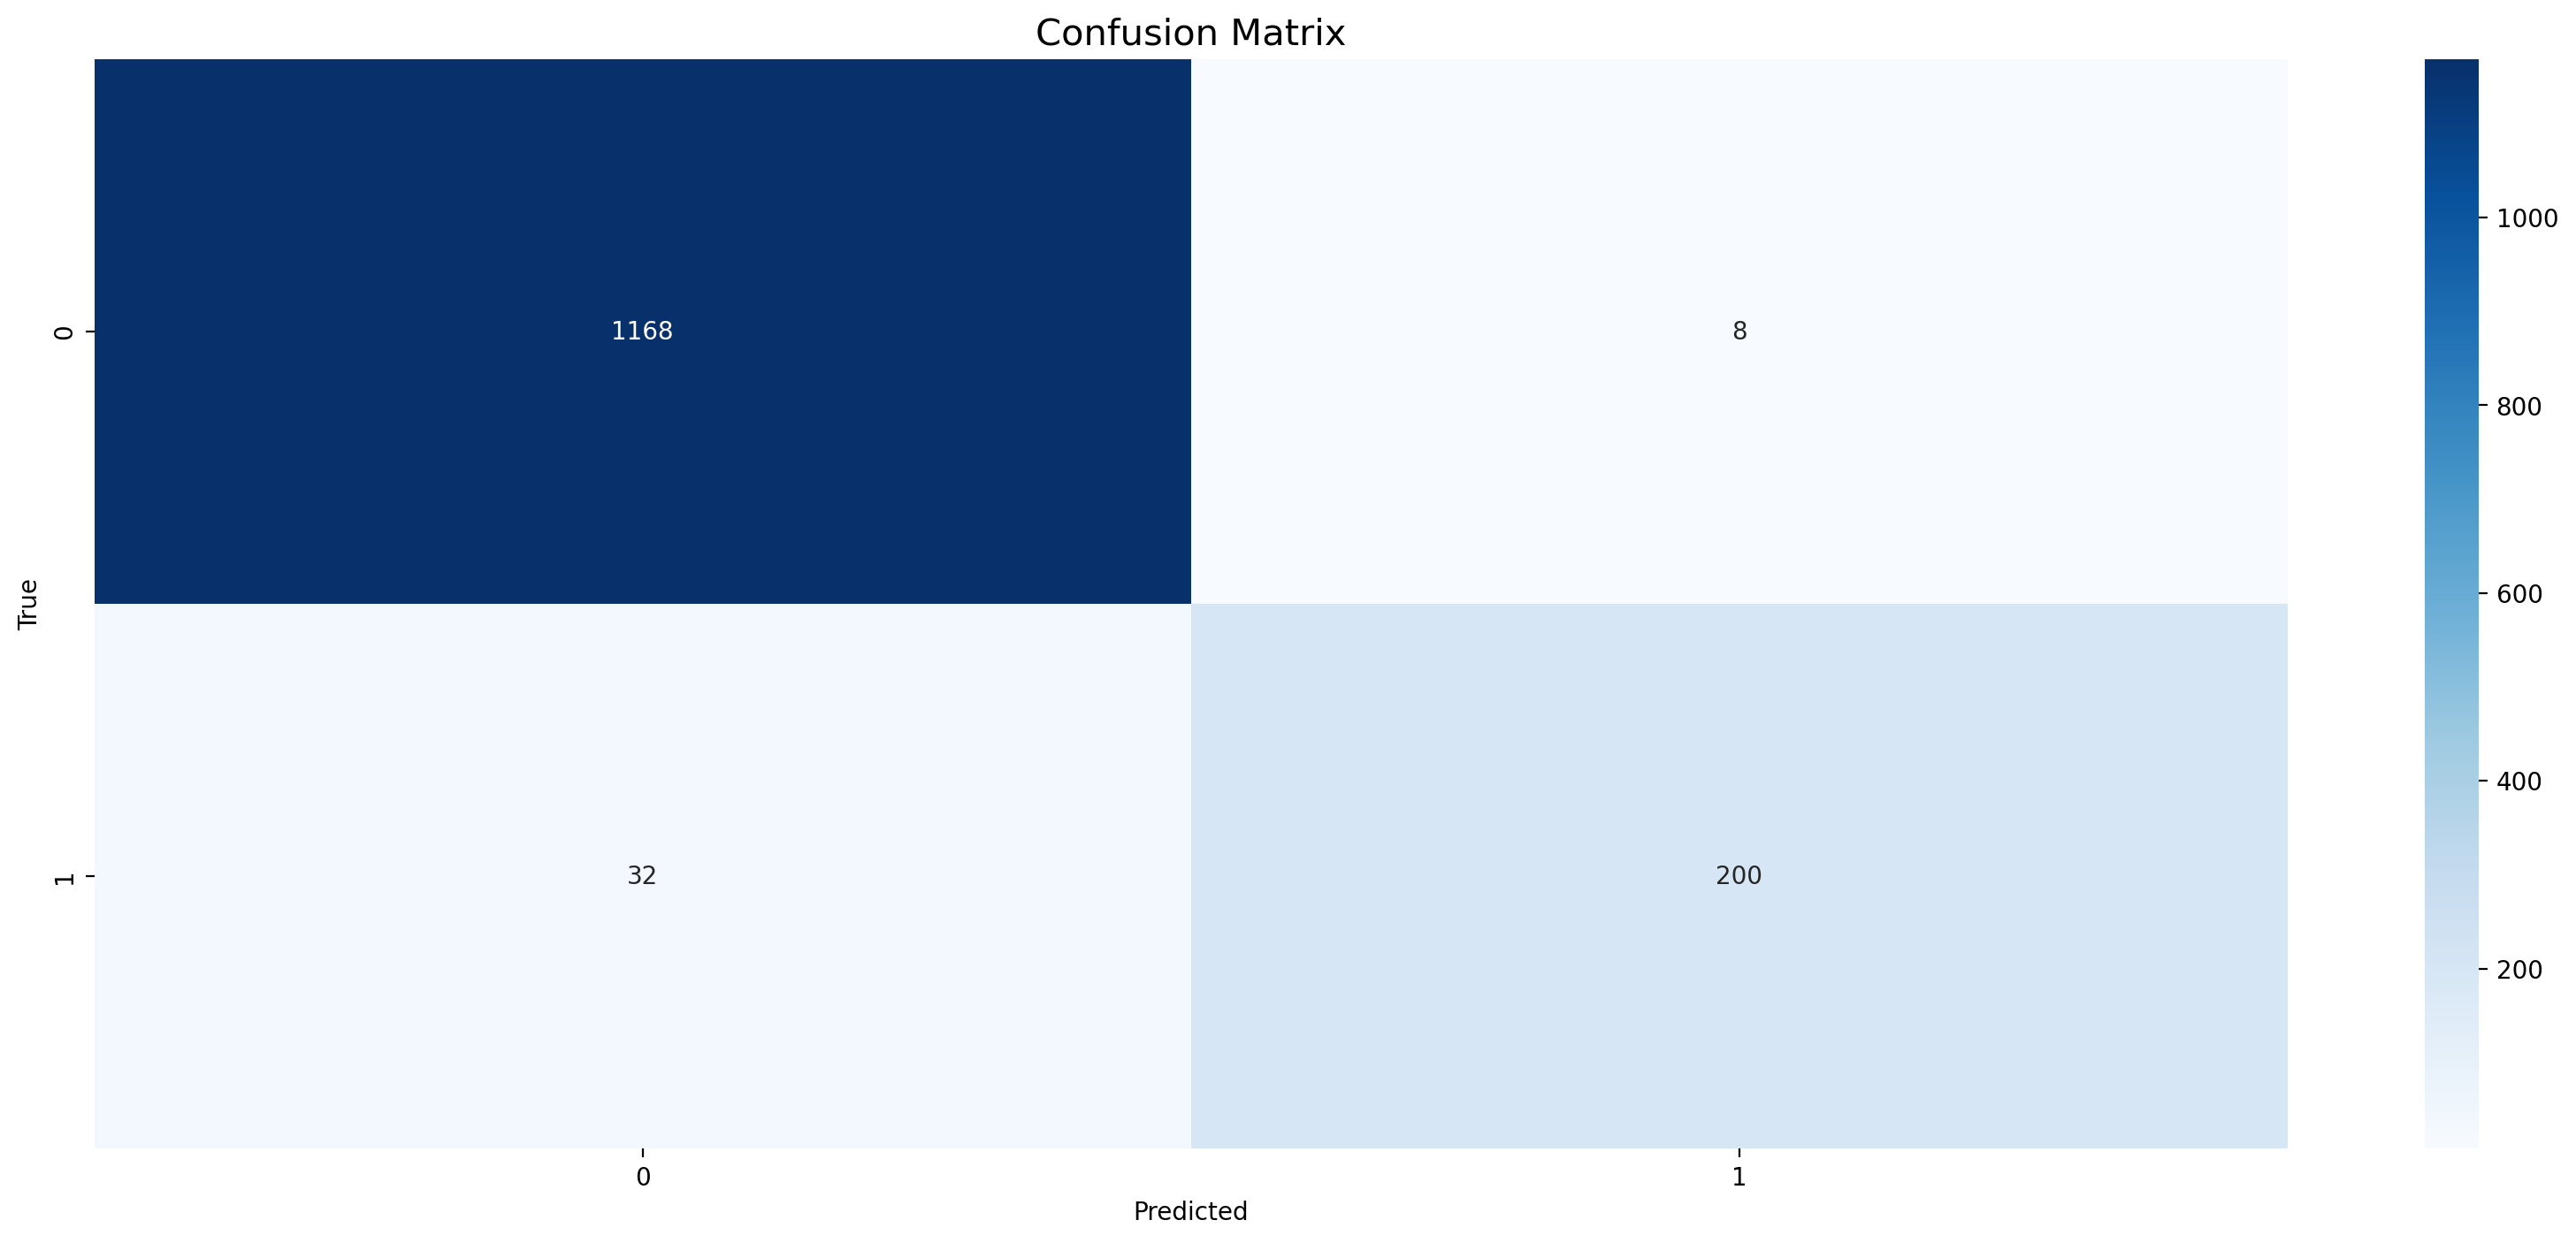

In [191]:
plt.figure(figsize=(20,8), dpi=200)

sns.heatmap(data = hard_cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize=15);

In [192]:
hard_recall = round(recall_score(y_test, hard_pred)*100, 2)
hard_precision = round(precision_score(y_test, hard_pred)*100, 2)

## Soft-Voting

In [193]:
soft_voting_clf = VotingClassifier(estimators=[('Logistic Regression', logreg_best),
                                              ('K-Nearest Neighbors', knn_best),
                                              ('Decision Trees', dt_best),
                                              ('Support Vector Machine', svm_best),
                                              ('Random Forest', rf_best)], voting='soft')

In [194]:
soft_voting_clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=0.1, solver='saga')),
                             ('K-Nearest Neighbors',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_jobs=-1, n_neighbors=3,
                                                   weights='distance')),
                             ('Decision Trees',
                              DecisionTreeClassifier(random_state=1)),
                             ('Support Vector Machine',
                              SVC(C=100, gamma=0.1, probability=True,
                                  random_state=1)),
                             ('Random Forest',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=20,
                                                     n_estimators=200,
                                                     n_jobs=-1, random_state=1,
                                                     verbose=3))],
                 voting='soft')

In [195]:
soft_pred = soft_voting_clf.predict(X_test)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


In [196]:
print(f'Testing Score: {round(soft_voting_clf.score(X_test, y_test)*100,2)}%')
print(f'Training Score: {round(soft_voting_clf.score(X_train, y_train)*100,2)}%')

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


Testing Score: 97.23%
Training Score: 100.0%


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


In [197]:
print(classification_report(y_test, soft_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1176
           1       0.96      0.87      0.91       232

    accuracy                           0.97      1408
   macro avg       0.97      0.93      0.95      1408
weighted avg       0.97      0.97      0.97      1408



In [198]:
soft_cm = confusion_matrix(y_test, soft_pred)

In [199]:
print(soft_cm)

[[1167    9]
 [  30  202]]


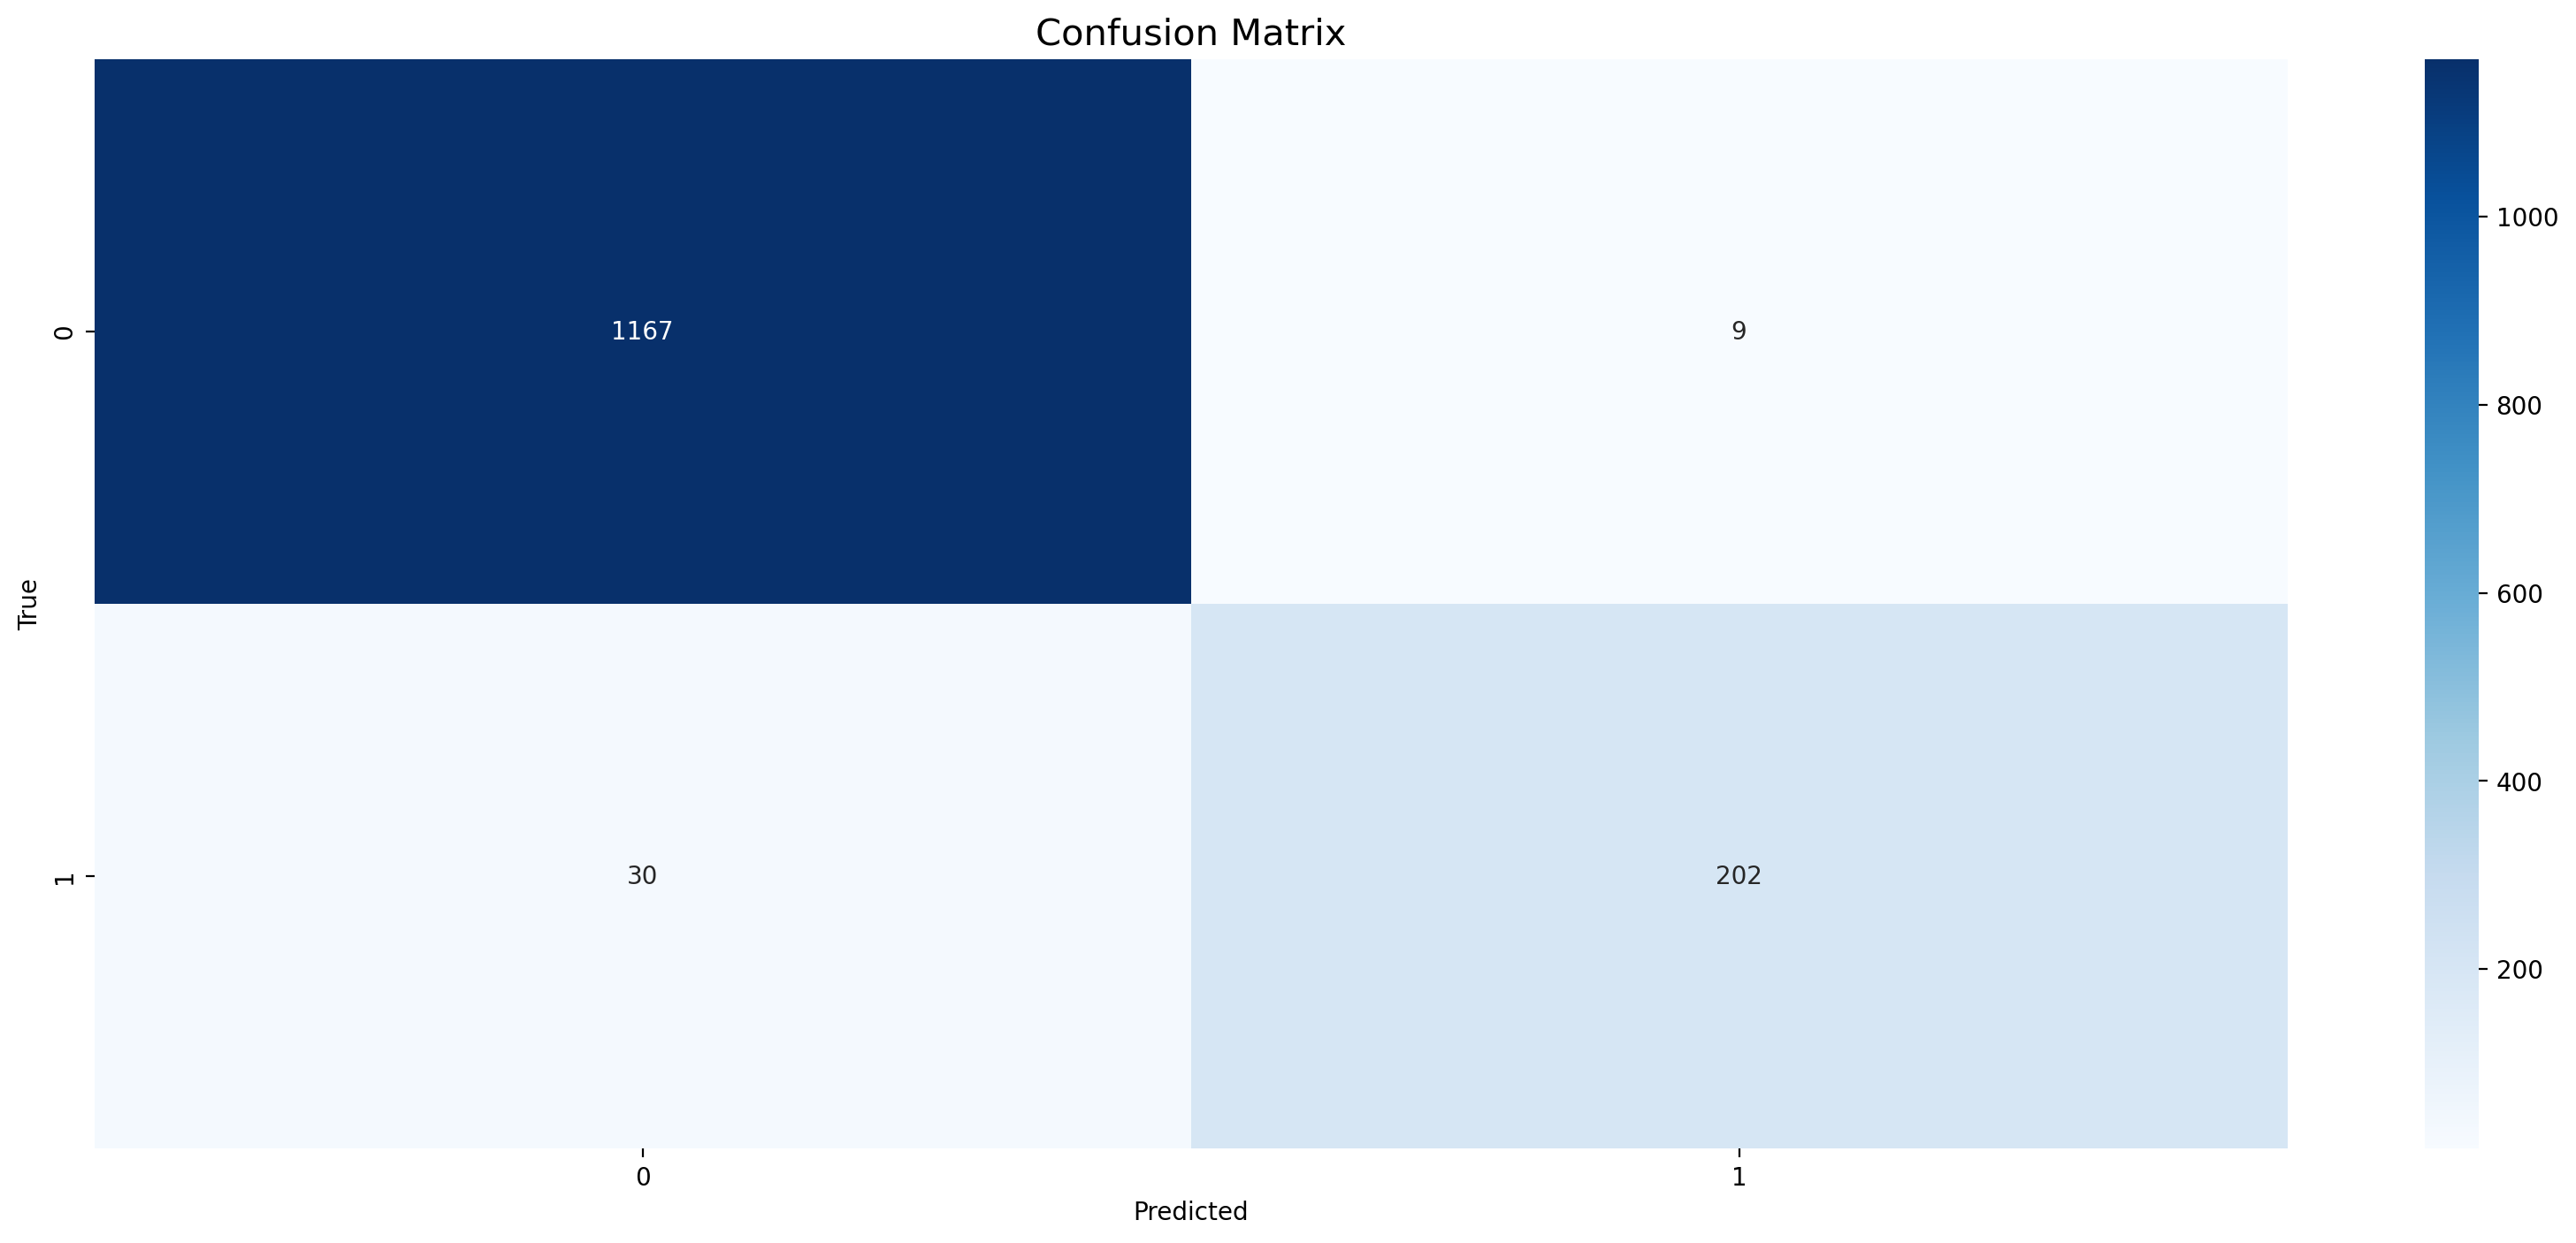

In [200]:
plt.figure(figsize=(20,8), dpi=200)

sns.heatmap(data = soft_cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize=15);

In [201]:
soft_prob = soft_voting_clf.predict_proba(X_test)[:,1]

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


In [202]:
soft_fpr, soft_tpr, _ = roc_curve(y_test, soft_prob)
soft_roc_auc = auc(soft_fpr, soft_tpr)

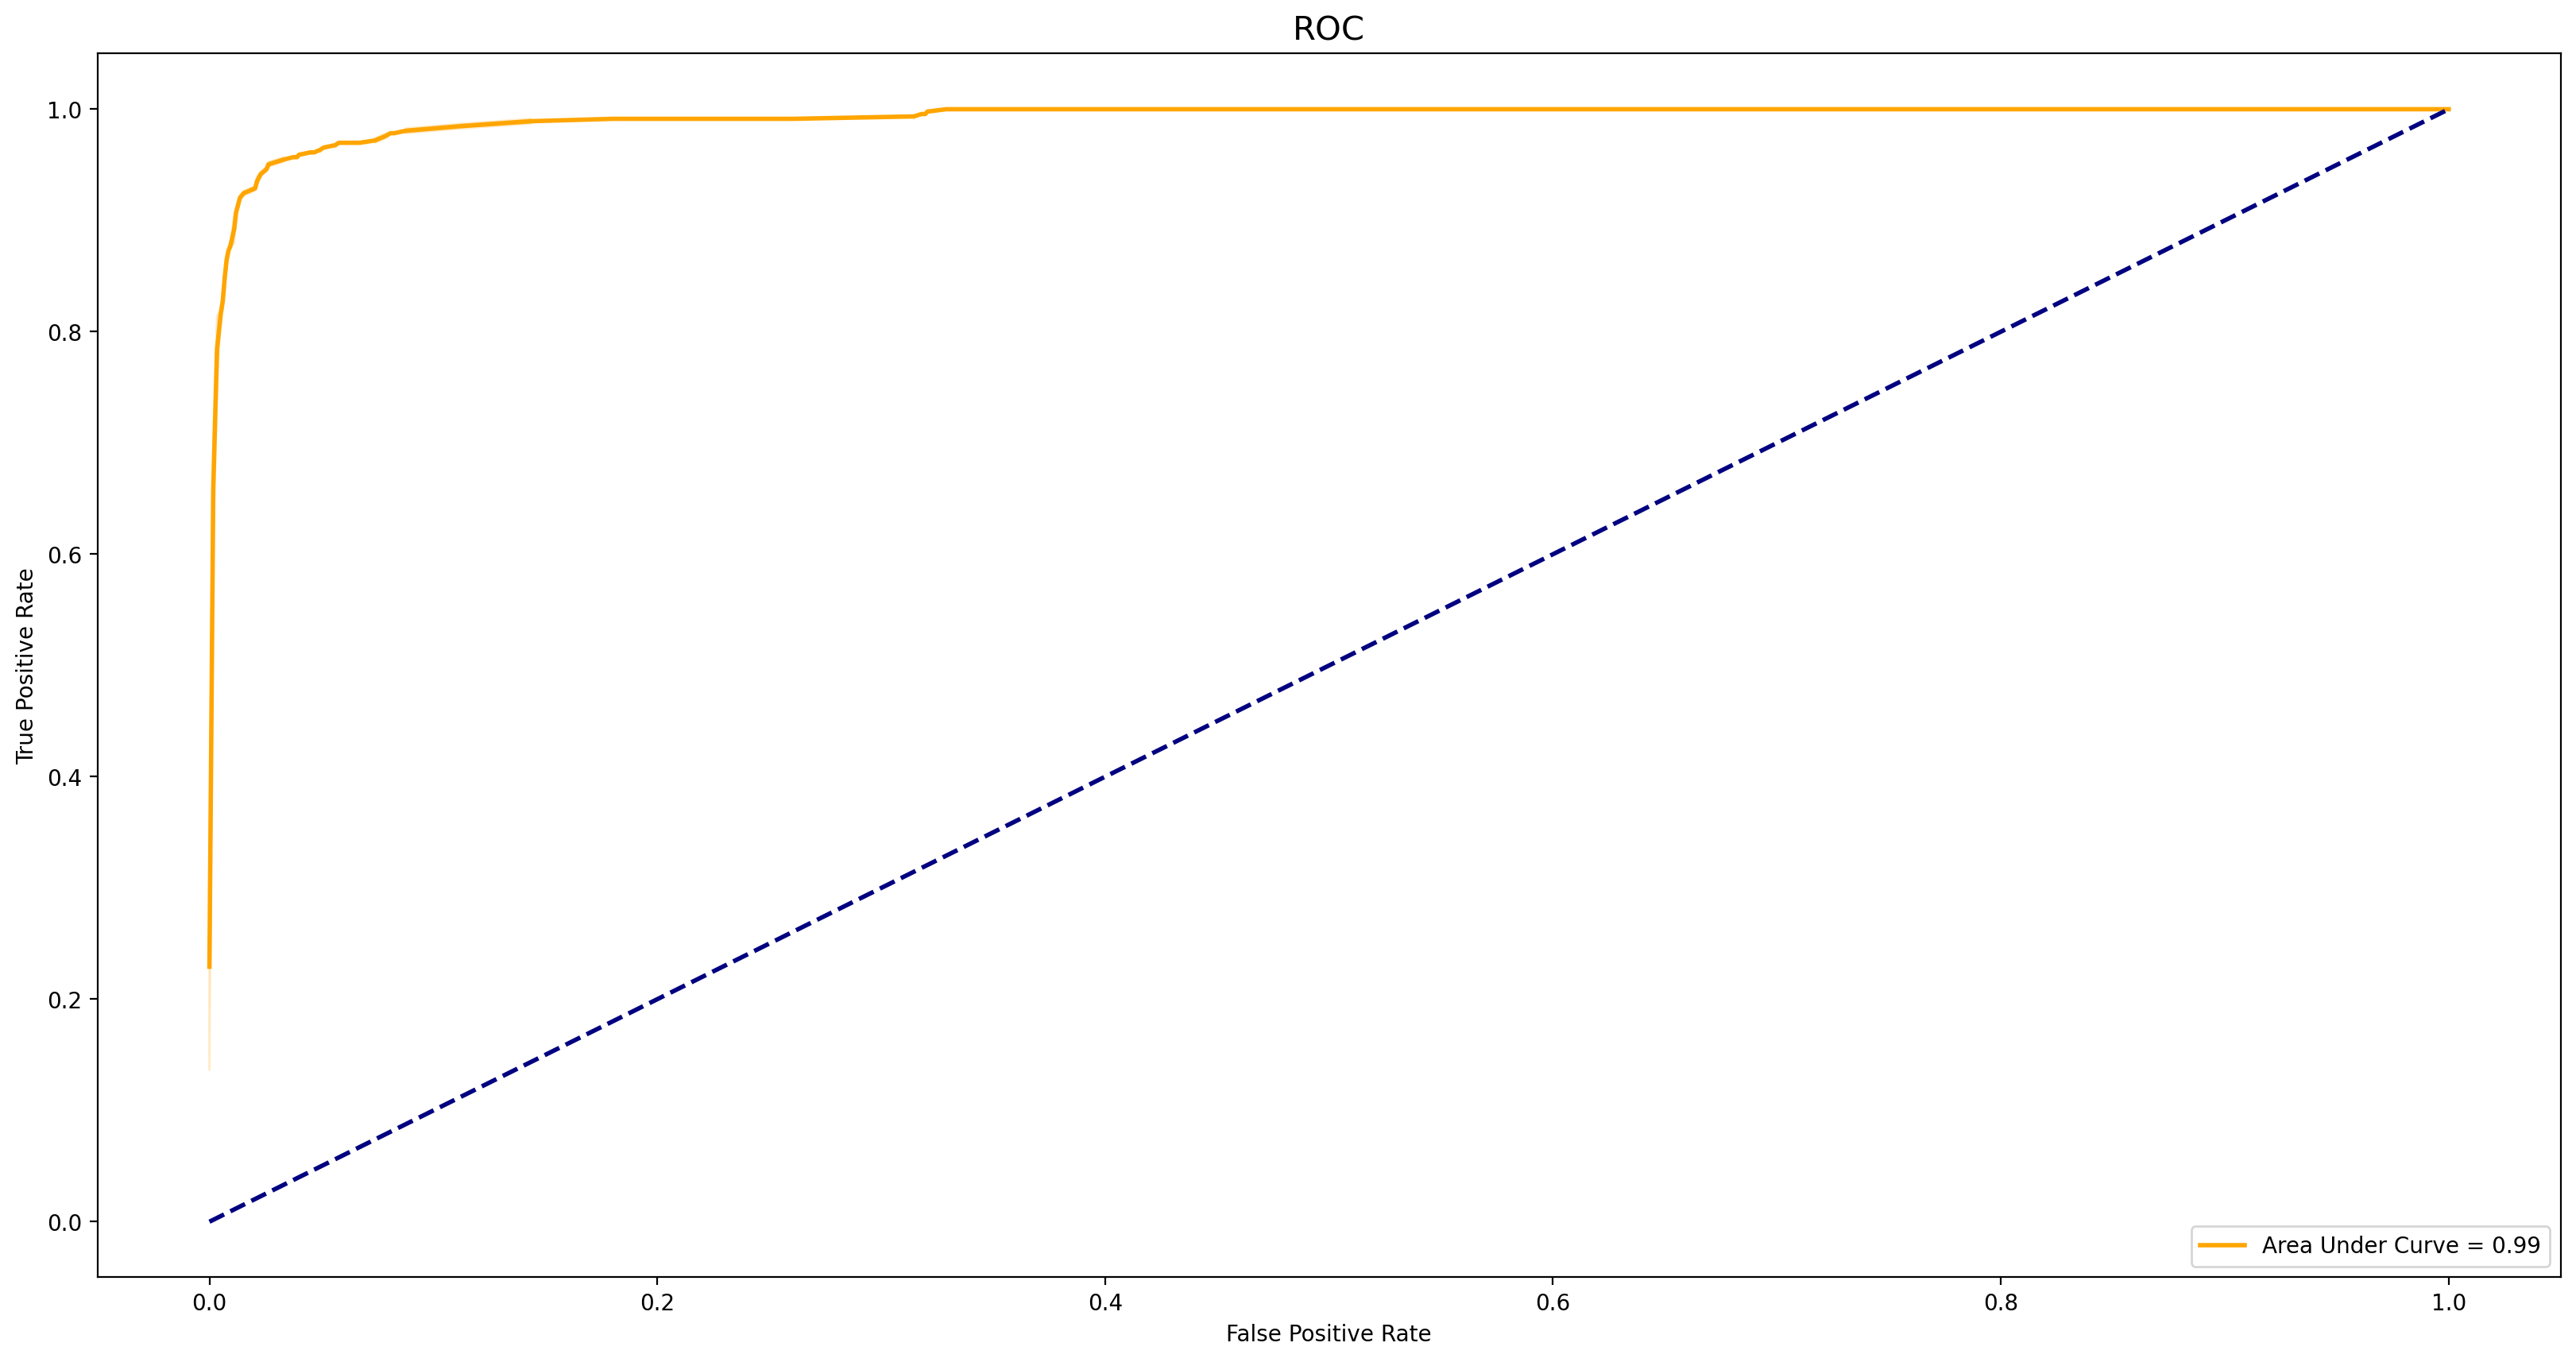

In [203]:
plt.figure(figsize=(20,10), dpi=200)
sns.lineplot(x=soft_fpr, y=soft_tpr, label=f'Area Under Curve = {soft_roc_auc:.2f}', color = 'orange', lw=2)
sns.lineplot(x=[0,1], y=[0,1], color='navy', linestyle='dashed', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', fontsize=15)
plt.legend(loc='lower right');

In [204]:
soft_avg_precision = average_precision_score(y_test, soft_prob)
soft_precision, soft_recall, _ = precision_recall_curve(y_test, soft_prob)

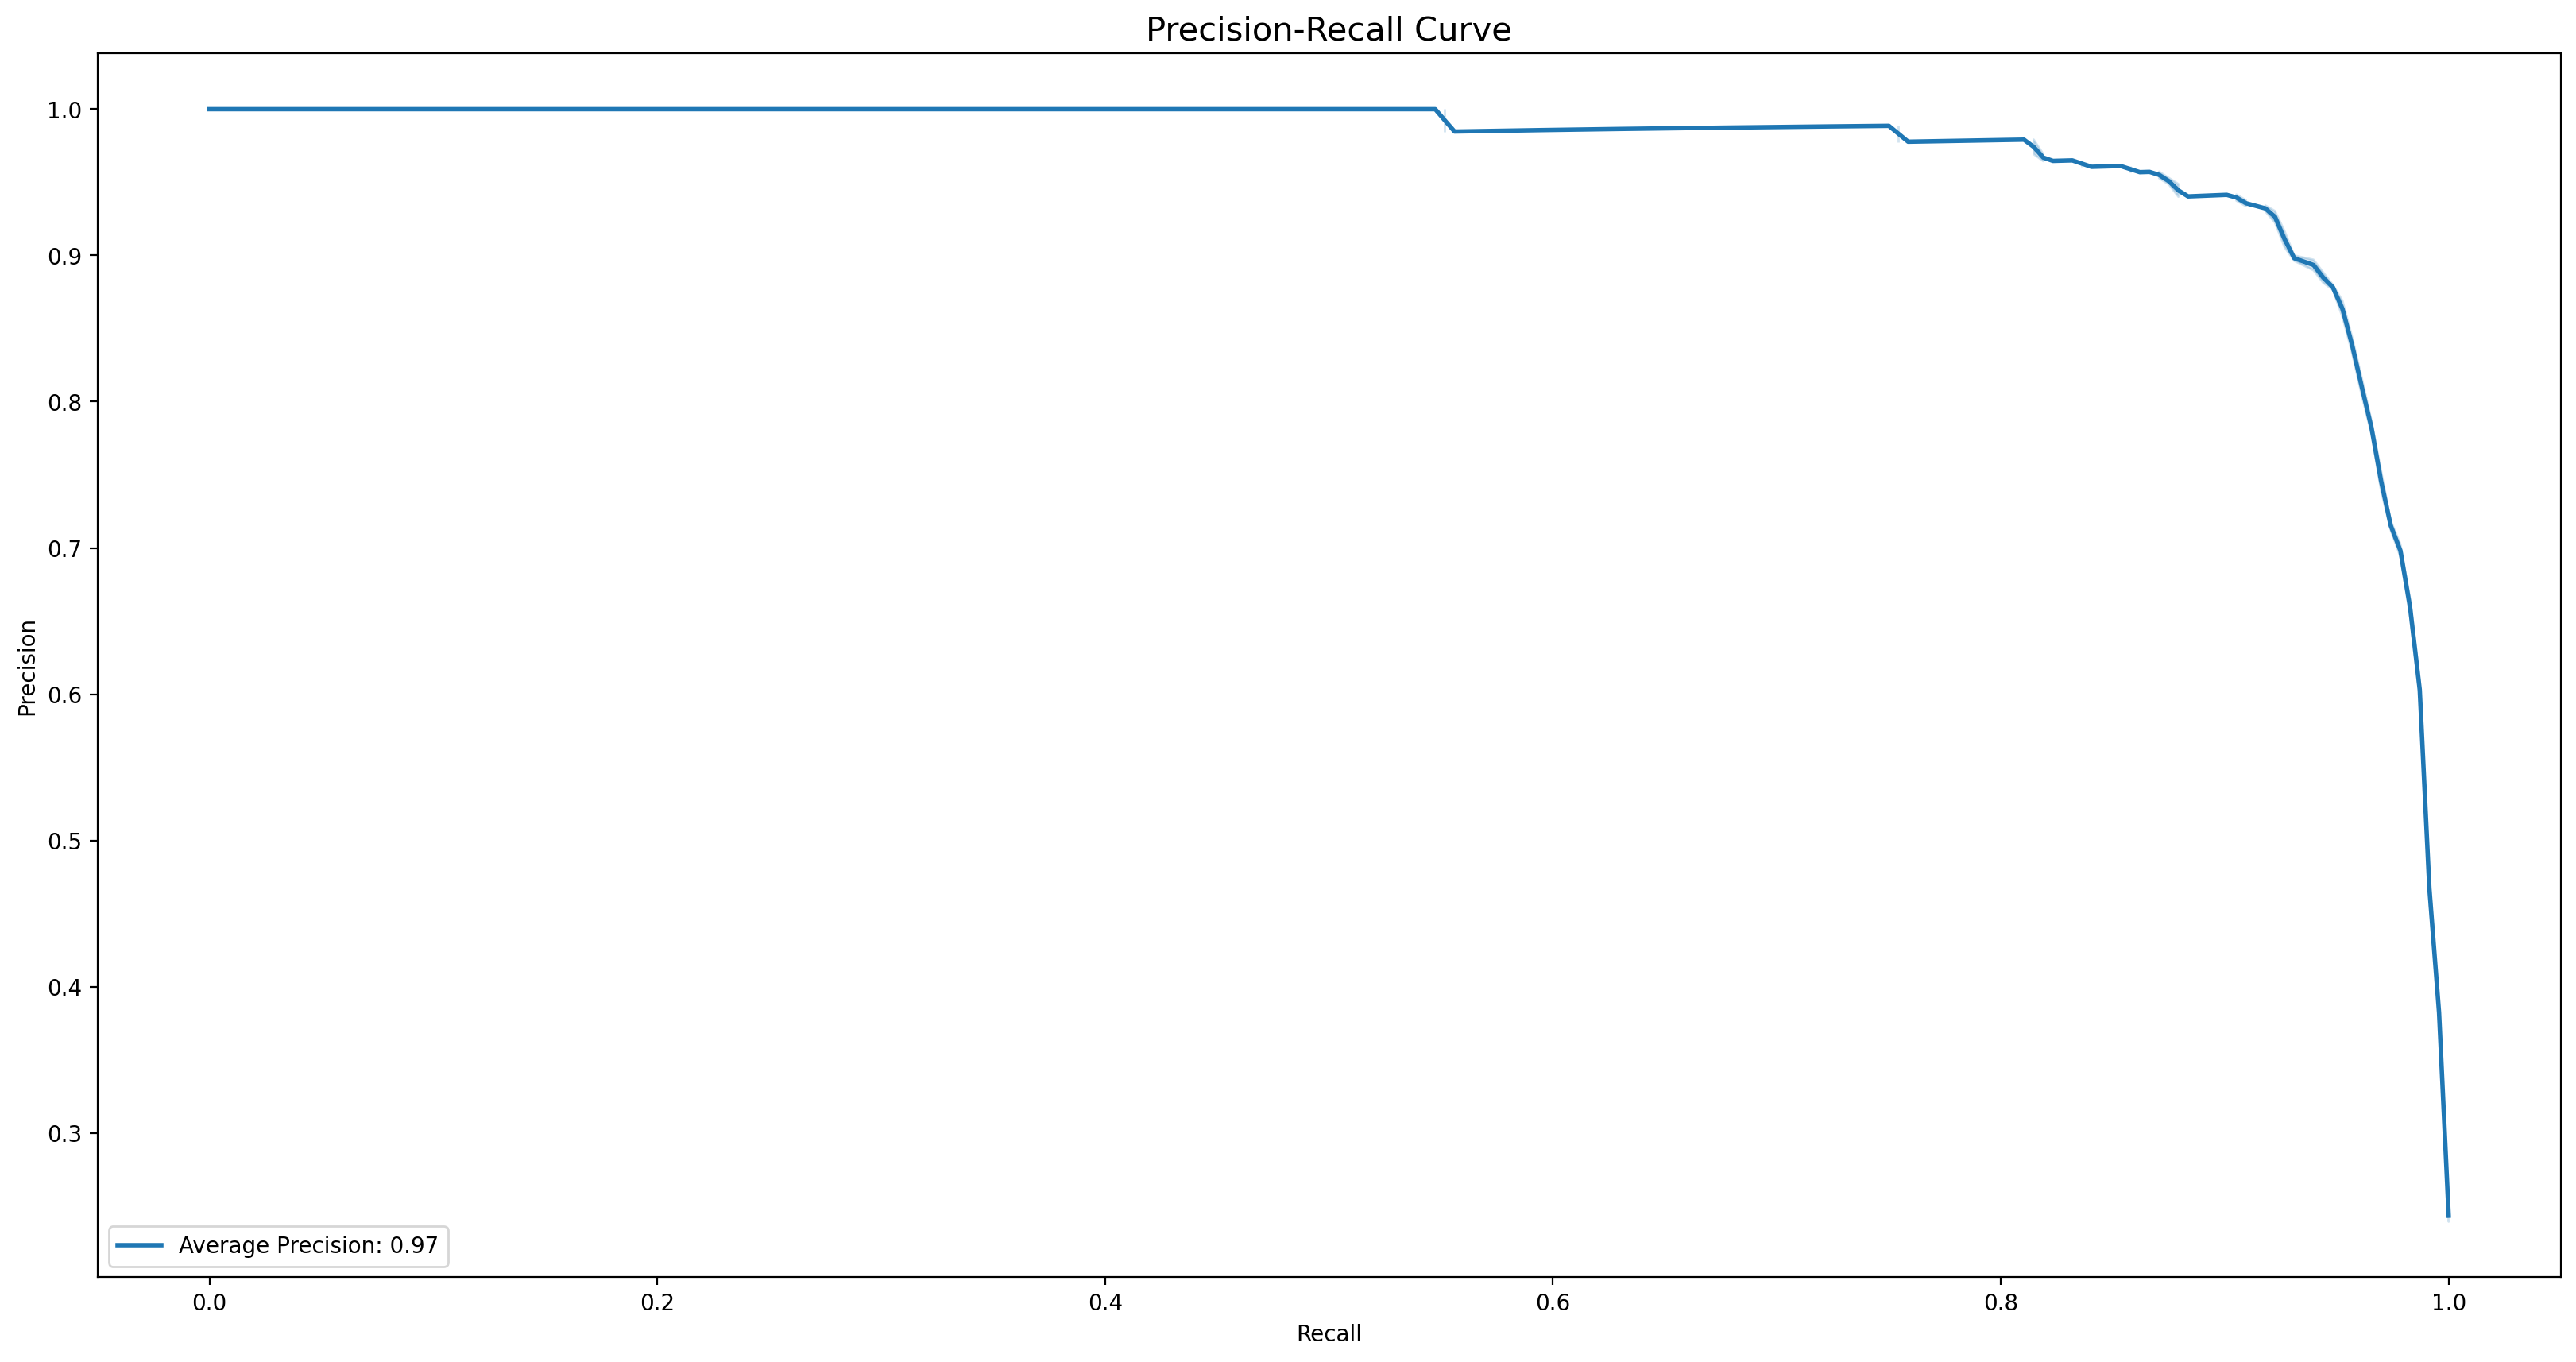

In [205]:
plt.figure(figsize=(20,10), dpi=200)
sns.lineplot(x=soft_recall, y=soft_precision, label=f'Average Precision: {soft_avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=15)
plt.legend(loc='lower left');

In [206]:
soft_prec = round(precision_score(y_test, soft_voting_clf.predict(X_test))*100, 2)
soft_rec = round(recall_score(y_test, soft_voting_clf.predict(X_test))*100, 2)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


## XGBoost

In [207]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [208]:
xgb_params = {'objective':'multi:softmax',
             'num_class':2,
             'max_depth':5,
             'eta':0.01,
             'eval_metric':'mlogloss'}

In [209]:
bst = xgb.train(xgb_params, dtrain, 100)

In [210]:
xgb_pred = bst.predict(dtest)
xgb_train_pred = bst.predict(dtrain)

In [211]:
print(f'Testing Score: {round(accuracy_score(y_test, xgb_pred)*100,2)}%')
print(f'Training Score: {round(accuracy_score(y_train, xgb_train_pred)*100,2)}%')

Testing Score: 89.84%
Training Score: 92.07%


In [212]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1176
           1       0.76      0.56      0.64       232

    accuracy                           0.90      1408
   macro avg       0.84      0.76      0.79      1408
weighted avg       0.89      0.90      0.89      1408



## Implementing GridSearchCV in XGBoost for Parameter Tuning

In [213]:
xgb = xgb.XGBClassifier()

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'eta': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'eval_metric': ['error', 'logloss']
}

xgb_grid = GridSearchCV(estimator = xgb, param_grid = xgb_param_grid, cv=10, scoring = 'accuracy', n_jobs = -1)

xgb_grid.fit(X_train, y_train)

xgb_best_params = xgb_grid.best_params_
xgb_best_score = xgb_grid.best_score_

In [214]:
print(f'Best Parameters: {xgb_best_params}')
print(f'Best Score: {xgb_best_score:.2f}')

Best Parameters: {'colsample_bytree': 0.8, 'eta': 0.1, 'eval_metric': 'error', 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best Score: 0.97


In [215]:
xgb_best = xgb_grid.best_estimator_

In [216]:
xgb_pred = xgb_best.predict(X_test)

In [217]:
xgb_cm = confusion_matrix(y_test, xgb_pred)

In [218]:
print(xgb_cm)

[[1165   11]
 [  22  210]]


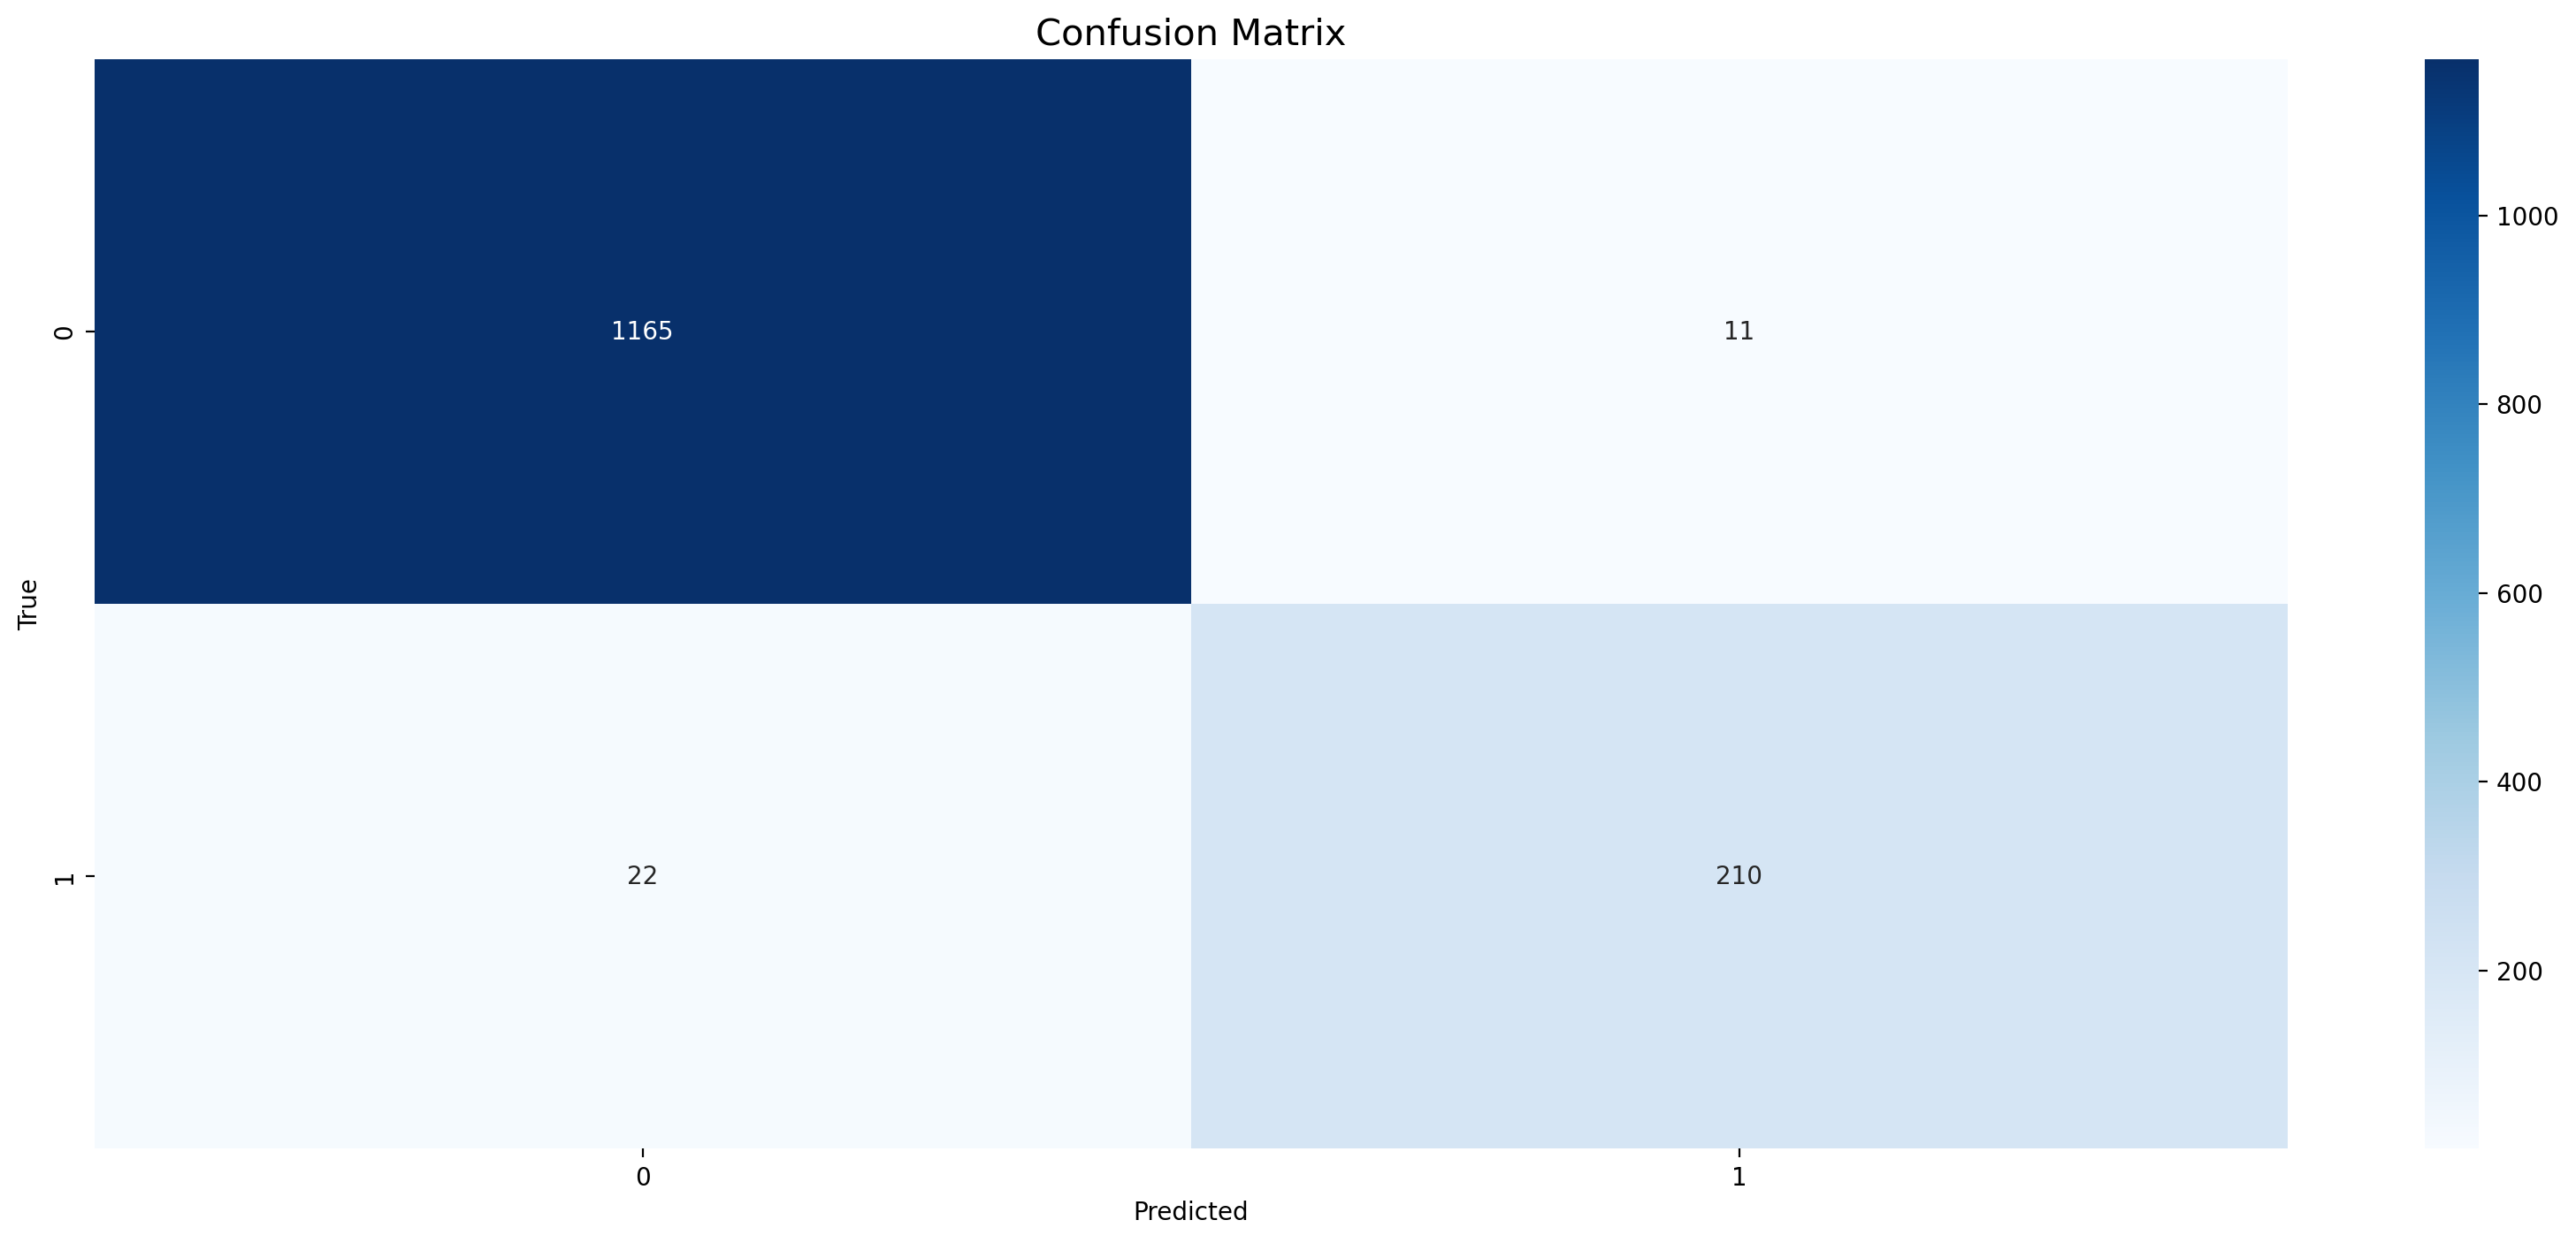

In [219]:
plt.figure(figsize=(20,8), dpi=200)

sns.heatmap(data = xgb_cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize=15);

In [220]:
xgb_prob = xgb_best.predict_proba(X_test)[:,1]

In [221]:
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_prob)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

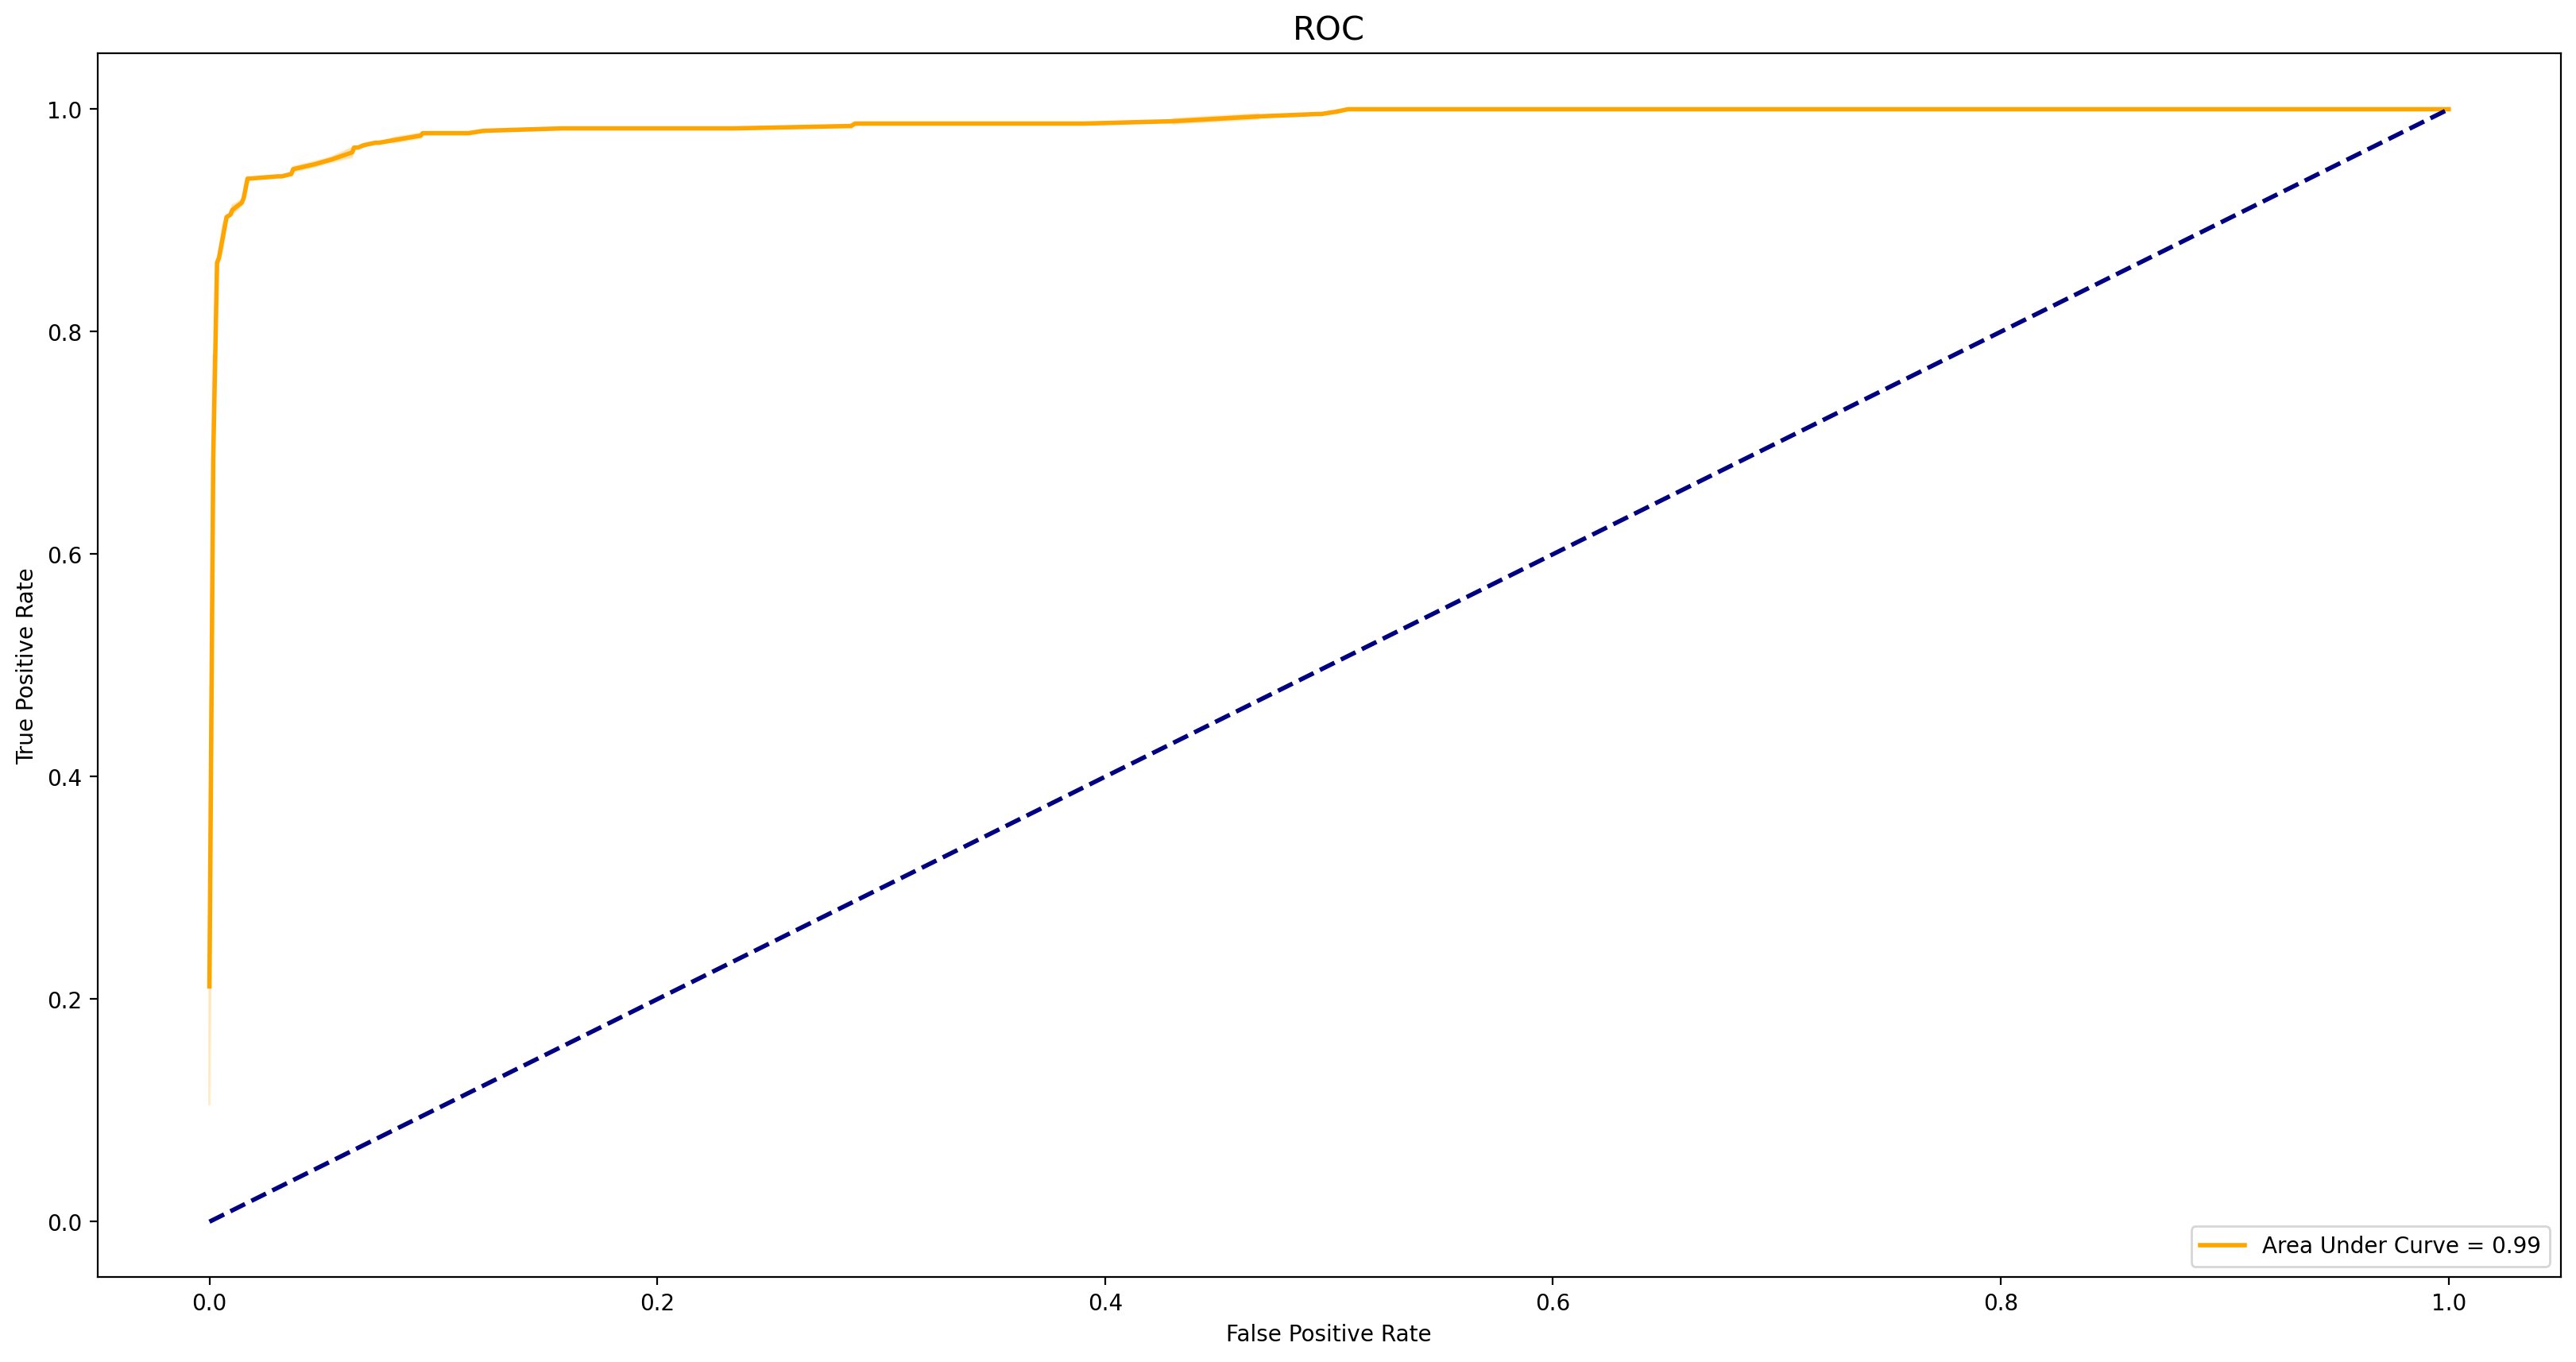

In [222]:
plt.figure(figsize=(20,10), dpi=200)
sns.lineplot(x=xgb_fpr, y=xgb_tpr, label=f'Area Under Curve = {xgb_roc_auc:.2f}', color = 'orange', lw=2)
sns.lineplot(x=[0,1], y=[0,1], color='navy', linestyle='dashed', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', fontsize=15)
plt.legend(loc='lower right');

In [223]:
xgb_avg_precision = average_precision_score(y_test, xgb_prob)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_prob)

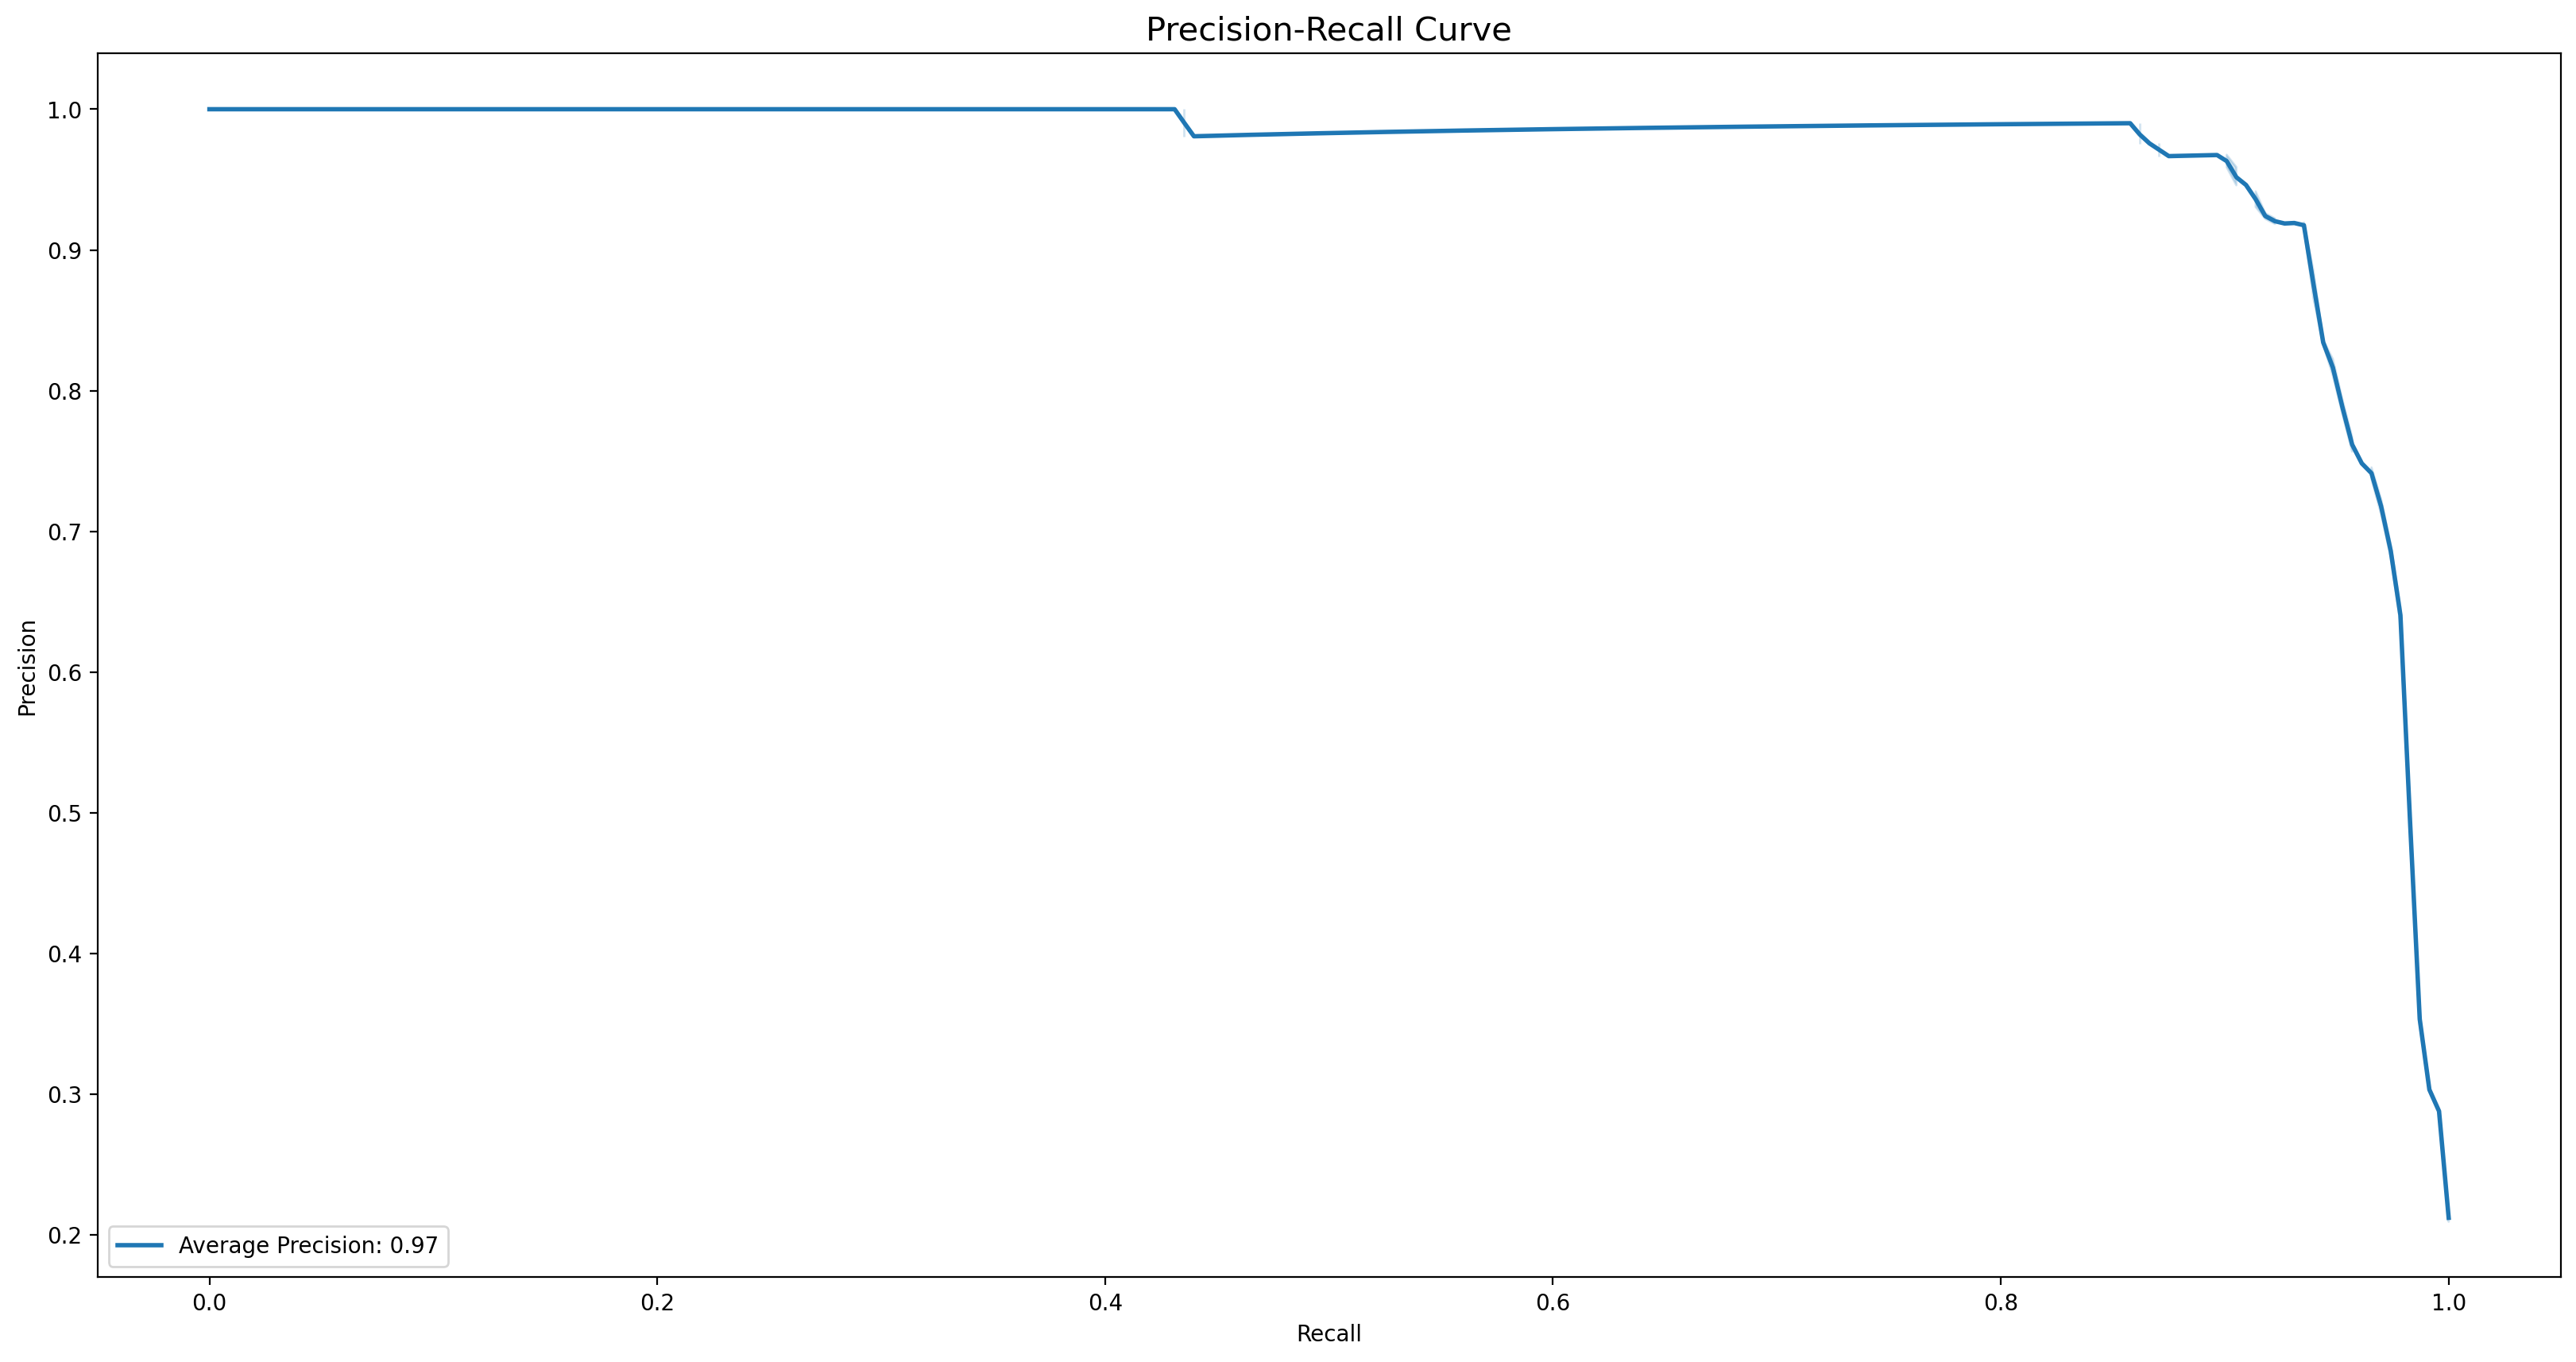

In [224]:
plt.figure(figsize=(20,10), dpi=200)
sns.lineplot(x=xgb_recall, y=xgb_precision, label=f'Average Precision: {xgb_avg_precision:.2f}', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=15)
plt.legend(loc='lower left');

In [225]:
xgb_prec = round(precision_score(y_test, xgb_best.predict(X_test))*100, 2)
xgb_rec = round(recall_score(y_test, xgb_best.predict(X_test))*100, 2)

In [226]:
logreg_score = round(logreg_best.score(X_test, y_test)*100,2)
knn_score = round(knn_best.score(X_test, y_test)*100,2)
dt_score = round(dt_best.score(X_test, y_test)*100,2)
svm_score = round(svm_best.score(X_test, y_test)*100,2)
gnb_score = round(gnb_best.score(X_test, y_test)*100,2)
rf_score = round(rf_best.score(X_test, y_test)*100,2)
gbc_score = round(gbc_best.score(X_test, y_test)*100,2)
ada_score = round(ada.score(X_test, y_test)*100,2)
hard_score = round(hard_voting_clf.score(X_test, y_test)*100,2)
soft_score = round(soft_voting_clf.score(X_test, y_test)*100,2)
xgb_score = round(xgb_best.score(X_test, y_test)*100,2)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


In [227]:
logreg_f = round(f1_score(y_test, logreg_best_pred)*100,2)
knn_f = round(f1_score(y_test, knn_best.predict(X_test))*100,2)
dt_f = round(f1_score(y_test, dt_best.predict(X_test))*100,2)
svm_f = round(f1_score(y_test, svm_best.predict(X_test))*100,2)
gnb_f = round(f1_score(y_test, gnb_best.predict(X_test))*100,2)
rf_f = round(f1_score(y_test, rf_best.predict(X_test))*100,2)
gbc_f = round(f1_score(y_test, gbc_best.predict(X_test))*100,2)
ada_f = round(f1_score(y_test, ada.predict(X_test))*100,2)
hard_f = round(f1_score(y_test, hard_voting_clf.predict(X_test))*100,2)
soft_f = round(f1_score(y_test, soft_voting_clf.predict(X_test))*100,2)
xgb_f = round(f1_score(y_test, xgb_best.predict(X_test))*100,2)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


In [228]:
models = {'Logistic Regression' : [logreg_score, logreg_f, log_prec, log_rec],
         'K Nearest Neighbors' : [knn_score, knn_f, knn_prec, knn_rec],
         'Decision Tree' : [dt_score, dt_f, dt_prec, dt_rec],
         'Support Vector Classifier' : [svm_score, svm_f, svm_prec, svm_rec],
         'Gaussian Naive Bayes' : [gnb_score, gnb_f, gnb_prec, gnb_rec],
         'Random Forest' : [rf_score, rf_f, rf_prec, rf_rec],
         'Gradient Boosting' : [gbc_score, gbc_f, gbc_prec, gbc_rec],
         'AdaBoost' : [ada_score, ada_f, ada_prec, ada_rec],
         'Hard Voting' : [hard_score, hard_f, hard_precision, hard_recall],
         'Soft Voting' : [soft_score, soft_f, soft_prec, soft_rec],
         'XGBoost' : [xgb_score, xgb_f, xgb_prec, xgb_rec]
         }

In [229]:
model_df = pd.DataFrame.from_dict(data=models, orient = 'index', columns=['Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [230]:
model_df

Accuracy  F1 Score  Precision  Recall
Logistic Regression           88.92     58.29      76.76   46.98
K Nearest Neighbors           95.03     84.51      86.82   82.33
Decision Tree                 94.18     82.48      81.78   83.19
Support Vector Classifier     97.73     93.10      93.10   93.10
Gaussian Naive Bayes          84.45     55.40      52.51   58.62
Random Forest                 97.44     92.00      94.95   89.22
Gradient Boosting             98.22     94.43      97.70   91.38
AdaBoost                      93.75     81.20      80.51   81.90
Hard Voting                   97.16     90.91      96.15   86.21
Soft Voting                   97.23     91.20      95.73   87.07
XGBoost                       97.66     92.72      95.02   90.52

Based on the evaluation metrics, the best and most recommended classifiers would be <b>Gradient Boosting</b> and <b>Support Vector Classifier</b>.  
  
<b>Gradient Boosting</b> has the highest F1 Score which is the most important metric to look at when the dataset is imbalanced, which is the case here. Also, it balances Precision and Recall pretty well.  

<b>Support Vector Classifier</b> performs equally well across all the metrics and can therefore prove to be a reliable model for the problem.  

Apart from these, <b>Random Forest</b> and <b>XGBoost</b> also perform well.
